In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# USING CNN MODEL

## Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


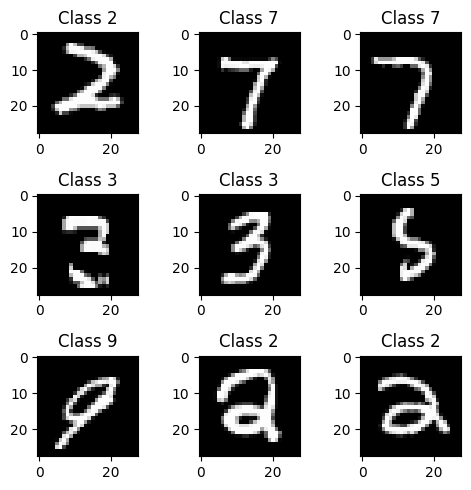

In [ ]:
import random
plt.rcParams['figure.figsize'] = (5,5)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
X_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


We must normalze the pixel values

In [ ]:
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  return train_norm, test_norm

In [ ]:
X_tain, X_test = prep_pixels(X_train, X_test)

We now, define the **CNN MODEL**

In [ ]:
batch_size = 128
nb_classes = 10
epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols,1 )

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [ ]:
from keras import utils
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

The CNN model is as below -

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense


model = Sequential()

model.add(Conv2D(nb_filters, kernel_size, padding='valid', input_shape=input_shape))
model.add(Activation('relu'))


model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

# Parameters
batch_size = 128
nb_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
nb_filters = 32
pool_size = (2, 2)
kernel_size = (3, 3)

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# Reshape data to the correct format (batch_size, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Build the model
model = Sequential()
model.add(Conv2D(nb_filters, kernel_size, padding='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

# Print the summary of the model
model.summary()

# Train the model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Drop

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0597217082977295
Test accuracy: 0.8064000010490417


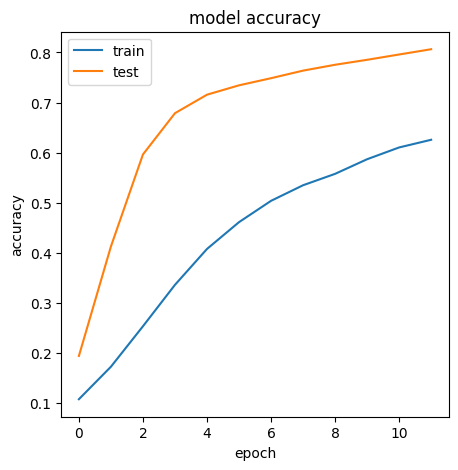

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 3ms/step


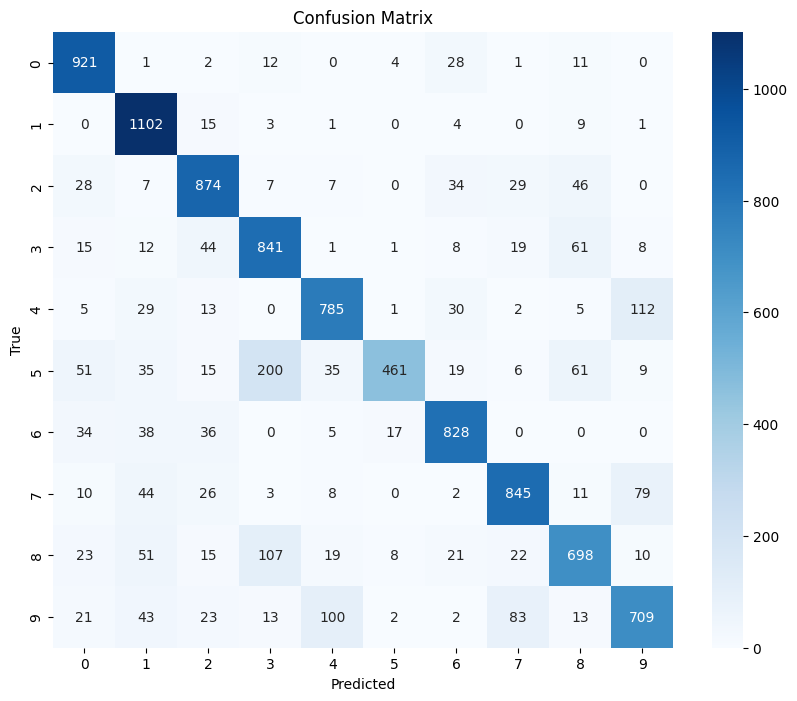

Accuracy: 0.8064
Precision: 0.8121
Recall: 0.8064
F1 Score: 0.8020

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       980
           1       0.81      0.97      0.88      1135
           2       0.82      0.85      0.83      1032
           3       0.71      0.83      0.77      1010
           4       0.82      0.80      0.81       982
           5       0.93      0.52      0.67       892
           6       0.85      0.86      0.86       958
           7       0.84      0.82      0.83      1028
           8       0.76      0.72      0.74       974
           9       0.76      0.70      0.73      1009

    accuracy                           0.81     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.81      0.80     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_true, y_pred))

# Using VGG16 Architecture

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm
from keras.utils import to_categorical, plot_model
from keras.preprocessing import image
from keras import models, layers
from tensorflow import keras
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

## Preparation of data

In [ ]:
x=[]
x=xtrain
y=[]
y=ytrain
test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[]
test_image_label=ytest
val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[]
val_image_label=ytest


In [ ]:
x=np.array(x)
print(x.shape)
y=to_categorical(y)

print(y.shape)

test_images=np.array(test_images)
print(test_images.shape)

test_image_label=to_categorical(test_image_label)
print(test_image_label.shape)

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label)
print(val_image_label.shape)

(60000, 48, 48, 3)
(60000, 10)
(10000, 48, 48, 3)
(10000, 10)
(10000, 48, 48, 3)
(10000, 10)


## Building the MVGG 16 Model

In [ ]:
model_vgg16=VGG16(weights='imagenet')
model_vgg16.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
input_layer=layers.Input(shape=(48,48,3))
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
model_vgg16.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
last_layer=model_vgg16.output
flatten=layers.Flatten()(last_layer)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)

output_layer=layers.Dense(10,activation='softmax')(flatten)

model=models.Model(inputs=input_layer,outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

Leaving the last layer free,

In [ ]:
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()




Model compilation completed.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (No

We then train the model

In [ ]:
history = model.fit(xtrain,ytrain,epochs=40,batch_size=128,verbose=True,validation_data=(xtest,ytest))

Epoch 1/40
375/375 [==============================] - 21s 42ms/step - loss: 2.4278 - accuracy: 0.6953 - val_loss: 0.6543 - val_accuracy: 0.8512
Epoch 2/40
375/375 [==============================] - 16s 43ms/step - loss: 0.5118 - accuracy: 0.8733 - val_loss: 0.4029 - val_accuracy: 0.8939
Epoch 3/40
375/375 [==============================] - 14s 37ms/step - loss: 0.3592 - accuracy: 0.9024 - val_loss: 0.3412 - val_accuracy: 0.9037
Epoch 4/40
375/375 [==============================] - 18s 49ms/step - loss: 0.3015 - accuracy: 0.9140 - val_loss: 0.2982 - val_accuracy: 0.9122
Epoch 5/40
375/375 [==============================] - 14s 38ms/step - loss: 0.2715 - accuracy: 0.9183 - val_loss: 0.2981 - val_accuracy: 0.9123
Epoch 6/40
375/375 [==============================] - 17s 45ms/step - loss: 0.2541 - accuracy: 0.9234 - val_loss: 0.2779 - val_accuracy: 0.9171
Epoch 7/40
375/375 [==============================] - 14s 39ms/step - loss: 0.2481 - accuracy: 0.9240 - val_loss: 0.2710 - val_accuracy:

In [ ]:
class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


In [ ]:
def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))


def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('int32'))

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label:
        color='green'
    else:
        color='red'

    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label), 100*np.max(predictions_array), Get_Element_Name(true_label), color=color, horizontalalignment='left'))

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/10000 [00:01<3:05:26,  1.11s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 2/10000 [00:01<1:29:53,  1.85it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 3/10000 [00:01<59:13,  2.81it/s]  

1/1 [==============================] - 0s 38ms/step


  0%|          | 4/10000 [00:01<46:51,  3.56it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 5/10000 [00:01<38:51,  4.29it/s]

1/1 [==============================] - 0s 63ms/step


  0%|          | 6/10000 [00:01<38:30,  4.33it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 7/10000 [00:02<40:57,  4.07it/s]

1/1 [==============================] - 0s 74ms/step


  0%|          | 8/10000 [00:02<37:36,  4.43it/s]

1/1 [==============================] - 0s 64ms/step


  0%|          | 9/10000 [00:02<37:24,  4.45it/s]

1/1 [==============================] - 0s 65ms/step


  0%|          | 10/10000 [00:02<35:31,  4.69it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 11/10000 [00:02<34:22,  4.84it/s]

1/1 [==============================] - 0s 72ms/step


  0%|          | 12/10000 [00:03<33:56,  4.90it/s]

1/1 [==============================] - 0s 111ms/step


  0%|          | 13/10000 [00:03<37:19,  4.46it/s]

1/1 [==============================] - 0s 109ms/step


  0%|          | 14/10000 [00:03<41:27,  4.01it/s]

1/1 [==============================] - 0s 79ms/step


  0%|          | 15/10000 [00:03<40:03,  4.15it/s]

1/1 [==============================] - 0s 70ms/step


  0%|          | 16/10000 [00:04<38:44,  4.30it/s]

1/1 [==============================] - 0s 67ms/step


  0%|          | 17/10000 [00:04<36:18,  4.58it/s]

1/1 [==============================] - 0s 92ms/step


  0%|          | 18/10000 [00:04<38:12,  4.35it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 19/10000 [00:04<35:30,  4.68it/s]

1/1 [==============================] - 0s 70ms/step


  0%|          | 21/10000 [00:05<29:07,  5.71it/s]

1/1 [==============================] - 0s 50ms/step


  0%|          | 22/10000 [00:05<29:40,  5.60it/s]

1/1 [==============================] - 0s 115ms/step


  0%|          | 23/10000 [00:05<34:30,  4.82it/s]

1/1 [==============================] - 0s 122ms/step


  0%|          | 24/10000 [00:05<38:40,  4.30it/s]

1/1 [==============================] - 0s 107ms/step


  0%|          | 25/10000 [00:06<40:25,  4.11it/s]

1/1 [==============================] - 0s 67ms/step


  0%|          | 26/10000 [00:06<39:23,  4.22it/s]

1/1 [==============================] - 0s 71ms/step


  0%|          | 27/10000 [00:06<36:59,  4.49it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 28/10000 [00:06<33:46,  4.92it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 29/10000 [00:06<29:32,  5.63it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 30/10000 [00:06<28:49,  5.77it/s]

1/1 [==============================] - 0s 45ms/step


  0%|          | 31/10000 [00:07<26:04,  6.37it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 32/10000 [00:07<23:42,  7.01it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 33/10000 [00:07<24:52,  6.68it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 34/10000 [00:07<22:30,  7.38it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 35/10000 [00:07<20:56,  7.93it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 36/10000 [00:07<22:51,  7.27it/s]

1/1 [==============================] - 0s 78ms/step


  0%|          | 37/10000 [00:07<24:59,  6.64it/s]

1/1 [==============================] - 0s 41ms/step


  0%|          | 38/10000 [00:08<26:37,  6.23it/s]

1/1 [==============================] - 0s 56ms/step


  0%|          | 39/10000 [00:08<25:37,  6.48it/s]

1/1 [==============================] - 0s 74ms/step


  0%|          | 41/10000 [00:08<22:36,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 42/10000 [00:08<21:46,  7.62it/s]

1/1 [==============================] - 0s 98ms/step


  0%|          | 43/10000 [00:08<23:57,  6.93it/s]

1/1 [==============================] - 0s 50ms/step


  0%|          | 44/10000 [00:08<23:33,  7.04it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 45/10000 [00:09<23:43,  6.99it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 46/10000 [00:09<24:24,  6.80it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 47/10000 [00:09<23:12,  7.15it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 48/10000 [00:09<21:39,  7.66it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 49/10000 [00:09<23:07,  7.17it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 50/10000 [00:09<24:14,  6.84it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 51/10000 [00:09<22:38,  7.32it/s]

1/1 [==============================] - 0s 58ms/step


  1%|          | 52/10000 [00:10<23:17,  7.12it/s]

1/1 [==============================] - 0s 92ms/step


  1%|          | 53/10000 [00:10<27:29,  6.03it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 54/10000 [00:10<25:30,  6.50it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 55/10000 [00:10<23:45,  6.98it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 56/10000 [00:10<22:45,  7.28it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 57/10000 [00:10<21:22,  7.75it/s]

1/1 [==============================] - 0s 49ms/step


  1%|          | 58/10000 [00:10<21:33,  7.69it/s]

1/1 [==============================] - 0s 81ms/step


  1%|          | 59/10000 [00:11<25:11,  6.58it/s]

1/1 [==============================] - 0s 62ms/step


  1%|          | 60/10000 [00:11<27:12,  6.09it/s]

1/1 [==============================] - 0s 49ms/step


  1%|          | 61/10000 [00:11<24:35,  6.74it/s]

1/1 [==============================] - 0s 111ms/step


  1%|          | 62/10000 [00:11<28:54,  5.73it/s]

1/1 [==============================] - 0s 62ms/step


  1%|          | 63/10000 [00:11<31:51,  5.20it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 64/10000 [00:12<33:02,  5.01it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 65/10000 [00:12<28:12,  5.87it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 66/10000 [00:12<25:17,  6.55it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 68/10000 [00:12<21:19,  7.76it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 69/10000 [00:12<20:22,  8.12it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 71/10000 [00:12<19:03,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 73/10000 [00:13<19:02,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 74/10000 [00:13<18:34,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 75/10000 [00:13<18:07,  9.13it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 77/10000 [00:13<17:05,  9.68it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 79/10000 [00:13<16:40,  9.92it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 81/10000 [00:13<16:07, 10.25it/s]

1/1 [==============================] - 0s 140ms/step


  1%|          | 83/10000 [00:14<27:05,  6.10it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 84/10000 [00:14<25:23,  6.51it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 85/10000 [00:14<23:40,  6.98it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 87/10000 [00:14<20:27,  8.08it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 88/10000 [00:14<20:23,  8.10it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 90/10000 [00:15<18:33,  8.90it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 92/10000 [00:15<17:53,  9.23it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 94/10000 [00:15<17:20,  9.52it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 95/10000 [00:15<17:13,  9.58it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 97/10000 [00:15<16:20, 10.10it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 99/10000 [00:15<16:11, 10.19it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 101/10000 [00:16<16:19, 10.11it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 103/10000 [00:16<16:24, 10.05it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 105/10000 [00:16<17:11,  9.59it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 106/10000 [00:16<17:40,  9.33it/s]

1/1 [==============================] - 0s 62ms/step


  1%|          | 107/10000 [00:16<18:29,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 108/10000 [00:17<20:23,  8.09it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 110/10000 [00:17<18:36,  8.85it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 112/10000 [00:17<16:44,  9.84it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 114/10000 [00:17<16:11, 10.17it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 116/10000 [00:17<15:31, 10.62it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 118/10000 [00:17<15:23, 10.70it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 120/10000 [00:18<15:40, 10.51it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 122/10000 [00:18<15:13, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 124/10000 [00:18<14:48, 11.11it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 126/10000 [00:18<14:34, 11.29it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 128/10000 [00:18<14:55, 11.03it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▏         | 130/10000 [00:18<15:06, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 132/10000 [00:19<15:30, 10.61it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 134/10000 [00:19<14:54, 11.03it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 136/10000 [00:19<14:54, 11.03it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 138/10000 [00:19<15:21, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 140/10000 [00:19<15:10, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▏         | 142/10000 [00:20<15:53, 10.34it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 144/10000 [00:20<15:32, 10.57it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 146/10000 [00:20<14:32, 11.29it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 148/10000 [00:20<13:06, 12.52it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 150/10000 [00:20<12:01, 13.66it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 152/10000 [00:20<11:14, 14.60it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 154/10000 [00:20<10:44, 15.27it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 156/10000 [00:21<10:43, 15.29it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 158/10000 [00:21<10:44, 15.27it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 160/10000 [00:21<10:28, 15.65it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 162/10000 [00:21<10:19, 15.88it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 164/10000 [00:21<10:10, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 166/10000 [00:21<10:45, 15.24it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 168/10000 [00:21<10:47, 15.19it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 170/10000 [00:21<10:39, 15.38it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 172/10000 [00:22<10:25, 15.72it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 174/10000 [00:22<10:38, 15.38it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 176/10000 [00:22<10:27, 15.65it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 178/10000 [00:22<10:18, 15.87it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 180/10000 [00:22<10:07, 16.16it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 182/10000 [00:22<10:02, 16.29it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 184/10000 [00:22<10:25, 15.70it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 186/10000 [00:22<10:29, 15.59it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 188/10000 [00:23<10:11, 16.05it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 190/10000 [00:23<10:24, 15.72it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 192/10000 [00:23<10:18, 15.87it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 194/10000 [00:23<10:11, 16.04it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 196/10000 [00:23<09:55, 16.46it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 198/10000 [00:23<09:47, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 200/10000 [00:23<10:08, 16.11it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 202/10000 [00:23<10:08, 16.10it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 204/10000 [00:24<10:00, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 206/10000 [00:24<10:11, 16.02it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 208/10000 [00:24<09:59, 16.34it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 210/10000 [00:24<10:18, 15.83it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 212/10000 [00:24<10:10, 16.04it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 214/10000 [00:24<09:58, 16.34it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 216/10000 [00:24<09:54, 16.45it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 218/10000 [00:24<09:57, 16.38it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 220/10000 [00:25<10:01, 16.25it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 222/10000 [00:25<10:17, 15.84it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 224/10000 [00:25<10:19, 15.78it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 226/10000 [00:25<10:12, 15.96it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 228/10000 [00:25<10:02, 16.21it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 230/10000 [00:25<10:09, 16.02it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 232/10000 [00:25<10:02, 16.21it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 234/10000 [00:25<10:23, 15.65it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 236/10000 [00:26<10:11, 15.96it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 238/10000 [00:26<10:13, 15.91it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 240/10000 [00:26<10:24, 15.64it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 242/10000 [00:26<10:13, 15.91it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 244/10000 [00:26<10:04, 16.14it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 246/10000 [00:26<09:52, 16.46it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 248/10000 [00:26<09:52, 16.45it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▎         | 250/10000 [00:26<10:00, 16.23it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 252/10000 [00:27<10:05, 16.11it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 254/10000 [00:27<10:03, 16.16it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 256/10000 [00:27<10:26, 15.57it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 258/10000 [00:27<10:10, 15.95it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 260/10000 [00:27<10:01, 16.19it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 262/10000 [00:27<09:51, 16.46it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 264/10000 [00:27<09:54, 16.37it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 266/10000 [00:27<09:56, 16.31it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 268/10000 [00:28<09:57, 16.30it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 270/10000 [00:28<09:58, 16.25it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 272/10000 [00:28<09:59, 16.23it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 274/10000 [00:28<10:14, 15.83it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 276/10000 [00:28<10:06, 16.03it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 278/10000 [00:28<10:01, 16.15it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 280/10000 [00:28<09:50, 16.46it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 282/10000 [00:28<09:45, 16.61it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 284/10000 [00:29<09:54, 16.36it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 286/10000 [00:29<09:55, 16.30it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 288/10000 [00:29<10:00, 16.17it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 290/10000 [00:29<10:07, 15.98it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 292/10000 [00:29<10:08, 15.96it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 294/10000 [00:29<09:53, 16.35it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 296/10000 [00:29<09:54, 16.33it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 298/10000 [00:29<10:02, 16.09it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 300/10000 [00:30<09:58, 16.21it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 302/10000 [00:30<10:13, 15.82it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 304/10000 [00:30<10:12, 15.82it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 306/10000 [00:30<10:24, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 308/10000 [00:30<11:55, 13.54it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 310/10000 [00:30<12:41, 12.73it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 312/10000 [00:30<13:14, 12.19it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 314/10000 [00:31<13:37, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 316/10000 [00:31<13:40, 11.80it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 318/10000 [00:31<13:51, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 320/10000 [00:31<14:07, 11.42it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 322/10000 [00:31<14:13, 11.34it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 324/10000 [00:32<14:28, 11.14it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 326/10000 [00:32<14:37, 11.02it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 328/10000 [00:32<14:39, 10.99it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 330/10000 [00:32<15:00, 10.74it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 332/10000 [00:32<14:56, 10.78it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 334/10000 [00:32<14:37, 11.02it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 336/10000 [00:33<14:37, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 338/10000 [00:33<15:10, 10.61it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 340/10000 [00:33<14:47, 10.88it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 342/10000 [00:33<14:35, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 344/10000 [00:33<14:36, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 346/10000 [00:34<14:58, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 348/10000 [00:34<14:54, 10.79it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 350/10000 [00:34<14:12, 11.33it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 352/10000 [00:34<13:12, 12.17it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 354/10000 [00:34<12:21, 13.00it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 356/10000 [00:34<11:45, 13.67it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 358/10000 [00:34<11:09, 14.39it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 360/10000 [00:35<10:47, 14.88it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 362/10000 [00:35<10:32, 15.23it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 364/10000 [00:35<10:29, 15.30it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▎         | 366/10000 [00:35<10:13, 15.71it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 368/10000 [00:35<10:01, 16.01it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 370/10000 [00:35<10:11, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 372/10000 [00:35<10:05, 15.90it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 374/10000 [00:35<10:27, 15.35it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 376/10000 [00:36<10:21, 15.48it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 378/10000 [00:36<10:21, 15.48it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 380/10000 [00:36<10:11, 15.74it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 382/10000 [00:36<10:11, 15.74it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 384/10000 [00:36<10:22, 15.45it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 386/10000 [00:36<10:23, 15.42it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 388/10000 [00:36<10:31, 15.22it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 390/10000 [00:36<10:22, 15.43it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 392/10000 [00:37<10:25, 15.36it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 394/10000 [00:37<10:22, 15.43it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 396/10000 [00:37<10:13, 15.66it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 398/10000 [00:37<10:03, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 400/10000 [00:37<10:17, 15.55it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 402/10000 [00:37<10:17, 15.54it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 404/10000 [00:37<10:07, 15.78it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 406/10000 [00:37<10:11, 15.69it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 408/10000 [00:38<10:09, 15.75it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 410/10000 [00:38<10:14, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 412/10000 [00:38<10:01, 15.93it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 414/10000 [00:38<09:54, 16.12it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 416/10000 [00:38<09:53, 16.16it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 418/10000 [00:38<09:56, 16.06it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 420/10000 [00:38<10:00, 15.94it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 422/10000 [00:38<09:59, 15.98it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 424/10000 [00:39<09:53, 16.13it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 426/10000 [00:39<09:49, 16.24it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 428/10000 [00:39<09:53, 16.14it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 430/10000 [00:39<10:00, 15.94it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 432/10000 [00:39<09:52, 16.15it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 434/10000 [00:39<10:01, 15.91it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 436/10000 [00:39<09:52, 16.14it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 438/10000 [00:39<09:57, 16.01it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 440/10000 [00:40<09:51, 16.16it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 442/10000 [00:40<09:49, 16.23it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 444/10000 [00:40<09:44, 16.36it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 446/10000 [00:40<10:01, 15.88it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 448/10000 [00:40<09:57, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 450/10000 [00:40<09:58, 15.95it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 452/10000 [00:40<09:56, 16.00it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 454/10000 [00:41<10:30, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 456/10000 [00:41<10:22, 15.32it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 458/10000 [00:41<10:19, 15.40it/s]

1/1 [==============================] - 0s 107ms/step


  5%|▍         | 460/10000 [00:41<18:42,  8.50it/s]

1/1 [==============================] - 0s 62ms/step


  5%|▍         | 462/10000 [00:42<20:25,  7.78it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 464/10000 [00:42<18:09,  8.75it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 466/10000 [00:42<15:44, 10.10it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 468/10000 [00:42<13:59, 11.36it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 470/10000 [00:42<12:47, 12.42it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 472/10000 [00:42<11:50, 13.41it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 474/10000 [00:42<11:44, 13.52it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 476/10000 [00:42<11:05, 14.31it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 478/10000 [00:43<10:45, 14.75it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 480/10000 [00:43<10:34, 15.02it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 482/10000 [00:43<10:27, 15.17it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 484/10000 [00:43<10:18, 15.37it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 486/10000 [00:43<10:05, 15.72it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 488/10000 [00:43<10:04, 15.73it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 490/10000 [00:43<10:11, 15.56it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 492/10000 [00:43<10:12, 15.53it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 494/10000 [00:44<10:00, 15.82it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 496/10000 [00:44<10:00, 15.83it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 498/10000 [00:44<09:56, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 500/10000 [00:44<11:33, 13.69it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 502/10000 [00:44<12:30, 12.65it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 504/10000 [00:44<13:08, 12.04it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 506/10000 [00:45<13:22, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 508/10000 [00:45<13:35, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 510/10000 [00:45<13:38, 11.59it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 512/10000 [00:45<13:47, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 514/10000 [00:45<14:06, 11.20it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 516/10000 [00:46<14:51, 10.64it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 518/10000 [00:46<14:49, 10.66it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 520/10000 [00:46<14:35, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 522/10000 [00:46<14:21, 11.00it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 524/10000 [00:46<14:18, 11.04it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 526/10000 [00:46<14:17, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 528/10000 [00:47<15:04, 10.47it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 530/10000 [00:47<15:04, 10.47it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 532/10000 [00:47<15:03, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 534/10000 [00:47<14:27, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 536/10000 [00:47<14:51, 10.61it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 538/10000 [00:48<15:22, 10.26it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 540/10000 [00:48<15:41, 10.04it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 542/10000 [00:48<14:10, 11.12it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 544/10000 [00:48<12:47, 12.32it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 546/10000 [00:48<12:05, 13.03it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 548/10000 [00:48<11:28, 13.74it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 550/10000 [00:48<10:55, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 552/10000 [00:49<10:59, 14.32it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 554/10000 [00:49<10:54, 14.43it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 556/10000 [00:49<10:44, 14.66it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 558/10000 [00:49<10:28, 15.02it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 560/10000 [00:49<10:17, 15.30it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 562/10000 [00:49<10:11, 15.44it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 564/10000 [00:49<10:16, 15.32it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 566/10000 [00:49<10:05, 15.58it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 568/10000 [00:50<10:08, 15.50it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 570/10000 [00:50<10:04, 15.60it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 572/10000 [00:50<10:05, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 574/10000 [00:50<09:56, 15.80it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 576/10000 [00:50<09:50, 15.95it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 578/10000 [00:50<09:49, 15.98it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 580/10000 [00:50<09:43, 16.14it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 582/10000 [00:51<10:03, 15.61it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 584/10000 [00:51<10:11, 15.40it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 586/10000 [00:51<09:59, 15.71it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 588/10000 [00:51<09:47, 16.03it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 590/10000 [00:51<09:49, 15.97it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 592/10000 [00:51<09:53, 15.85it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 594/10000 [00:51<09:55, 15.79it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 596/10000 [00:51<10:15, 15.29it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 598/10000 [00:52<10:16, 15.26it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 600/10000 [00:52<11:05, 14.13it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 602/10000 [00:52<10:57, 14.29it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 604/10000 [00:52<10:44, 14.57it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 606/10000 [00:52<10:33, 14.84it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 608/10000 [00:52<10:41, 14.64it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 610/10000 [00:52<10:25, 15.01it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 612/10000 [00:52<10:19, 15.16it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 614/10000 [00:53<10:05, 15.51it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 616/10000 [00:53<10:10, 15.36it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 618/10000 [00:53<10:13, 15.30it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 620/10000 [00:53<10:06, 15.47it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 622/10000 [00:53<10:05, 15.50it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 624/10000 [00:53<10:07, 15.44it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 626/10000 [00:53<10:11, 15.34it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 628/10000 [00:54<10:34, 14.78it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 630/10000 [00:54<10:17, 15.17it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 632/10000 [00:54<10:17, 15.16it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 634/10000 [00:54<10:07, 15.43it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 636/10000 [00:54<10:20, 15.09it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 638/10000 [00:54<10:15, 15.22it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 640/10000 [00:54<10:03, 15.52it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 642/10000 [00:54<09:56, 15.70it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 644/10000 [00:55<10:08, 15.39it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 646/10000 [00:55<09:57, 15.67it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▋         | 648/10000 [00:55<09:56, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 650/10000 [00:55<09:48, 15.89it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 652/10000 [00:55<09:48, 15.87it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 654/10000 [00:55<09:56, 15.67it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 656/10000 [00:55<09:51, 15.79it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 658/10000 [00:55<09:51, 15.80it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 660/10000 [00:56<09:56, 15.66it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 662/10000 [00:56<10:06, 15.40it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 664/10000 [00:56<10:18, 15.09it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 666/10000 [00:56<10:06, 15.40it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 668/10000 [00:56<10:01, 15.50it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 670/10000 [00:56<09:56, 15.65it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 672/10000 [00:56<10:22, 15.00it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 674/10000 [00:57<10:21, 15.01it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 676/10000 [00:57<10:30, 14.79it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 678/10000 [00:57<10:36, 14.65it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 680/10000 [00:57<10:12, 15.21it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 682/10000 [00:57<10:18, 15.07it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 684/10000 [00:57<10:06, 15.35it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 686/10000 [00:57<10:15, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 688/10000 [00:57<10:09, 15.29it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 690/10000 [00:58<10:11, 15.22it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 692/10000 [00:58<10:04, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 694/10000 [00:58<10:03, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 696/10000 [00:58<10:46, 14.39it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 698/10000 [00:58<11:39, 13.30it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 700/10000 [00:58<12:31, 12.37it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 702/10000 [00:59<12:37, 12.28it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 704/10000 [00:59<13:06, 11.82it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 706/10000 [00:59<13:08, 11.78it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 708/10000 [00:59<13:45, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 710/10000 [00:59<13:40, 11.32it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 712/10000 [00:59<13:47, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 714/10000 [01:00<13:47, 11.23it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 716/10000 [01:00<14:03, 11.01it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 718/10000 [01:00<14:21, 10.77it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 720/10000 [01:00<14:24, 10.74it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 722/10000 [01:00<14:21, 10.77it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 724/10000 [01:01<14:37, 10.57it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 726/10000 [01:01<14:41, 10.52it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 728/10000 [01:01<14:56, 10.34it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 730/10000 [01:01<14:50, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 732/10000 [01:01<15:01, 10.28it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 734/10000 [01:02<14:46, 10.46it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 736/10000 [01:02<14:56, 10.34it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 738/10000 [01:02<15:01, 10.27it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 740/10000 [01:02<14:06, 10.94it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 742/10000 [01:02<12:44, 12.12it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 744/10000 [01:02<11:49, 13.05it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 746/10000 [01:02<11:21, 13.57it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 748/10000 [01:03<10:55, 14.11it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 750/10000 [01:03<10:42, 14.40it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 752/10000 [01:03<10:25, 14.79it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 754/10000 [01:03<10:32, 14.63it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 756/10000 [01:03<10:27, 14.72it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 758/10000 [01:03<10:21, 14.86it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 760/10000 [01:03<10:12, 15.08it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 762/10000 [01:04<09:59, 15.40it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 764/10000 [01:04<10:07, 15.21it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 766/10000 [01:04<10:05, 15.26it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 768/10000 [01:04<09:54, 15.54it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 770/10000 [01:04<09:45, 15.77it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 772/10000 [01:04<10:08, 15.16it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 774/10000 [01:04<10:04, 15.27it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 776/10000 [01:04<10:03, 15.28it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 778/10000 [01:05<09:59, 15.37it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 780/10000 [01:05<09:50, 15.62it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 782/10000 [01:05<10:19, 14.87it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 784/10000 [01:05<10:11, 15.07it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 786/10000 [01:05<09:57, 15.42it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 788/10000 [01:05<10:20, 14.85it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 790/10000 [01:05<10:10, 15.08it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 792/10000 [01:05<10:04, 15.22it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 794/10000 [01:06<09:57, 15.40it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 796/10000 [01:06<09:56, 15.42it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 798/10000 [01:06<10:01, 15.30it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 800/10000 [01:06<10:09, 15.10it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 802/10000 [01:06<09:59, 15.33it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 804/10000 [01:06<10:14, 14.97it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 806/10000 [01:06<10:01, 15.28it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 808/10000 [01:07<10:04, 15.22it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 810/10000 [01:07<09:54, 15.47it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 812/10000 [01:07<09:53, 15.48it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 814/10000 [01:07<09:53, 15.49it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 816/10000 [01:07<10:04, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 818/10000 [01:07<10:20, 14.80it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 820/10000 [01:07<10:15, 14.92it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 822/10000 [01:07<10:14, 14.94it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 824/10000 [01:08<10:04, 15.17it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 826/10000 [01:08<10:07, 15.10it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 828/10000 [01:08<10:08, 15.07it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 830/10000 [01:08<10:03, 15.20it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 832/10000 [01:08<09:54, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 834/10000 [01:08<10:10, 15.02it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 836/10000 [01:08<10:13, 14.93it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 838/10000 [01:09<10:03, 15.17it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 840/10000 [01:09<10:07, 15.08it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 842/10000 [01:09<10:00, 15.26it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 844/10000 [01:09<09:54, 15.41it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 846/10000 [01:09<09:46, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 848/10000 [01:09<09:41, 15.74it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 850/10000 [01:09<09:50, 15.49it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 852/10000 [01:09<09:54, 15.39it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 854/10000 [01:10<10:03, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 856/10000 [01:10<09:56, 15.34it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 858/10000 [01:10<09:47, 15.56it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▊         | 860/10000 [01:10<09:43, 15.65it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 862/10000 [01:10<09:43, 15.65it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 864/10000 [01:10<09:42, 15.69it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 866/10000 [01:10<09:54, 15.38it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 868/10000 [01:10<09:53, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 870/10000 [01:11<10:24, 14.63it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 872/10000 [01:11<10:31, 14.46it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 874/10000 [01:11<10:12, 14.89it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 876/10000 [01:11<10:01, 15.18it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 878/10000 [01:11<09:49, 15.48it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 880/10000 [01:11<09:58, 15.24it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 882/10000 [01:11<10:04, 15.09it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 884/10000 [01:12<10:03, 15.10it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 886/10000 [01:12<10:04, 15.09it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 888/10000 [01:12<10:01, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 890/10000 [01:12<10:01, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 892/10000 [01:12<10:35, 14.33it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 894/10000 [01:12<11:33, 13.13it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 896/10000 [01:12<12:26, 12.19it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 898/10000 [01:13<13:04, 11.60it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 900/10000 [01:13<12:55, 11.74it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 902/10000 [01:13<12:58, 11.69it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 904/10000 [01:13<13:12, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 906/10000 [01:13<13:19, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 908/10000 [01:14<13:55, 10.88it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 910/10000 [01:14<14:08, 10.71it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 912/10000 [01:14<13:51, 10.94it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 914/10000 [01:14<14:05, 10.74it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 916/10000 [01:14<14:06, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 918/10000 [01:14<14:29, 10.44it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 920/10000 [01:15<14:30, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 922/10000 [01:15<14:13, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 924/10000 [01:15<14:26, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 926/10000 [01:15<14:32, 10.40it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 928/10000 [01:15<14:13, 10.62it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 930/10000 [01:16<14:46, 10.23it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 932/10000 [01:16<14:42, 10.28it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 934/10000 [01:16<14:25, 10.47it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 936/10000 [01:16<14:37, 10.32it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 938/10000 [01:16<14:34, 10.37it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 940/10000 [01:17<14:43, 10.26it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 942/10000 [01:17<13:55, 10.84it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 944/10000 [01:17<12:44, 11.84it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 946/10000 [01:17<11:48, 12.77it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 948/10000 [01:17<11:10, 13.50it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 950/10000 [01:17<10:48, 13.96it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 952/10000 [01:17<10:32, 14.31it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 954/10000 [01:18<11:02, 13.66it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 956/10000 [01:18<10:51, 13.87it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 958/10000 [01:18<10:43, 14.05it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 960/10000 [01:18<10:30, 14.34it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 962/10000 [01:18<10:23, 14.49it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 964/10000 [01:18<10:11, 14.77it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 966/10000 [01:18<10:06, 14.90it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 968/10000 [01:19<10:05, 14.92it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 970/10000 [01:19<10:20, 14.54it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 972/10000 [01:19<10:22, 14.50it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 974/10000 [01:19<10:13, 14.71it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 976/10000 [01:19<10:12, 14.74it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 978/10000 [01:19<10:08, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 980/10000 [01:19<10:18, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 982/10000 [01:19<10:06, 14.88it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 984/10000 [01:20<10:02, 14.96it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 986/10000 [01:20<10:08, 14.81it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 988/10000 [01:20<09:59, 15.03it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 990/10000 [01:20<09:57, 15.07it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 992/10000 [01:20<09:50, 15.25it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 994/10000 [01:20<10:07, 14.83it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 996/10000 [01:20<10:12, 14.70it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 998/10000 [01:21<10:15, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1000/10000 [01:21<10:29, 14.30it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1002/10000 [01:21<10:12, 14.70it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1004/10000 [01:21<10:19, 14.53it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 1006/10000 [01:21<09:55, 15.11it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1008/10000 [01:21<09:59, 15.00it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1010/10000 [01:21<09:57, 15.05it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1012/10000 [01:21<10:07, 14.79it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1014/10000 [01:22<10:00, 14.96it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1016/10000 [01:22<10:12, 14.66it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1018/10000 [01:22<10:12, 14.66it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1020/10000 [01:22<10:02, 14.91it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1022/10000 [01:22<10:00, 14.96it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1024/10000 [01:22<10:31, 14.22it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1026/10000 [01:22<10:40, 14.01it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1028/10000 [01:23<17:17,  8.65it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1030/10000 [01:23<15:03,  9.93it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1032/10000 [01:23<13:24, 11.14it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1034/10000 [01:23<12:17, 12.15it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1036/10000 [01:23<11:47, 12.67it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1038/10000 [01:24<11:24, 13.09it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1040/10000 [01:24<11:03, 13.50it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1042/10000 [01:24<10:46, 13.85it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1044/10000 [01:24<10:36, 14.06it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1046/10000 [01:24<10:32, 14.17it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1048/10000 [01:24<10:21, 14.42it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1050/10000 [01:24<10:09, 14.69it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1052/10000 [01:25<10:08, 14.71it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1054/10000 [01:25<10:15, 14.53it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1056/10000 [01:25<10:21, 14.40it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1058/10000 [01:25<10:27, 14.26it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1060/10000 [01:25<10:03, 14.81it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1062/10000 [01:25<10:07, 14.72it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1064/10000 [01:25<09:57, 14.95it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1066/10000 [01:25<10:03, 14.81it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1068/10000 [01:26<10:21, 14.38it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1070/10000 [01:26<10:01, 14.84it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1072/10000 [01:26<10:38, 13.99it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1074/10000 [01:26<10:14, 14.53it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1076/10000 [01:26<10:07, 14.70it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1078/10000 [01:26<09:56, 14.96it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1080/10000 [01:26<10:11, 14.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1082/10000 [01:27<10:06, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 1084/10000 [01:27<11:03, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1086/10000 [01:27<12:28, 11.90it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1088/10000 [01:27<12:52, 11.54it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1090/10000 [01:27<13:30, 11.00it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1092/10000 [01:28<13:12, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1094/10000 [01:28<12:55, 11.48it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1096/10000 [01:28<12:50, 11.56it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1098/10000 [01:28<13:03, 11.37it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█         | 1100/10000 [01:28<13:38, 10.88it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1102/10000 [01:28<13:46, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1104/10000 [01:29<13:34, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1106/10000 [01:29<13:14, 11.19it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1108/10000 [01:29<13:53, 10.66it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1110/10000 [01:29<13:52, 10.68it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1112/10000 [01:29<13:35, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1114/10000 [01:30<13:37, 10.86it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1116/10000 [01:30<13:49, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1118/10000 [01:30<14:19, 10.34it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1120/10000 [01:30<14:33, 10.17it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1122/10000 [01:30<14:36, 10.13it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1124/10000 [01:31<14:50,  9.97it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 1126/10000 [01:31<14:50,  9.97it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 1127/10000 [01:31<14:55,  9.91it/s]

1/1 [==============================] - 0s 35ms/step


 11%|█▏        | 1129/10000 [01:31<14:38, 10.10it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 1131/10000 [01:31<15:01,  9.83it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1133/10000 [01:31<13:43, 10.77it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1135/10000 [01:32<12:51, 11.49it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1137/10000 [01:32<12:02, 12.26it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1139/10000 [01:32<11:19, 13.05it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1141/10000 [01:32<11:03, 13.35it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1143/10000 [01:32<10:41, 13.80it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1145/10000 [01:32<10:36, 13.92it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1147/10000 [01:32<10:23, 14.21it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█▏        | 1149/10000 [01:33<14:30, 10.17it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1151/10000 [01:33<14:29, 10.17it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1153/10000 [01:33<13:12, 11.16it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1155/10000 [01:33<12:21, 11.94it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1157/10000 [01:33<11:45, 12.53it/s]

1/1 [==============================] - 0s 97ms/step


 12%|█▏        | 1159/10000 [01:34<14:31, 10.14it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1161/10000 [01:34<14:34, 10.10it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1163/10000 [01:34<13:11, 11.17it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1165/10000 [01:34<12:09, 12.12it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1167/10000 [01:34<11:36, 12.68it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1169/10000 [01:34<11:06, 13.25it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1171/10000 [01:34<10:47, 13.64it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1173/10000 [01:35<10:46, 13.65it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1175/10000 [01:35<10:36, 13.87it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1177/10000 [01:35<10:19, 14.25it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1179/10000 [01:35<10:03, 14.61it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1181/10000 [01:35<10:16, 14.31it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1183/10000 [01:35<10:03, 14.60it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1185/10000 [01:35<10:02, 14.63it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1187/10000 [01:36<10:04, 14.59it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1189/10000 [01:36<10:10, 14.43it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1191/10000 [01:36<10:12, 14.38it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1193/10000 [01:36<10:13, 14.36it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1195/10000 [01:36<10:21, 14.18it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1197/10000 [01:36<10:38, 13.80it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1199/10000 [01:36<10:26, 14.04it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1201/10000 [01:37<10:19, 14.20it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1203/10000 [01:37<10:29, 13.97it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1205/10000 [01:37<10:18, 14.22it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1207/10000 [01:37<10:07, 14.48it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1209/10000 [01:37<10:13, 14.32it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1211/10000 [01:37<10:25, 14.06it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1213/10000 [01:37<10:32, 13.89it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1215/10000 [01:38<10:17, 14.22it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1217/10000 [01:38<10:25, 14.05it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1219/10000 [01:38<10:11, 14.35it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1221/10000 [01:38<09:55, 14.74it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1223/10000 [01:38<09:55, 14.74it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1225/10000 [01:38<10:01, 14.59it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1227/10000 [01:38<10:25, 14.03it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1229/10000 [01:39<10:03, 14.52it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1231/10000 [01:39<10:09, 14.38it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1233/10000 [01:39<10:23, 14.06it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1235/10000 [01:39<10:27, 13.97it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1237/10000 [01:39<10:17, 14.20it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1239/10000 [01:39<10:01, 14.57it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1241/10000 [01:39<10:08, 14.41it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 1243/10000 [01:40<09:57, 14.64it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1245/10000 [01:40<10:02, 14.54it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1247/10000 [01:40<09:53, 14.75it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1249/10000 [01:40<09:41, 15.05it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1251/10000 [01:40<09:39, 15.10it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1253/10000 [01:40<09:43, 15.00it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1255/10000 [01:40<10:02, 14.51it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1257/10000 [01:40<09:53, 14.73it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1259/10000 [01:41<09:49, 14.83it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1261/10000 [01:41<10:09, 14.34it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1263/10000 [01:41<10:31, 13.83it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1265/10000 [01:41<10:14, 14.22it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1267/10000 [01:41<09:59, 14.57it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1269/10000 [01:41<09:58, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1271/10000 [01:41<11:31, 12.62it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1273/10000 [01:42<12:46, 11.38it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1275/10000 [01:42<12:43, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1277/10000 [01:42<13:01, 11.16it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1279/10000 [01:42<13:16, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1281/10000 [01:42<13:31, 10.74it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1283/10000 [01:43<13:39, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1285/10000 [01:43<13:51, 10.48it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1287/10000 [01:43<13:47, 10.54it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1289/10000 [01:43<13:53, 10.45it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1291/10000 [01:43<13:21, 10.87it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1293/10000 [01:44<13:34, 10.69it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1295/10000 [01:44<13:27, 10.78it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1297/10000 [01:44<13:34, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1299/10000 [01:44<13:54, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1301/10000 [01:44<13:35, 10.67it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1303/10000 [01:45<13:42, 10.58it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1305/10000 [01:45<13:42, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1307/10000 [01:45<13:56, 10.39it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1309/10000 [01:45<14:01, 10.33it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1311/10000 [01:45<13:38, 10.62it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1313/10000 [01:45<13:29, 10.73it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1315/10000 [01:46<13:41, 10.58it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1317/10000 [01:46<14:20, 10.10it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1319/10000 [01:46<14:13, 10.17it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1321/10000 [01:46<13:23, 10.80it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1323/10000 [01:46<12:11, 11.86it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1325/10000 [01:47<11:25, 12.66it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1327/10000 [01:47<11:09, 12.96it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1329/10000 [01:47<10:47, 13.39it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1331/10000 [01:47<10:23, 13.90it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1333/10000 [01:47<10:06, 14.28it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1335/10000 [01:47<10:10, 14.20it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1337/10000 [01:47<10:10, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1339/10000 [01:47<10:23, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1341/10000 [01:48<10:39, 13.54it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1343/10000 [01:48<10:30, 13.74it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1345/10000 [01:48<10:21, 13.92it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1347/10000 [01:48<10:12, 14.12it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1349/10000 [01:48<09:58, 14.45it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1351/10000 [01:48<09:46, 14.75it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1353/10000 [01:48<09:54, 14.54it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1355/10000 [01:49<09:55, 14.52it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1357/10000 [01:49<10:13, 14.08it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1359/10000 [01:49<10:04, 14.29it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1361/10000 [01:49<09:53, 14.57it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1363/10000 [01:49<10:18, 13.96it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 1365/10000 [01:49<10:35, 13.60it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1367/10000 [01:49<10:15, 14.03it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1369/10000 [01:50<10:04, 14.27it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1371/10000 [01:50<10:31, 13.67it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1373/10000 [01:50<10:07, 14.19it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1375/10000 [01:50<10:04, 14.26it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1377/10000 [01:50<09:56, 14.46it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1379/10000 [01:50<09:52, 14.55it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1381/10000 [01:50<10:02, 14.30it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1383/10000 [01:51<09:57, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1385/10000 [01:51<09:56, 14.44it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1387/10000 [01:51<09:57, 14.42it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1389/10000 [01:51<09:59, 14.36it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1391/10000 [01:51<09:48, 14.64it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1393/10000 [01:51<09:44, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1395/10000 [01:51<09:46, 14.68it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1397/10000 [01:52<09:42, 14.77it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1399/10000 [01:52<09:52, 14.51it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1401/10000 [01:52<09:55, 14.44it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1403/10000 [01:52<09:49, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1405/10000 [01:52<09:46, 14.65it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1407/10000 [01:52<09:45, 14.68it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1409/10000 [01:52<09:42, 14.75it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1411/10000 [01:53<10:06, 14.16it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1413/10000 [01:53<10:25, 13.73it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1415/10000 [01:53<10:54, 13.11it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1417/10000 [01:53<10:56, 13.07it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1419/10000 [01:53<10:32, 13.56it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1421/10000 [01:53<10:24, 13.73it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1423/10000 [01:53<10:11, 14.03it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1425/10000 [01:54<10:13, 13.98it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1427/10000 [01:54<10:07, 14.11it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1429/10000 [01:54<10:15, 13.93it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1431/10000 [01:54<10:07, 14.11it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1433/10000 [01:54<10:36, 13.45it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1435/10000 [01:54<10:30, 13.59it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1437/10000 [01:54<10:13, 13.96it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1439/10000 [01:55<09:58, 14.31it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1441/10000 [01:55<09:47, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1443/10000 [01:55<09:42, 14.69it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1445/10000 [01:55<10:03, 14.18it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1447/10000 [01:55<09:53, 14.42it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1449/10000 [01:55<09:52, 14.42it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1451/10000 [01:55<09:45, 14.60it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1453/10000 [01:56<09:42, 14.66it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1455/10000 [01:56<09:39, 14.74it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1457/10000 [01:56<09:41, 14.69it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1459/10000 [01:56<09:49, 14.50it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1461/10000 [01:56<09:41, 14.68it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1463/10000 [01:56<09:58, 14.26it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1465/10000 [01:56<11:01, 12.90it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▍        | 1467/10000 [01:57<12:13, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1469/10000 [01:57<12:27, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1471/10000 [01:57<13:19, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1473/10000 [01:57<13:31, 10.51it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1475/10000 [01:57<13:09, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 1477/10000 [01:58<13:18, 10.67it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1479/10000 [01:58<13:22, 10.62it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 1481/10000 [01:58<13:50, 10.26it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1483/10000 [01:58<14:01, 10.13it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1485/10000 [01:58<14:01, 10.12it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1487/10000 [01:59<13:31, 10.49it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1489/10000 [01:59<14:05, 10.06it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1491/10000 [01:59<13:32, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1493/10000 [01:59<13:40, 10.37it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1495/10000 [01:59<13:41, 10.36it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1497/10000 [02:00<13:51, 10.23it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▍        | 1499/10000 [02:00<13:42, 10.34it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 1501/10000 [02:00<14:21,  9.86it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 1502/10000 [02:00<14:49,  9.55it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1503/10000 [02:00<15:10,  9.33it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1505/10000 [02:00<14:44,  9.61it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1507/10000 [02:01<14:03, 10.06it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 1508/10000 [02:01<14:07, 10.01it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1509/10000 [02:01<14:45,  9.59it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1511/10000 [02:01<14:09, 10.00it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 1512/10000 [02:01<14:29,  9.76it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 1513/10000 [02:01<14:46,  9.57it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 1514/10000 [02:01<14:43,  9.61it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1516/10000 [02:01<13:56, 10.14it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1518/10000 [02:02<12:27, 11.35it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1520/10000 [02:02<11:31, 12.27it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1522/10000 [02:02<10:53, 12.97it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1524/10000 [02:02<10:32, 13.41it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1526/10000 [02:02<10:41, 13.20it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1528/10000 [02:02<10:27, 13.50it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1530/10000 [02:02<10:16, 13.74it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1532/10000 [02:03<10:03, 14.03it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1534/10000 [02:03<10:08, 13.92it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1536/10000 [02:03<10:07, 13.94it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1538/10000 [02:03<10:00, 14.08it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1540/10000 [02:03<10:14, 13.77it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1542/10000 [02:03<10:10, 13.86it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1544/10000 [02:03<10:06, 13.94it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1546/10000 [02:04<09:55, 14.20it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1548/10000 [02:04<09:46, 14.41it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1550/10000 [02:04<09:42, 14.50it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1552/10000 [02:04<09:42, 14.50it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1554/10000 [02:04<09:42, 14.51it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1556/10000 [02:04<09:56, 14.16it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1558/10000 [02:04<09:57, 14.14it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1560/10000 [02:05<09:49, 14.32it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1562/10000 [02:05<10:01, 14.02it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1564/10000 [02:05<10:13, 13.76it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1566/10000 [02:05<10:14, 13.73it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1568/10000 [02:05<10:14, 13.71it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1570/10000 [02:05<10:31, 13.35it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1572/10000 [02:05<10:11, 13.79it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1574/10000 [02:06<10:08, 13.85it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1576/10000 [02:06<09:57, 14.10it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1578/10000 [02:06<09:50, 14.26it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1580/10000 [02:06<09:51, 14.23it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1582/10000 [02:06<09:48, 14.31it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1584/10000 [02:06<09:54, 14.15it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1586/10000 [02:06<09:55, 14.13it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1588/10000 [02:07<10:11, 13.76it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1590/10000 [02:07<10:04, 13.92it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1592/10000 [02:07<09:59, 14.03it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1594/10000 [02:07<10:08, 13.81it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1596/10000 [02:07<09:49, 14.27it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1598/10000 [02:07<10:01, 13.96it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1600/10000 [02:07<09:59, 14.02it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1602/10000 [02:08<09:49, 14.24it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1604/10000 [02:08<09:45, 14.34it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1606/10000 [02:08<09:48, 14.27it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1608/10000 [02:08<09:39, 14.49it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1610/10000 [02:08<09:36, 14.54it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1612/10000 [02:08<09:37, 14.52it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1614/10000 [02:08<09:51, 14.18it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1616/10000 [02:09<09:54, 14.10it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1618/10000 [02:09<09:51, 14.17it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1620/10000 [02:09<09:47, 14.25it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1622/10000 [02:09<09:44, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1624/10000 [02:09<09:51, 14.15it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1626/10000 [02:09<09:46, 14.28it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 1628/10000 [02:09<09:55, 14.06it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1630/10000 [02:10<09:49, 14.20it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1632/10000 [02:10<09:43, 14.35it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1634/10000 [02:10<09:44, 14.31it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1636/10000 [02:10<09:35, 14.52it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1638/10000 [02:10<09:27, 14.75it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1640/10000 [02:10<09:43, 14.32it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1642/10000 [02:10<10:02, 13.87it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1644/10000 [02:11<09:57, 13.99it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 1646/10000 [02:11<09:55, 14.02it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1648/10000 [02:11<09:58, 13.96it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 1650/10000 [02:11<10:33, 13.18it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1652/10000 [02:11<10:24, 13.37it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1654/10000 [02:11<10:14, 13.58it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1656/10000 [02:11<10:39, 13.05it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1658/10000 [02:12<11:20, 12.27it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1660/10000 [02:12<11:38, 11.93it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1662/10000 [02:12<11:44, 11.84it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1664/10000 [02:12<12:34, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1666/10000 [02:12<12:36, 11.01it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1668/10000 [02:13<12:52, 10.78it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1670/10000 [02:13<12:32, 11.07it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1672/10000 [02:13<12:50, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1674/10000 [02:13<12:26, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1676/10000 [02:13<12:24, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1678/10000 [02:13<12:18, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1680/10000 [02:14<13:10, 10.53it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1682/10000 [02:14<13:35, 10.21it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1684/10000 [02:14<13:39, 10.15it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 1686/10000 [02:14<13:30, 10.26it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1688/10000 [02:14<13:11, 10.50it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1690/10000 [02:15<13:03, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1692/10000 [02:15<13:09, 10.52it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1694/10000 [02:15<13:08, 10.53it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1696/10000 [02:15<13:07, 10.55it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 1698/10000 [02:15<13:35, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1700/10000 [02:16<13:41, 10.10it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1702/10000 [02:16<14:03,  9.84it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1704/10000 [02:16<13:25, 10.30it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 1706/10000 [02:16<13:26, 10.28it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1708/10000 [02:16<13:08, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1710/10000 [02:17<13:00, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1712/10000 [02:17<13:27, 10.26it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1714/10000 [02:17<13:01, 10.60it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 1716/10000 [02:17<13:12, 10.46it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 1718/10000 [02:17<13:26, 10.26it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1720/10000 [02:18<13:20, 10.34it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1722/10000 [02:18<12:22, 11.15it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1724/10000 [02:18<12:17, 11.22it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1726/10000 [02:18<11:20, 12.17it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1728/10000 [02:18<10:48, 12.76it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1730/10000 [02:18<10:30, 13.12it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 1732/10000 [02:18<10:07, 13.61it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1734/10000 [02:19<09:59, 13.78it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1736/10000 [02:19<10:01, 13.73it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1738/10000 [02:19<10:06, 13.61it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1740/10000 [02:19<09:57, 13.83it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1742/10000 [02:19<09:57, 13.82it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1744/10000 [02:19<09:57, 13.82it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1746/10000 [02:19<09:54, 13.88it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1748/10000 [02:20<09:53, 13.91it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1750/10000 [02:20<09:42, 14.16it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1752/10000 [02:20<09:58, 13.79it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1754/10000 [02:20<09:58, 13.77it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1756/10000 [02:20<09:54, 13.87it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1758/10000 [02:20<09:47, 14.02it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1760/10000 [02:20<10:09, 13.51it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1762/10000 [02:21<10:20, 13.27it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1764/10000 [02:21<10:47, 12.71it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1766/10000 [02:21<10:53, 12.61it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1768/10000 [02:21<10:52, 12.61it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1770/10000 [02:21<11:00, 12.45it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1772/10000 [02:21<10:47, 12.70it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1774/10000 [02:22<10:40, 12.85it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1776/10000 [02:22<10:17, 13.32it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1778/10000 [02:22<09:56, 13.77it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1780/10000 [02:22<10:15, 13.35it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1782/10000 [02:22<10:04, 13.59it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1784/10000 [02:22<10:07, 13.53it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1786/10000 [02:22<10:12, 13.42it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1788/10000 [02:23<10:07, 13.51it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1790/10000 [02:23<10:01, 13.64it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1792/10000 [02:23<09:50, 13.89it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1794/10000 [02:23<09:58, 13.70it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1796/10000 [02:23<09:57, 13.72it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1798/10000 [02:23<10:30, 13.00it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1800/10000 [02:23<10:20, 13.21it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1802/10000 [02:24<10:12, 13.39it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1804/10000 [02:24<10:00, 13.64it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1806/10000 [02:24<10:01, 13.62it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1808/10000 [02:24<10:08, 13.45it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1810/10000 [02:24<10:04, 13.56it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1812/10000 [02:24<10:03, 13.56it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1814/10000 [02:24<09:57, 13.70it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1816/10000 [02:25<09:57, 13.69it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1818/10000 [02:25<09:57, 13.70it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1820/10000 [02:25<09:53, 13.79it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1822/10000 [02:25<10:02, 13.58it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1824/10000 [02:25<10:04, 13.53it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1826/10000 [02:25<09:54, 13.75it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1828/10000 [02:26<09:53, 13.76it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1830/10000 [02:26<09:45, 13.94it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1832/10000 [02:26<09:50, 13.82it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1834/10000 [02:26<09:49, 13.84it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1836/10000 [02:26<09:52, 13.77it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1838/10000 [02:26<09:48, 13.87it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1840/10000 [02:26<09:46, 13.91it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1842/10000 [02:27<09:49, 13.85it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1844/10000 [02:27<09:47, 13.88it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1846/10000 [02:27<09:43, 13.97it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1848/10000 [02:27<09:42, 14.00it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1850/10000 [02:27<09:58, 13.62it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 1852/10000 [02:27<10:01, 13.54it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▊        | 1854/10000 [02:27<09:58, 13.61it/s]

1/1 [==============================] - 0s 152ms/step


 19%|█▊        | 1856/10000 [02:28<22:20,  6.07it/s]

1/1 [==============================] - 0s 110ms/step


 19%|█▊        | 1858/10000 [02:29<27:09,  5.00it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 1860/10000 [02:29<23:06,  5.87it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 1861/10000 [02:29<21:35,  6.28it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▊        | 1863/10000 [02:29<18:31,  7.32it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▊        | 1865/10000 [02:29<16:30,  8.22it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▊        | 1866/10000 [02:29<16:08,  8.40it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1868/10000 [02:30<14:39,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▊        | 1870/10000 [02:30<13:52,  9.77it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▊        | 1872/10000 [02:30<13:43,  9.87it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 1874/10000 [02:30<13:43,  9.86it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1876/10000 [02:30<13:15, 10.21it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1878/10000 [02:31<13:40,  9.90it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1880/10000 [02:31<13:27, 10.06it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1882/10000 [02:31<13:27, 10.05it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1884/10000 [02:31<14:40,  9.21it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1885/10000 [02:31<14:38,  9.23it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1886/10000 [02:32<14:29,  9.33it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1887/10000 [02:32<14:34,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1888/10000 [02:32<14:28,  9.34it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1890/10000 [02:32<13:37,  9.92it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1891/10000 [02:32<13:36,  9.93it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1892/10000 [02:32<14:01,  9.64it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1894/10000 [02:32<14:12,  9.51it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1895/10000 [02:32<14:14,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 1896/10000 [02:33<14:47,  9.13it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1897/10000 [02:33<15:00,  9.00it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1898/10000 [02:33<14:38,  9.22it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 1899/10000 [02:33<14:33,  9.27it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1901/10000 [02:33<12:22, 10.91it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1903/10000 [02:33<11:15, 11.99it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1905/10000 [02:33<10:49, 12.46it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1907/10000 [02:33<10:36, 12.72it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1909/10000 [02:34<10:14, 13.16it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1911/10000 [02:34<10:01, 13.45it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1913/10000 [02:34<09:50, 13.69it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1915/10000 [02:34<09:46, 13.80it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1917/10000 [02:34<09:46, 13.78it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1919/10000 [02:34<10:03, 13.39it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1921/10000 [02:34<09:59, 13.47it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1923/10000 [02:35<10:01, 13.44it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1925/10000 [02:35<09:56, 13.54it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1927/10000 [02:35<09:47, 13.74it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1929/10000 [02:35<09:37, 13.99it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1931/10000 [02:35<09:33, 14.08it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1933/10000 [02:35<09:36, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1935/10000 [02:35<09:50, 13.65it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1937/10000 [02:36<09:49, 13.69it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1939/10000 [02:36<09:42, 13.83it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1941/10000 [02:36<09:50, 13.64it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1943/10000 [02:36<09:51, 13.63it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1945/10000 [02:36<09:41, 13.85it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1947/10000 [02:36<09:38, 13.91it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1949/10000 [02:37<09:48, 13.68it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1951/10000 [02:37<09:45, 13.75it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1953/10000 [02:37<09:38, 13.91it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1955/10000 [02:37<09:58, 13.44it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1957/10000 [02:37<09:37, 13.93it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1959/10000 [02:37<09:44, 13.76it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1961/10000 [02:37<09:33, 14.02it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1963/10000 [02:38<09:45, 13.72it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1965/10000 [02:38<09:35, 13.97it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1967/10000 [02:38<09:31, 14.06it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1969/10000 [02:38<09:37, 13.91it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 1971/10000 [02:38<15:34,  8.59it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1973/10000 [02:39<14:12,  9.41it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1975/10000 [02:39<12:49, 10.42it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1977/10000 [02:39<11:49, 11.31it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 1979/10000 [02:39<11:20, 11.79it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1981/10000 [02:39<10:49, 12.35it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1983/10000 [02:39<10:25, 12.81it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1985/10000 [02:39<10:20, 12.93it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1987/10000 [02:40<10:25, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1989/10000 [02:40<10:13, 13.05it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1991/10000 [02:40<10:00, 13.33it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1993/10000 [02:40<09:51, 13.53it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1995/10000 [02:40<09:39, 13.82it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1997/10000 [02:40<09:51, 13.54it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1999/10000 [02:40<09:45, 13.67it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2001/10000 [02:41<09:51, 13.52it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2003/10000 [02:41<09:46, 13.63it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2005/10000 [02:41<10:10, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 2007/10000 [02:41<10:36, 12.56it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2009/10000 [02:41<10:14, 12.99it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2011/10000 [02:41<10:02, 13.25it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2013/10000 [02:42<10:06, 13.17it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2015/10000 [02:42<10:12, 13.03it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2017/10000 [02:42<10:01, 13.28it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2019/10000 [02:42<09:57, 13.37it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2021/10000 [02:42<09:56, 13.37it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2023/10000 [02:42<09:54, 13.41it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2025/10000 [02:42<09:45, 13.62it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2027/10000 [02:43<09:54, 13.41it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2029/10000 [02:43<10:05, 13.16it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2031/10000 [02:43<09:55, 13.39it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2033/10000 [02:43<11:14, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2035/10000 [02:43<11:34, 11.46it/s]

1/1 [==============================] - 0s 29ms/step


 20%|██        | 2037/10000 [02:43<11:52, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2039/10000 [02:44<11:46, 11.26it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2041/10000 [02:44<12:44, 10.41it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2043/10000 [02:44<12:47, 10.37it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 2045/10000 [02:44<12:54, 10.27it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2047/10000 [02:44<12:31, 10.58it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 2049/10000 [02:45<12:28, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2051/10000 [02:45<13:07, 10.10it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 2053/10000 [02:45<13:00, 10.19it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2055/10000 [02:45<12:57, 10.21it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 2057/10000 [02:45<12:45, 10.37it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2059/10000 [02:46<12:37, 10.48it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 2061/10000 [02:46<12:47, 10.34it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2063/10000 [02:46<12:56, 10.21it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2065/10000 [02:46<12:48, 10.32it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 2067/10000 [02:46<13:17,  9.94it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2068/10000 [02:47<13:26,  9.83it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██        | 2070/10000 [02:47<12:49, 10.31it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2072/10000 [02:47<13:11, 10.01it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 2074/10000 [02:47<13:00, 10.15it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2076/10000 [02:47<13:31,  9.76it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2077/10000 [02:47<13:36,  9.70it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 2078/10000 [02:48<13:45,  9.59it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██        | 2079/10000 [02:48<13:52,  9.51it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 2080/10000 [02:48<13:58,  9.44it/s]

1/1 [==============================] - 0s 30ms/step


 21%|██        | 2082/10000 [02:48<13:10, 10.02it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2084/10000 [02:48<12:43, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 2086/10000 [02:48<12:57, 10.18it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 2088/10000 [02:49<13:36,  9.69it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 2089/10000 [02:49<13:33,  9.72it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2091/10000 [02:49<13:05, 10.07it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2093/10000 [02:49<11:59, 10.99it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2095/10000 [02:49<11:13, 11.73it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2097/10000 [02:49<10:35, 12.44it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2099/10000 [02:49<10:30, 12.54it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2101/10000 [02:50<10:06, 13.02it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2103/10000 [02:50<10:00, 13.16it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2105/10000 [02:50<10:00, 13.14it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2107/10000 [02:50<10:19, 12.73it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2109/10000 [02:50<10:03, 13.08it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2111/10000 [02:50<09:50, 13.35it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2113/10000 [02:50<09:59, 13.16it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2115/10000 [02:51<09:45, 13.46it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2117/10000 [02:51<09:38, 13.62it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2119/10000 [02:51<09:30, 13.81it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2121/10000 [02:51<09:46, 13.43it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2123/10000 [02:51<09:44, 13.49it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2125/10000 [02:51<09:42, 13.53it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 2127/10000 [02:52<09:40, 13.57it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2129/10000 [02:52<09:31, 13.77it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2131/10000 [02:52<09:33, 13.72it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 2133/10000 [02:52<09:39, 13.58it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2135/10000 [02:52<09:46, 13.40it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2137/10000 [02:52<09:46, 13.41it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2139/10000 [02:52<09:54, 13.23it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2141/10000 [02:53<09:56, 13.18it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2143/10000 [02:53<09:49, 13.34it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2145/10000 [02:53<09:49, 13.32it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2147/10000 [02:53<09:49, 13.33it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2149/10000 [02:53<10:10, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2151/10000 [02:53<10:07, 12.91it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2153/10000 [02:53<10:15, 12.75it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2155/10000 [02:54<10:18, 12.67it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2157/10000 [02:54<10:06, 12.94it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2159/10000 [02:54<10:12, 12.81it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2161/10000 [02:54<09:55, 13.16it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2163/10000 [02:54<09:51, 13.25it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2165/10000 [02:54<09:44, 13.41it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2167/10000 [02:55<10:04, 12.97it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2169/10000 [02:55<09:44, 13.39it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2171/10000 [02:55<09:51, 13.24it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2173/10000 [02:55<09:47, 13.32it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2175/10000 [02:55<09:40, 13.48it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2177/10000 [02:55<10:03, 12.97it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2179/10000 [02:55<09:52, 13.21it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2181/10000 [02:56<09:47, 13.30it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2183/10000 [02:56<09:52, 13.19it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2185/10000 [02:56<09:59, 13.03it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2187/10000 [02:56<09:53, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2189/10000 [02:56<09:53, 13.17it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2191/10000 [02:56<09:47, 13.30it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2193/10000 [02:56<09:42, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2195/10000 [02:57<09:50, 13.21it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2197/10000 [02:57<09:44, 13.36it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2199/10000 [02:57<09:43, 13.38it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2201/10000 [02:57<09:42, 13.40it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2203/10000 [02:57<10:11, 12.74it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2205/10000 [02:57<09:50, 13.19it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2207/10000 [02:58<09:46, 13.29it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2209/10000 [02:58<09:36, 13.51it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2211/10000 [02:58<09:32, 13.60it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2213/10000 [02:58<09:44, 13.32it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2215/10000 [02:58<09:37, 13.48it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2217/10000 [02:58<09:57, 13.04it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2219/10000 [02:58<10:02, 12.93it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2221/10000 [02:59<09:43, 13.32it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2223/10000 [02:59<09:57, 13.02it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2225/10000 [02:59<10:41, 12.13it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2227/10000 [02:59<11:09, 11.62it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2229/10000 [02:59<11:33, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2231/10000 [03:00<11:58, 10.81it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2233/10000 [03:00<12:08, 10.66it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2235/10000 [03:00<11:50, 10.92it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 2237/10000 [03:00<11:45, 11.00it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2239/10000 [03:00<12:52, 10.04it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2241/10000 [03:01<13:06,  9.86it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2243/10000 [03:01<12:59,  9.95it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2245/10000 [03:01<12:42, 10.18it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2247/10000 [03:01<11:59, 10.78it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2249/10000 [03:01<12:02, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2251/10000 [03:01<12:24, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 2253/10000 [03:02<12:22, 10.44it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 2255/10000 [03:02<12:12, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2257/10000 [03:02<12:21, 10.44it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2259/10000 [03:02<12:55,  9.98it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2261/10000 [03:02<13:06,  9.85it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2262/10000 [03:03<13:04,  9.86it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2264/10000 [03:03<12:51, 10.03it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2266/10000 [03:03<12:31, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2268/10000 [03:03<13:09,  9.79it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 2270/10000 [03:03<12:54,  9.98it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2272/10000 [03:04<13:19,  9.67it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 2273/10000 [03:04<13:14,  9.72it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 2274/10000 [03:04<13:25,  9.59it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2275/10000 [03:04<13:38,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2276/10000 [03:04<14:07,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2277/10000 [03:04<14:20,  8.98it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2278/10000 [03:04<13:58,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2279/10000 [03:04<13:46,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2280/10000 [03:04<13:51,  9.29it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2281/10000 [03:05<14:11,  9.07it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2282/10000 [03:05<13:52,  9.27it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2284/10000 [03:05<12:05, 10.64it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2286/10000 [03:05<11:39, 11.03it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2288/10000 [03:05<10:50, 11.86it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2290/10000 [03:05<10:19, 12.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2292/10000 [03:05<10:07, 12.68it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2294/10000 [03:06<10:17, 12.48it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2296/10000 [03:06<10:00, 12.83it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2298/10000 [03:06<09:55, 12.94it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2300/10000 [03:06<09:44, 13.18it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2302/10000 [03:06<09:38, 13.30it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2304/10000 [03:06<09:39, 13.27it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2306/10000 [03:07<09:35, 13.38it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2308/10000 [03:07<09:39, 13.28it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2310/10000 [03:07<09:34, 13.39it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2312/10000 [03:07<09:39, 13.26it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2314/10000 [03:07<09:39, 13.26it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2316/10000 [03:07<09:44, 13.16it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2318/10000 [03:07<09:32, 13.42it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2320/10000 [03:08<09:26, 13.55it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2322/10000 [03:08<09:44, 13.14it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2324/10000 [03:08<09:31, 13.44it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2326/10000 [03:08<09:42, 13.17it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2328/10000 [03:08<09:41, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2330/10000 [03:08<09:50, 12.99it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2332/10000 [03:09<10:12, 12.53it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2334/10000 [03:09<09:57, 12.83it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2336/10000 [03:09<10:14, 12.47it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2338/10000 [03:09<10:02, 12.73it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2340/10000 [03:09<09:59, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2342/10000 [03:09<09:51, 12.95it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2344/10000 [03:09<09:51, 12.95it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2346/10000 [03:10<09:49, 12.99it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2348/10000 [03:10<09:58, 12.79it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 2350/10000 [03:10<10:03, 12.67it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2352/10000 [03:10<09:59, 12.75it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2354/10000 [03:10<09:53, 12.88it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2356/10000 [03:10<09:37, 13.24it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2358/10000 [03:11<09:51, 12.92it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2360/10000 [03:11<09:46, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 2362/10000 [03:11<09:46, 13.03it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2364/10000 [03:11<09:38, 13.20it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 2366/10000 [03:11<09:33, 13.31it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 2368/10000 [03:11<10:13, 12.44it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2370/10000 [03:11<09:59, 12.74it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2372/10000 [03:12<09:58, 12.73it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 2374/10000 [03:12<09:50, 12.92it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2376/10000 [03:12<10:02, 12.66it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2378/10000 [03:12<09:54, 12.82it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2380/10000 [03:12<09:45, 13.01it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2382/10000 [03:12<09:42, 13.08it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2384/10000 [03:13<09:44, 13.02it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2386/10000 [03:13<09:51, 12.86it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2388/10000 [03:13<09:39, 13.14it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2390/10000 [03:13<10:02, 12.64it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2392/10000 [03:13<09:50, 12.88it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2394/10000 [03:13<09:48, 12.91it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2396/10000 [03:13<09:55, 12.77it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2398/10000 [03:14<09:54, 12.79it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2400/10000 [03:14<09:49, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2402/10000 [03:14<09:50, 12.86it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2404/10000 [03:14<09:55, 12.75it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2406/10000 [03:14<09:54, 12.78it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2408/10000 [03:14<09:54, 12.76it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2410/10000 [03:15<09:46, 12.94it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2412/10000 [03:15<10:05, 12.53it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 2414/10000 [03:15<11:18, 11.19it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 2416/10000 [03:15<12:06, 10.44it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2418/10000 [03:15<12:06, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▍       | 2420/10000 [03:16<12:06, 10.43it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2422/10000 [03:16<12:12, 10.34it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2424/10000 [03:16<12:05, 10.44it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2426/10000 [03:16<12:12, 10.34it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2428/10000 [03:16<12:33, 10.05it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 2430/10000 [03:17<12:10, 10.36it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2432/10000 [03:17<12:40,  9.95it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2434/10000 [03:17<13:33,  9.30it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2435/10000 [03:17<13:53,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2437/10000 [03:17<13:10,  9.57it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2438/10000 [03:17<13:19,  9.46it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2440/10000 [03:18<13:03,  9.65it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2442/10000 [03:18<12:28, 10.10it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2444/10000 [03:18<12:02, 10.46it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2446/10000 [03:18<12:37,  9.97it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2448/10000 [03:18<13:44,  9.16it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▍       | 2449/10000 [03:19<13:55,  9.04it/s]

1/1 [==============================] - 0s 56ms/step


 24%|██▍       | 2450/10000 [03:19<14:24,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 2452/10000 [03:19<13:29,  9.32it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▍       | 2453/10000 [03:19<13:27,  9.35it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▍       | 2454/10000 [03:19<13:41,  9.19it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 2455/10000 [03:19<13:44,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 2457/10000 [03:19<13:10,  9.54it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▍       | 2458/10000 [03:20<13:51,  9.07it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2460/10000 [03:20<13:06,  9.59it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2462/10000 [03:20<12:09, 10.33it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▍       | 2464/10000 [03:20<12:27, 10.08it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 2466/10000 [03:20<12:14, 10.26it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▍       | 2468/10000 [03:21<12:41,  9.89it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▍       | 2469/10000 [03:21<12:58,  9.68it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▍       | 2470/10000 [03:21<13:19,  9.42it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▍       | 2471/10000 [03:21<13:33,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▍       | 2472/10000 [03:21<14:03,  8.93it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 2473/10000 [03:21<14:19,  8.75it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2475/10000 [03:21<12:32, 10.00it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2477/10000 [03:21<11:35, 10.81it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2479/10000 [03:22<10:51, 11.55it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2481/10000 [03:22<10:15, 12.22it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2483/10000 [03:22<09:54, 12.64it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2485/10000 [03:22<09:36, 13.03it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 2487/10000 [03:22<09:39, 12.97it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2489/10000 [03:22<09:55, 12.61it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2491/10000 [03:22<09:43, 12.87it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 2493/10000 [03:23<09:31, 13.13it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2495/10000 [03:23<09:36, 13.01it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 2497/10000 [03:23<09:29, 13.18it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2499/10000 [03:23<09:26, 13.24it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2501/10000 [03:23<09:20, 13.38it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2503/10000 [03:23<09:35, 13.02it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 2505/10000 [03:24<09:34, 13.06it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 2507/10000 [03:24<09:34, 13.05it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2509/10000 [03:24<09:27, 13.21it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2511/10000 [03:24<09:27, 13.20it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2513/10000 [03:24<09:42, 12.85it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2515/10000 [03:24<09:37, 12.97it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2517/10000 [03:24<09:49, 12.69it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2519/10000 [03:25<09:43, 12.82it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2521/10000 [03:25<09:42, 12.83it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2523/10000 [03:25<09:52, 12.61it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2525/10000 [03:25<09:48, 12.71it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2527/10000 [03:25<09:49, 12.67it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2529/10000 [03:25<09:54, 12.57it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2531/10000 [03:26<09:51, 12.62it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 2533/10000 [03:26<09:34, 13.00it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2535/10000 [03:26<09:34, 12.99it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2537/10000 [03:26<09:25, 13.20it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2539/10000 [03:26<09:23, 13.24it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2541/10000 [03:26<09:28, 13.12it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2543/10000 [03:27<10:09, 12.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2545/10000 [03:27<10:08, 12.25it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2547/10000 [03:27<09:58, 12.45it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 2549/10000 [03:27<09:46, 12.70it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2551/10000 [03:27<09:42, 12.79it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 2553/10000 [03:27<09:38, 12.88it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2555/10000 [03:27<09:38, 12.86it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2557/10000 [03:28<09:38, 12.86it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2559/10000 [03:28<09:49, 12.62it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2561/10000 [03:28<09:43, 12.74it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 2563/10000 [03:28<09:33, 12.97it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2565/10000 [03:28<09:34, 12.94it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2567/10000 [03:28<09:29, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2569/10000 [03:29<09:53, 12.53it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 2571/10000 [03:29<09:38, 12.83it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2573/10000 [03:29<09:31, 12.99it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 2575/10000 [03:29<09:25, 13.13it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2577/10000 [03:29<09:27, 13.09it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2579/10000 [03:29<09:26, 13.10it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2581/10000 [03:29<09:27, 13.06it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2583/10000 [03:30<09:26, 13.09it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 2585/10000 [03:30<09:17, 13.31it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2587/10000 [03:30<09:19, 13.25it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2589/10000 [03:30<09:12, 13.40it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2591/10000 [03:30<09:21, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2593/10000 [03:30<09:30, 12.99it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 2595/10000 [03:31<09:28, 13.03it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2597/10000 [03:31<09:37, 12.82it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 2599/10000 [03:31<09:38, 12.79it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2601/10000 [03:31<09:25, 13.07it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2603/10000 [03:31<09:32, 12.92it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2605/10000 [03:31<10:24, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2607/10000 [03:32<11:01, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2609/10000 [03:32<12:09, 10.13it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2611/10000 [03:32<12:09, 10.13it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 2613/10000 [03:32<12:23,  9.93it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 2615/10000 [03:32<12:12, 10.08it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2617/10000 [03:33<11:55, 10.32it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2619/10000 [03:33<11:53, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2621/10000 [03:33<12:07, 10.14it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 2623/10000 [03:33<12:19,  9.97it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▋       | 2625/10000 [03:33<12:42,  9.68it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 2627/10000 [03:34<12:14, 10.03it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▋       | 2629/10000 [03:34<12:01, 10.21it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▋       | 2631/10000 [03:34<12:00, 10.23it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▋       | 2633/10000 [03:34<11:31, 10.65it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 2635/10000 [03:34<11:25, 10.74it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 2637/10000 [03:34<11:13, 10.93it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▋       | 2639/10000 [03:35<11:52, 10.34it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▋       | 2641/10000 [03:35<12:40,  9.68it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██▋       | 2642/10000 [03:35<12:47,  9.59it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▋       | 2643/10000 [03:35<13:02,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▋       | 2644/10000 [03:35<13:17,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▋       | 2645/10000 [03:35<13:17,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▋       | 2646/10000 [03:36<13:12,  9.28it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▋       | 2648/10000 [03:36<12:52,  9.51it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▋       | 2649/10000 [03:36<13:36,  9.00it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▋       | 2650/10000 [03:36<14:14,  8.60it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2651/10000 [03:36<13:46,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2652/10000 [03:36<13:35,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2653/10000 [03:36<13:21,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 2654/10000 [03:36<13:45,  8.89it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2655/10000 [03:37<13:47,  8.87it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2657/10000 [03:37<13:34,  9.01it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2658/10000 [03:37<13:50,  8.84it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2659/10000 [03:37<13:29,  9.07it/s]

1/1 [==============================] - 0s 55ms/step


 27%|██▋       | 2661/10000 [03:37<13:24,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2662/10000 [03:37<13:16,  9.22it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2663/10000 [03:37<13:15,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2664/10000 [03:37<13:13,  9.25it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 2665/10000 [03:38<13:36,  8.98it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 2666/10000 [03:38<13:40,  8.94it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2668/10000 [03:38<12:39,  9.66it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2670/10000 [03:38<11:49, 10.34it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2672/10000 [03:38<10:52, 11.24it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2674/10000 [03:38<10:18, 11.85it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2676/10000 [03:39<09:58, 12.23it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2678/10000 [03:39<09:45, 12.51it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2680/10000 [03:39<09:32, 12.78it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2682/10000 [03:39<09:21, 13.04it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2684/10000 [03:39<09:31, 12.80it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2686/10000 [03:39<09:30, 12.82it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2688/10000 [03:39<09:21, 13.02it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2690/10000 [03:40<09:18, 13.10it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2692/10000 [03:40<09:10, 13.27it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2694/10000 [03:40<09:14, 13.18it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2696/10000 [03:40<09:15, 13.15it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2698/10000 [03:40<09:25, 12.90it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2700/10000 [03:40<09:19, 13.04it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2702/10000 [03:41<09:17, 13.09it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2704/10000 [03:41<09:22, 12.97it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2706/10000 [03:41<09:19, 13.05it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2708/10000 [03:41<09:15, 13.12it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2710/10000 [03:41<09:06, 13.34it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2712/10000 [03:41<09:38, 12.59it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2714/10000 [03:41<09:42, 12.50it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2716/10000 [03:42<09:43, 12.47it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2718/10000 [03:42<09:35, 12.65it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2720/10000 [03:42<09:22, 12.93it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2722/10000 [03:42<09:25, 12.87it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2724/10000 [03:42<09:34, 12.68it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2726/10000 [03:42<09:20, 12.98it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2728/10000 [03:43<09:23, 12.90it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2730/10000 [03:43<09:23, 12.90it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2732/10000 [03:43<09:20, 12.96it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2734/10000 [03:43<09:25, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2736/10000 [03:43<10:01, 12.08it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2738/10000 [03:43<09:46, 12.37it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2740/10000 [03:44<09:42, 12.47it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2742/10000 [03:44<09:42, 12.46it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2744/10000 [03:44<09:33, 12.66it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2746/10000 [03:44<09:27, 12.79it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2748/10000 [03:44<09:20, 12.95it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2750/10000 [03:44<09:40, 12.50it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2752/10000 [03:44<09:32, 12.66it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2754/10000 [03:45<09:33, 12.63it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2756/10000 [03:45<09:26, 12.79it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2758/10000 [03:45<09:32, 12.65it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2760/10000 [03:45<09:42, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2762/10000 [03:45<09:30, 12.68it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2764/10000 [03:45<09:27, 12.74it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2766/10000 [03:46<09:20, 12.91it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2768/10000 [03:46<09:27, 12.75it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2770/10000 [03:46<09:24, 12.82it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2772/10000 [03:46<09:14, 13.04it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2774/10000 [03:46<09:15, 13.01it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2776/10000 [03:46<09:23, 12.81it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2778/10000 [03:46<09:11, 13.09it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2780/10000 [03:47<09:03, 13.28it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2782/10000 [03:47<09:15, 13.00it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2784/10000 [03:47<09:05, 13.22it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2786/10000 [03:47<09:20, 12.88it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2788/10000 [03:47<09:08, 13.16it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2790/10000 [03:47<09:14, 13.00it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2792/10000 [03:48<09:09, 13.13it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2794/10000 [03:48<09:23, 12.79it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2796/10000 [03:48<10:04, 11.92it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2798/10000 [03:48<10:27, 11.47it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 2800/10000 [03:48<10:57, 10.95it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2802/10000 [03:48<11:01, 10.88it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2804/10000 [03:49<11:40, 10.28it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 2806/10000 [03:49<11:54, 10.07it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2808/10000 [03:49<11:38, 10.30it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2810/10000 [03:49<11:19, 10.57it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2812/10000 [03:49<11:45, 10.19it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2814/10000 [03:50<11:55, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 2816/10000 [03:50<11:52, 10.09it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2818/10000 [03:50<11:42, 10.23it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2820/10000 [03:50<11:44, 10.19it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2822/10000 [03:50<11:19, 10.57it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2824/10000 [03:51<11:28, 10.42it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2826/10000 [03:51<11:29, 10.40it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2828/10000 [03:51<11:02, 10.82it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2830/10000 [03:51<11:15, 10.62it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2832/10000 [03:51<12:16,  9.73it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2833/10000 [03:52<12:23,  9.64it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 2834/10000 [03:52<12:41,  9.41it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 2835/10000 [03:52<13:15,  9.01it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 2836/10000 [03:52<13:39,  8.74it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 2837/10000 [03:52<14:17,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 2838/10000 [03:52<14:09,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2839/10000 [03:52<14:16,  8.36it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2840/10000 [03:52<14:06,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2841/10000 [03:53<13:29,  8.84it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2842/10000 [03:53<13:18,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2843/10000 [03:53<13:01,  9.16it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2845/10000 [03:53<11:42, 10.18it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2847/10000 [03:53<10:49, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2849/10000 [03:53<11:42, 10.18it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▊       | 2851/10000 [03:53<11:39, 10.21it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▊       | 2853/10000 [03:54<12:30,  9.53it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▊       | 2854/10000 [03:54<12:30,  9.52it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▊       | 2855/10000 [03:54<12:48,  9.30it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▊       | 2856/10000 [03:54<12:47,  9.31it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 2858/10000 [03:54<12:15,  9.72it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 2860/10000 [03:54<11:17, 10.53it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 2862/10000 [03:55<10:50, 10.97it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 2864/10000 [03:55<10:21, 11.48it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 2866/10000 [03:55<10:11, 11.67it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 2868/10000 [03:55<09:52, 12.03it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▊       | 2870/10000 [03:55<09:47, 12.13it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 2872/10000 [03:55<09:31, 12.47it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 2874/10000 [03:55<09:20, 12.71it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2876/10000 [03:56<09:23, 12.64it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2878/10000 [03:56<09:41, 12.25it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2880/10000 [03:56<09:26, 12.56it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 2882/10000 [03:56<09:17, 12.77it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 2884/10000 [03:56<09:17, 12.77it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2886/10000 [03:56<09:14, 12.83it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 2888/10000 [03:57<09:17, 12.75it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2890/10000 [03:57<09:28, 12.50it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2892/10000 [03:57<09:52, 12.00it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2894/10000 [03:57<09:55, 11.93it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2896/10000 [03:57<09:53, 11.97it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2898/10000 [03:57<09:48, 12.06it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 2900/10000 [03:58<09:33, 12.39it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2902/10000 [03:58<09:24, 12.57it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2904/10000 [03:58<09:30, 12.45it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 2906/10000 [03:58<09:19, 12.67it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 2908/10000 [03:58<09:11, 12.86it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2910/10000 [03:58<09:02, 13.08it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2912/10000 [03:59<09:07, 12.94it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2914/10000 [03:59<14:58,  7.89it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2916/10000 [03:59<13:10,  8.97it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2918/10000 [03:59<12:10,  9.70it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2920/10000 [03:59<11:20, 10.40it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2922/10000 [04:00<10:49, 10.89it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2924/10000 [04:00<10:29, 11.24it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2926/10000 [04:00<10:13, 11.53it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2928/10000 [04:00<10:12, 11.55it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2930/10000 [04:00<10:12, 11.54it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2932/10000 [04:00<09:58, 11.82it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2934/10000 [04:01<09:46, 12.05it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2936/10000 [04:01<09:35, 12.28it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2938/10000 [04:01<09:28, 12.43it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2940/10000 [04:01<09:50, 11.95it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2942/10000 [04:01<09:43, 12.10it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2944/10000 [04:01<09:35, 12.26it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2946/10000 [04:02<09:20, 12.59it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2948/10000 [04:02<09:21, 12.56it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2950/10000 [04:02<09:32, 12.32it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 2952/10000 [04:02<09:37, 12.21it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2954/10000 [04:02<09:33, 12.29it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2956/10000 [04:02<09:29, 12.36it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2958/10000 [04:03<09:28, 12.39it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2960/10000 [04:03<09:24, 12.47it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2962/10000 [04:03<09:18, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2964/10000 [04:03<09:29, 12.35it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2966/10000 [04:03<09:33, 12.27it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 2968/10000 [04:03<09:20, 12.54it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 2970/10000 [04:04<09:18, 12.59it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 2972/10000 [04:04<09:18, 12.57it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 2974/10000 [04:04<09:13, 12.69it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 2976/10000 [04:04<09:40, 12.10it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 2978/10000 [04:04<10:52, 10.76it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2980/10000 [04:04<11:31, 10.15it/s]

1/1 [==============================] - 0s 35ms/step


 30%|██▉       | 2982/10000 [04:05<11:24, 10.25it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██▉       | 2984/10000 [04:05<11:27, 10.21it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 2986/10000 [04:05<11:05, 10.54it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2988/10000 [04:05<11:12, 10.43it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 2990/10000 [04:05<11:27, 10.19it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 2992/10000 [04:06<11:11, 10.43it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 2994/10000 [04:06<12:39,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


 30%|██▉       | 2995/10000 [04:06<12:39,  9.22it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2996/10000 [04:06<12:52,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 2997/10000 [04:06<13:09,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 2998/10000 [04:06<13:00,  8.97it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 2999/10000 [04:06<12:57,  9.00it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3001/10000 [04:07<12:39,  9.22it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3003/10000 [04:07<11:51,  9.83it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3005/10000 [04:07<11:03, 10.54it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3007/10000 [04:07<10:37, 10.96it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 3009/10000 [04:07<10:54, 10.67it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 3011/10000 [04:08<10:51, 10.73it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3013/10000 [04:08<11:41,  9.96it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 3015/10000 [04:08<11:49,  9.84it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3016/10000 [04:08<11:55,  9.76it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3018/10000 [04:08<11:20, 10.26it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3020/10000 [04:09<12:28,  9.33it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 3021/10000 [04:09<12:50,  9.06it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 3022/10000 [04:09<12:53,  9.02it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 3023/10000 [04:09<13:22,  8.69it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███       | 3024/10000 [04:09<14:33,  7.99it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 3025/10000 [04:09<14:55,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3026/10000 [04:09<14:27,  8.04it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3027/10000 [04:09<14:04,  8.26it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3029/10000 [04:10<12:48,  9.07it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 3031/10000 [04:10<12:24,  9.35it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 3032/10000 [04:10<12:38,  9.19it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3033/10000 [04:10<12:40,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3034/10000 [04:10<12:38,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3035/10000 [04:10<12:51,  9.03it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3036/10000 [04:10<12:46,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3037/10000 [04:11<12:44,  9.11it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3039/10000 [04:11<12:26,  9.33it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3041/10000 [04:11<11:16, 10.29it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3043/10000 [04:11<10:58, 10.57it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3045/10000 [04:11<10:35, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3047/10000 [04:11<10:16, 11.28it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3049/10000 [04:12<10:48, 10.72it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3051/10000 [04:12<10:33, 10.96it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3053/10000 [04:12<10:08, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3055/10000 [04:12<10:05, 11.48it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3057/10000 [04:12<09:57, 11.63it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3059/10000 [04:12<09:35, 12.06it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 3061/10000 [04:13<09:34, 12.09it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3063/10000 [04:13<09:16, 12.47it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3065/10000 [04:13<09:08, 12.64it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3067/10000 [04:13<09:05, 12.70it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3069/10000 [04:13<09:06, 12.69it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3071/10000 [04:13<09:02, 12.76it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3073/10000 [04:14<08:57, 12.89it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3075/10000 [04:14<09:18, 12.39it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3077/10000 [04:14<09:08, 12.61it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3079/10000 [04:14<08:56, 12.90it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3081/10000 [04:14<08:51, 13.02it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 3083/10000 [04:14<08:58, 12.85it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 3085/10000 [04:15<09:52, 11.67it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 3087/10000 [04:15<15:23,  7.48it/s]

1/1 [==============================] - 0s 72ms/step


 31%|███       | 3088/10000 [04:15<17:23,  6.62it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3089/10000 [04:15<16:54,  6.81it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3091/10000 [04:16<14:07,  8.15it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3093/10000 [04:16<12:48,  8.98it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3095/10000 [04:16<11:43,  9.82it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3097/10000 [04:16<10:49, 10.63it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3099/10000 [04:16<10:16, 11.19it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3101/10000 [04:16<09:44, 11.81it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3103/10000 [04:17<10:07, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3105/10000 [04:17<09:51, 11.66it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3107/10000 [04:17<09:36, 11.95it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3109/10000 [04:17<09:25, 12.18it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3111/10000 [04:17<09:19, 12.32it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 3113/10000 [04:17<09:14, 12.42it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3115/10000 [04:17<09:22, 12.24it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3117/10000 [04:18<09:11, 12.49it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3119/10000 [04:18<09:24, 12.19it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3121/10000 [04:18<09:28, 12.10it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3123/10000 [04:18<09:25, 12.17it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3125/10000 [04:18<09:27, 12.12it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 3127/10000 [04:18<09:31, 12.03it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3129/10000 [04:19<09:21, 12.23it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 3131/10000 [04:19<09:27, 12.11it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3133/10000 [04:19<09:18, 12.29it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3135/10000 [04:19<09:16, 12.34it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 3137/10000 [04:19<09:15, 12.35it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3139/10000 [04:19<09:15, 12.36it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3141/10000 [04:20<09:19, 12.27it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3143/10000 [04:20<09:05, 12.58it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 3145/10000 [04:20<09:23, 12.17it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3147/10000 [04:20<09:10, 12.44it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 3149/10000 [04:20<09:14, 12.34it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3151/10000 [04:20<09:24, 12.13it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3153/10000 [04:21<10:16, 11.11it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3155/10000 [04:21<11:15, 10.13it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3157/10000 [04:21<11:26,  9.96it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3159/10000 [04:21<11:56,  9.55it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3161/10000 [04:21<11:22, 10.02it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 3163/10000 [04:22<11:24,  9.99it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3165/10000 [04:22<11:41,  9.74it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3166/10000 [04:22<11:51,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3168/10000 [04:22<11:15, 10.12it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3170/10000 [04:22<11:02, 10.30it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3172/10000 [04:23<11:12, 10.15it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3174/10000 [04:23<10:49, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3176/10000 [04:23<10:56, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3178/10000 [04:23<11:10, 10.17it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 3180/10000 [04:23<11:58,  9.49it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3182/10000 [04:24<11:45,  9.66it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 3184/10000 [04:24<11:54,  9.54it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3185/10000 [04:24<12:00,  9.46it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3187/10000 [04:24<12:04,  9.40it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3188/10000 [04:24<12:21,  9.19it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3189/10000 [04:24<12:58,  8.74it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3190/10000 [04:25<13:14,  8.57it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3192/10000 [04:25<11:54,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3193/10000 [04:25<12:18,  9.22it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3194/10000 [04:25<12:22,  9.16it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3196/10000 [04:25<12:09,  9.32it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3197/10000 [04:25<12:01,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3198/10000 [04:25<12:25,  9.13it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3200/10000 [04:26<11:40,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3202/10000 [04:26<11:48,  9.60it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3203/10000 [04:26<11:44,  9.65it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3205/10000 [04:26<11:34,  9.79it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3206/10000 [04:26<11:38,  9.73it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 3207/10000 [04:26<12:01,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3208/10000 [04:26<12:16,  9.22it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3209/10000 [04:27<12:24,  9.12it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3210/10000 [04:27<12:24,  9.12it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3212/10000 [04:27<11:06, 10.18it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3214/10000 [04:27<10:20, 10.93it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3216/10000 [04:27<10:02, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3218/10000 [04:27<09:54, 11.41it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3220/10000 [04:27<10:08, 11.14it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3222/10000 [04:28<10:33, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3224/10000 [04:28<10:07, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3226/10000 [04:28<10:06, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3228/10000 [04:28<09:56, 11.35it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3230/10000 [04:28<10:56, 10.32it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3232/10000 [04:29<10:41, 10.55it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3234/10000 [04:29<10:12, 11.05it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3236/10000 [04:29<09:52, 11.41it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3238/10000 [04:29<09:29, 11.87it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3240/10000 [04:29<09:28, 11.89it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3242/10000 [04:29<09:29, 11.86it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3244/10000 [04:30<09:16, 12.14it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3246/10000 [04:30<09:10, 12.27it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3248/10000 [04:30<09:09, 12.29it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▎      | 3250/10000 [04:30<09:18, 12.09it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3252/10000 [04:30<09:01, 12.45it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3254/10000 [04:30<08:58, 12.52it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 3256/10000 [04:31<09:02, 12.44it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3258/10000 [04:31<08:59, 12.50it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3260/10000 [04:31<08:50, 12.70it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3262/10000 [04:31<08:48, 12.75it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 3264/10000 [04:31<08:42, 12.88it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3266/10000 [04:31<08:37, 13.01it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3268/10000 [04:31<09:02, 12.41it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3270/10000 [04:32<08:53, 12.62it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 3272/10000 [04:32<08:50, 12.68it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3274/10000 [04:32<09:03, 12.38it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3276/10000 [04:32<09:05, 12.32it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3278/10000 [04:32<09:03, 12.38it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3280/10000 [04:32<09:07, 12.28it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3282/10000 [04:33<09:13, 12.13it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3284/10000 [04:33<09:08, 12.23it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3286/10000 [04:33<09:13, 12.14it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3288/10000 [04:33<09:14, 12.11it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3290/10000 [04:33<09:11, 12.17it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 3292/10000 [04:33<09:11, 12.16it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3294/10000 [04:34<09:15, 12.07it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3296/10000 [04:34<09:21, 11.94it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3298/10000 [04:34<09:11, 12.15it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 3300/10000 [04:34<09:01, 12.37it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3302/10000 [04:34<09:10, 12.18it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3304/10000 [04:34<09:14, 12.08it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3306/10000 [04:35<09:18, 11.98it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3308/10000 [04:35<09:09, 12.18it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3310/10000 [04:35<09:07, 12.22it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3312/10000 [04:35<09:01, 12.35it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3314/10000 [04:35<09:03, 12.29it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3316/10000 [04:35<09:02, 12.33it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3318/10000 [04:36<09:04, 12.28it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3320/10000 [04:36<09:01, 12.33it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 3322/10000 [04:36<08:55, 12.48it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3324/10000 [04:36<08:48, 12.62it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 3326/10000 [04:36<08:44, 12.73it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 3328/10000 [04:36<08:46, 12.68it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 3330/10000 [04:37<08:43, 12.74it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3332/10000 [04:37<09:24, 11.82it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3334/10000 [04:37<10:23, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 3336/10000 [04:37<10:40, 10.40it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3338/10000 [04:37<11:30,  9.65it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3339/10000 [04:38<11:39,  9.53it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 3340/10000 [04:38<11:45,  9.44it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3341/10000 [04:38<11:39,  9.51it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3342/10000 [04:38<11:44,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3343/10000 [04:38<11:55,  9.31it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3344/10000 [04:38<11:46,  9.42it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3345/10000 [04:38<12:10,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3346/10000 [04:38<11:54,  9.31it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3347/10000 [04:38<12:13,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3348/10000 [04:38<12:02,  9.21it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 3349/10000 [04:39<12:51,  8.63it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3350/10000 [04:39<12:38,  8.76it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 3352/10000 [04:39<11:48,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 3353/10000 [04:39<12:09,  9.12it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▎      | 3354/10000 [04:39<12:02,  9.20it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 3356/10000 [04:39<11:08,  9.93it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 3357/10000 [04:39<11:08,  9.94it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 3358/10000 [04:40<11:37,  9.53it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 3360/10000 [04:40<11:43,  9.44it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 3362/10000 [04:40<11:28,  9.64it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▎      | 3364/10000 [04:40<10:38, 10.40it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 3366/10000 [04:40<10:21, 10.67it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 3368/10000 [04:41<10:50, 10.19it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 3370/10000 [04:41<10:46, 10.26it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 3372/10000 [04:41<11:19,  9.75it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3373/10000 [04:41<11:25,  9.67it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 3374/10000 [04:41<11:25,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3375/10000 [04:41<11:27,  9.64it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3376/10000 [04:41<11:45,  9.38it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 3377/10000 [04:41<12:07,  9.10it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3378/10000 [04:42<12:03,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3379/10000 [04:42<11:55,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3380/10000 [04:42<11:57,  9.23it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 3381/10000 [04:42<12:44,  8.66it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3383/10000 [04:42<11:29,  9.59it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3384/10000 [04:42<11:40,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3385/10000 [04:42<12:06,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3386/10000 [04:42<12:23,  8.90it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 3387/10000 [04:43<13:24,  8.22it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 3388/10000 [04:43<13:19,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3389/10000 [04:43<12:47,  8.61it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3390/10000 [04:43<13:24,  8.22it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 3391/10000 [04:43<12:46,  8.62it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 3393/10000 [04:43<10:51, 10.14it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3394/10000 [04:43<10:55, 10.07it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 3396/10000 [04:44<10:24, 10.57it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 3398/10000 [04:44<10:04, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 3400/10000 [04:44<09:40, 11.36it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3402/10000 [04:44<09:38, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3404/10000 [04:44<09:36, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3406/10000 [04:44<09:44, 11.28it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3408/10000 [04:45<09:41, 11.33it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3410/10000 [04:45<09:48, 11.19it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3412/10000 [04:45<09:53, 11.11it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3414/10000 [04:45<09:57, 11.02it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3416/10000 [04:45<10:10, 10.78it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3418/10000 [04:45<10:05, 10.86it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3420/10000 [04:46<10:03, 10.90it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 3422/10000 [04:46<09:39, 11.35it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 3424/10000 [04:46<09:26, 11.61it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 3426/10000 [04:46<09:24, 11.64it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 3428/10000 [04:46<09:13, 11.88it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3430/10000 [04:46<09:02, 12.11it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 3432/10000 [04:47<09:12, 11.88it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 3434/10000 [04:47<09:00, 12.14it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 3436/10000 [04:47<08:53, 12.30it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3438/10000 [04:47<08:56, 12.22it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 3440/10000 [04:47<08:50, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 3442/10000 [04:47<09:15, 11.80it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 3444/10000 [04:48<09:08, 11.95it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3446/10000 [04:48<08:58, 12.16it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 3448/10000 [04:48<08:45, 12.47it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 3450/10000 [04:48<08:50, 12.35it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 3452/10000 [04:48<08:59, 12.13it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 3454/10000 [04:48<08:49, 12.37it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3456/10000 [04:49<08:46, 12.42it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 3458/10000 [04:49<08:45, 12.45it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 3460/10000 [04:49<08:49, 12.36it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3462/10000 [04:49<08:38, 12.62it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3464/10000 [04:49<08:50, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3466/10000 [04:49<09:00, 12.09it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 3468/10000 [04:50<08:48, 12.36it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 3470/10000 [04:50<08:49, 12.32it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 3472/10000 [04:50<08:33, 12.70it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 3474/10000 [04:50<08:32, 12.74it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3476/10000 [04:50<08:28, 12.82it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3478/10000 [04:50<08:47, 12.36it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3480/10000 [04:51<09:00, 12.06it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3482/10000 [04:51<08:46, 12.38it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 3484/10000 [04:51<08:44, 12.43it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 3486/10000 [04:51<08:33, 12.69it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 3488/10000 [04:51<08:45, 12.40it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 3490/10000 [04:51<08:56, 12.13it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3492/10000 [04:51<08:40, 12.49it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3494/10000 [04:52<08:36, 12.59it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 3496/10000 [04:52<08:45, 12.37it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3498/10000 [04:52<08:34, 12.64it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 3500/10000 [04:52<08:35, 12.60it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3502/10000 [04:52<08:44, 12.38it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3504/10000 [04:52<09:01, 12.00it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 3506/10000 [04:53<09:01, 11.99it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 3508/10000 [04:53<08:57, 12.09it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 3510/10000 [04:53<08:42, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 3512/10000 [04:53<09:00, 12.01it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 3514/10000 [04:53<09:50, 10.98it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3516/10000 [04:54<10:08, 10.65it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 3518/10000 [04:54<10:10, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3520/10000 [04:54<10:13, 10.56it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3522/10000 [04:54<10:12, 10.58it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 3524/10000 [04:54<10:56,  9.86it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3526/10000 [04:55<11:36,  9.29it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 3528/10000 [04:55<11:01,  9.78it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3530/10000 [04:55<10:07, 10.65it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3532/10000 [04:55<10:23, 10.38it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 3534/10000 [04:55<11:06,  9.71it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3535/10000 [04:55<11:02,  9.76it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 3536/10000 [04:56<11:02,  9.76it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3537/10000 [04:56<11:08,  9.67it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3539/10000 [04:56<10:43, 10.04it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3541/10000 [04:56<10:11, 10.57it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 3543/10000 [04:56<10:31, 10.23it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 3545/10000 [04:56<10:10, 10.57it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3547/10000 [04:57<10:14, 10.51it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3549/10000 [04:57<10:50,  9.91it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 3551/10000 [04:57<11:30,  9.34it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 3552/10000 [04:57<11:41,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3553/10000 [04:57<11:57,  8.99it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3554/10000 [04:57<11:43,  9.17it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3555/10000 [04:58<12:07,  8.86it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 3556/10000 [04:58<12:42,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3557/10000 [04:58<12:23,  8.67it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3559/10000 [04:58<12:00,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3561/10000 [04:58<11:19,  9.47it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3562/10000 [04:58<11:19,  9.48it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3564/10000 [04:59<11:23,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3566/10000 [04:59<11:03,  9.70it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3567/10000 [04:59<11:06,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3568/10000 [04:59<11:05,  9.67it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 3569/10000 [04:59<11:16,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3570/10000 [04:59<11:14,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3571/10000 [04:59<11:26,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3572/10000 [04:59<11:26,  9.37it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3573/10000 [04:59<11:51,  9.04it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3575/10000 [05:00<10:56,  9.79it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3577/10000 [05:00<10:22, 10.31it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3579/10000 [05:00<10:08, 10.56it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3581/10000 [05:00<09:45, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3583/10000 [05:00<09:34, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3585/10000 [05:01<09:34, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3587/10000 [05:01<09:27, 11.30it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3589/10000 [05:01<09:33, 11.18it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3591/10000 [05:01<09:19, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3593/10000 [05:01<09:20, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3595/10000 [05:01<09:17, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3597/10000 [05:02<09:17, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3599/10000 [05:02<09:16, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3601/10000 [05:02<09:31, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3603/10000 [05:02<09:32, 11.17it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3605/10000 [05:02<09:42, 10.97it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3607/10000 [05:02<09:36, 11.09it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3609/10000 [05:03<09:19, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3611/10000 [05:03<09:14, 11.52it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3613/10000 [05:03<09:21, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3615/10000 [05:03<09:29, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3617/10000 [05:03<09:31, 11.17it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3619/10000 [05:04<09:28, 11.22it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 3621/10000 [05:04<09:10, 11.58it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 3623/10000 [05:04<09:02, 11.75it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 3625/10000 [05:04<09:06, 11.66it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3627/10000 [05:04<08:53, 11.94it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 3629/10000 [05:04<08:48, 12.05it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 3631/10000 [05:05<08:44, 12.15it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▋      | 3633/10000 [05:05<08:47, 12.08it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3635/10000 [05:05<08:50, 12.00it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▋      | 3637/10000 [05:05<09:17, 11.42it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 3639/10000 [05:05<09:08, 11.60it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3641/10000 [05:05<08:53, 11.92it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 3643/10000 [05:06<08:51, 11.97it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 3645/10000 [05:06<08:38, 12.25it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3647/10000 [05:06<08:30, 12.45it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 3649/10000 [05:06<08:30, 12.44it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3651/10000 [05:06<08:52, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3653/10000 [05:06<08:37, 12.27it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 3655/10000 [05:07<08:40, 12.20it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3657/10000 [05:07<08:36, 12.28it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3659/10000 [05:07<08:30, 12.42it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3661/10000 [05:07<08:37, 12.24it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3663/10000 [05:07<08:39, 12.20it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 3665/10000 [05:07<08:34, 12.32it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3667/10000 [05:07<08:34, 12.32it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3669/10000 [05:08<08:31, 12.37it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 3671/10000 [05:08<08:30, 12.41it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3673/10000 [05:08<08:29, 12.41it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3675/10000 [05:08<08:47, 11.98it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3677/10000 [05:08<08:33, 12.32it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 3679/10000 [05:08<08:40, 12.13it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3681/10000 [05:09<08:31, 12.36it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 3683/10000 [05:09<08:26, 12.47it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3685/10000 [05:09<08:28, 12.41it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3687/10000 [05:09<08:28, 12.41it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 3689/10000 [05:09<08:36, 12.23it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3691/10000 [05:09<08:33, 12.29it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3693/10000 [05:10<08:43, 12.04it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 3695/10000 [05:10<09:17, 11.32it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 3697/10000 [05:10<10:09, 10.34it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3699/10000 [05:10<10:35,  9.92it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3701/10000 [05:10<10:33,  9.95it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 3703/10000 [05:11<10:38,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3704/10000 [05:11<10:50,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 3706/10000 [05:11<10:32,  9.95it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3707/10000 [05:11<10:44,  9.76it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3708/10000 [05:11<10:57,  9.56it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3710/10000 [05:11<11:14,  9.33it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3712/10000 [05:12<10:38,  9.85it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3713/10000 [05:12<10:52,  9.64it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3715/10000 [05:12<11:09,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3717/10000 [05:12<10:52,  9.63it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3718/10000 [05:12<10:48,  9.69it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3719/10000 [05:12<11:21,  9.22it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3720/10000 [05:13<12:12,  8.57it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3721/10000 [05:13<12:07,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3722/10000 [05:13<12:13,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3723/10000 [05:13<12:11,  8.58it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3724/10000 [05:13<12:51,  8.13it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3725/10000 [05:13<12:40,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 3726/10000 [05:13<12:43,  8.22it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3727/10000 [05:13<12:07,  8.62it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3728/10000 [05:13<12:00,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3729/10000 [05:14<11:54,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3731/10000 [05:14<10:51,  9.62it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3732/10000 [05:14<11:25,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3733/10000 [05:14<12:09,  8.59it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3734/10000 [05:14<12:33,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3735/10000 [05:14<12:39,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3737/10000 [05:14<11:28,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3738/10000 [05:15<11:34,  9.02it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3740/10000 [05:15<10:45,  9.69it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3742/10000 [05:15<10:50,  9.62it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3743/10000 [05:15<11:11,  9.32it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3744/10000 [05:15<11:36,  8.98it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3745/10000 [05:15<11:28,  9.09it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3746/10000 [05:15<12:01,  8.66it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 3747/10000 [05:16<12:53,  8.09it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3749/10000 [05:16<11:25,  9.12it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3751/10000 [05:16<10:47,  9.66it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3753/10000 [05:16<10:23, 10.02it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3755/10000 [05:16<09:54, 10.50it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3757/10000 [05:16<09:38, 10.79it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3759/10000 [05:17<10:08, 10.26it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3761/10000 [05:17<09:49, 10.59it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3763/10000 [05:17<09:38, 10.78it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3765/10000 [05:17<09:29, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3767/10000 [05:17<09:15, 11.23it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3769/10000 [05:18<09:37, 10.78it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3771/10000 [05:18<09:45, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3773/10000 [05:18<09:29, 10.93it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3775/10000 [05:18<09:29, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3777/10000 [05:18<09:15, 11.19it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3779/10000 [05:19<09:43, 10.66it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3781/10000 [05:19<09:53, 10.48it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3783/10000 [05:19<09:44, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3785/10000 [05:19<09:38, 10.75it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3787/10000 [05:19<09:27, 10.94it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3789/10000 [05:19<09:17, 11.14it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3791/10000 [05:20<09:07, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3793/10000 [05:20<08:57, 11.55it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3795/10000 [05:20<08:50, 11.70it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3797/10000 [05:20<08:51, 11.66it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 3799/10000 [05:20<08:38, 11.97it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 3801/10000 [05:20<08:30, 12.15it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3803/10000 [05:21<08:27, 12.21it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3805/10000 [05:21<08:27, 12.21it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 3807/10000 [05:21<08:41, 11.87it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3809/10000 [05:21<08:31, 12.11it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3811/10000 [05:21<08:29, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3813/10000 [05:21<08:45, 11.78it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3815/10000 [05:22<08:45, 11.76it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3817/10000 [05:22<08:38, 11.93it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 3819/10000 [05:22<08:37, 11.95it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3821/10000 [05:22<08:29, 12.12it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 3823/10000 [05:22<08:20, 12.33it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3825/10000 [05:22<08:27, 12.18it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3827/10000 [05:23<08:24, 12.24it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 3829/10000 [05:23<08:28, 12.12it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 3831/10000 [05:23<08:39, 11.87it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 3833/10000 [05:23<08:25, 12.19it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3835/10000 [05:23<08:27, 12.15it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 3837/10000 [05:23<08:20, 12.32it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3839/10000 [05:24<08:23, 12.23it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 3841/10000 [05:24<08:22, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3843/10000 [05:24<08:34, 11.97it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 3845/10000 [05:24<08:29, 12.08it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3847/10000 [05:24<08:28, 12.10it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 3849/10000 [05:24<08:27, 12.12it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▊      | 3851/10000 [05:25<08:21, 12.26it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 3853/10000 [05:25<08:28, 12.09it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 3855/10000 [05:25<08:23, 12.21it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 3857/10000 [05:25<08:29, 12.06it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 3859/10000 [05:25<08:24, 12.17it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 3861/10000 [05:25<08:16, 12.38it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 3863/10000 [05:26<08:21, 12.24it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 3865/10000 [05:26<08:50, 11.56it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 3867/10000 [05:26<09:07, 11.20it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 3869/10000 [05:26<09:54, 10.31it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 3871/10000 [05:26<10:16,  9.95it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 3873/10000 [05:27<16:53,  6.04it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▊      | 3874/10000 [05:27<15:59,  6.39it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3876/10000 [05:27<13:40,  7.46it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3878/10000 [05:28<12:41,  8.04it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3880/10000 [05:28<12:06,  8.43it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3881/10000 [05:28<11:48,  8.64it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3883/10000 [05:28<11:22,  8.97it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3884/10000 [05:28<11:26,  8.90it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3885/10000 [05:28<11:21,  8.97it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 3887/10000 [05:28<10:48,  9.43it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3888/10000 [05:29<10:59,  9.27it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3889/10000 [05:29<11:02,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3890/10000 [05:29<11:14,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3892/10000 [05:29<10:35,  9.62it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3893/10000 [05:29<10:31,  9.67it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 3894/10000 [05:29<10:45,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 3895/10000 [05:29<10:54,  9.32it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 3896/10000 [05:29<11:36,  8.76it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 3897/10000 [05:30<12:17,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 3898/10000 [05:30<12:59,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 3899/10000 [05:30<13:01,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3900/10000 [05:30<12:55,  7.86it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3901/10000 [05:30<12:28,  8.15it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 3902/10000 [05:30<12:08,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 3903/10000 [05:30<11:37,  8.75it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3904/10000 [05:30<11:27,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 3905/10000 [05:31<11:52,  8.55it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3907/10000 [05:31<11:12,  9.07it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▉      | 3909/10000 [05:31<11:34,  8.78it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 3910/10000 [05:31<11:46,  8.62it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3911/10000 [05:31<11:35,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3913/10000 [05:31<10:46,  9.41it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3914/10000 [05:32<10:46,  9.41it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3915/10000 [05:32<11:11,  9.06it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3916/10000 [05:32<11:52,  8.54it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3917/10000 [05:32<11:55,  8.50it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 3918/10000 [05:32<12:16,  8.26it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3919/10000 [05:32<12:06,  8.37it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3921/10000 [05:32<10:27,  9.68it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3923/10000 [05:32<10:14,  9.89it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3925/10000 [05:33<10:10,  9.94it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3927/10000 [05:33<09:51, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3929/10000 [05:33<09:30, 10.63it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3931/10000 [05:33<09:17, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3933/10000 [05:33<08:59, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3935/10000 [05:34<09:14, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3937/10000 [05:34<09:07, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3939/10000 [05:34<08:59, 11.24it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 3941/10000 [05:34<08:54, 11.34it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3943/10000 [05:34<09:13, 10.94it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3945/10000 [05:34<09:15, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3947/10000 [05:35<09:16, 10.89it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3949/10000 [05:35<09:13, 10.94it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 3951/10000 [05:35<09:12, 10.94it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 3953/10000 [05:35<09:15, 10.89it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 3955/10000 [05:35<09:15, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3957/10000 [05:36<09:09, 10.99it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 3959/10000 [05:36<09:07, 11.03it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3961/10000 [05:36<09:15, 10.88it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 3963/10000 [05:36<09:06, 11.06it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 3965/10000 [05:36<09:05, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 3967/10000 [05:36<09:11, 10.95it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3969/10000 [05:37<09:10, 10.95it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 3971/10000 [05:37<09:16, 10.83it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 3973/10000 [05:37<09:09, 10.98it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 3975/10000 [05:37<09:06, 11.03it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 3977/10000 [05:37<08:57, 11.21it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███▉      | 3979/10000 [05:38<08:50, 11.36it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 3981/10000 [05:38<09:00, 11.13it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 3983/10000 [05:38<08:50, 11.34it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 3985/10000 [05:38<08:46, 11.42it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 3987/10000 [05:38<08:33, 11.70it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3989/10000 [05:38<08:36, 11.63it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 3991/10000 [05:39<08:36, 11.62it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 3993/10000 [05:39<08:46, 11.40it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3995/10000 [05:39<08:34, 11.68it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 3997/10000 [05:39<08:33, 11.70it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 3999/10000 [05:39<08:33, 11.68it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 4001/10000 [05:39<08:30, 11.75it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 4003/10000 [05:40<08:26, 11.84it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 4005/10000 [05:40<08:25, 11.85it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 4007/10000 [05:40<08:32, 11.70it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 4009/10000 [05:40<08:34, 11.65it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 4011/10000 [05:40<08:34, 11.64it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 4013/10000 [05:40<08:28, 11.78it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 4015/10000 [05:41<08:22, 11.92it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 4017/10000 [05:41<08:35, 11.61it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 4019/10000 [05:41<08:37, 11.55it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 4021/10000 [05:41<08:20, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 4023/10000 [05:41<08:18, 11.99it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 4025/10000 [05:42<08:33, 11.63it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 4027/10000 [05:42<08:34, 11.61it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 4029/10000 [05:42<08:41, 11.45it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 4031/10000 [05:42<08:34, 11.60it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 4033/10000 [05:42<09:04, 10.95it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 4035/10000 [05:42<10:04,  9.86it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 4037/10000 [05:43<10:03,  9.87it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 4039/10000 [05:43<10:18,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4040/10000 [05:43<10:24,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4041/10000 [05:43<10:48,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4043/10000 [05:43<10:46,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4044/10000 [05:43<10:44,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4045/10000 [05:44<10:51,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 4046/10000 [05:44<10:51,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4047/10000 [05:44<10:50,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4048/10000 [05:44<10:57,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4049/10000 [05:44<11:01,  9.00it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4051/10000 [05:44<10:44,  9.23it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4052/10000 [05:44<10:35,  9.35it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4053/10000 [05:44<10:44,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4054/10000 [05:45<10:31,  9.42it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 4055/10000 [05:45<11:09,  8.88it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4057/10000 [05:45<10:01,  9.89it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 4059/10000 [05:45<10:28,  9.45it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 4060/10000 [05:45<10:41,  9.25it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4061/10000 [05:45<11:14,  8.81it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4062/10000 [05:45<11:34,  8.54it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4064/10000 [05:46<10:39,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4065/10000 [05:46<10:34,  9.35it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4066/10000 [05:46<10:26,  9.47it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4067/10000 [05:46<10:53,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4068/10000 [05:46<11:02,  8.95it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4069/10000 [05:46<11:11,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4070/10000 [05:46<11:38,  8.49it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 4071/10000 [05:46<11:35,  8.52it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4072/10000 [05:47<11:43,  8.43it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4073/10000 [05:47<11:41,  8.45it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4075/10000 [05:47<10:43,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4076/10000 [05:47<10:54,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4077/10000 [05:47<10:56,  9.03it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4078/10000 [05:47<11:12,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4079/10000 [05:47<11:36,  8.50it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4080/10000 [05:47<12:02,  8.20it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4082/10000 [05:48<10:44,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4084/10000 [05:48<10:15,  9.61it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4085/10000 [05:48<10:34,  9.32it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4087/10000 [05:48<10:15,  9.61it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 4088/10000 [05:48<11:14,  8.77it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4089/10000 [05:48<11:26,  8.61it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 4090/10000 [05:49<11:34,  8.51it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4091/10000 [05:49<11:50,  8.31it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 4092/10000 [05:49<11:59,  8.21it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4094/10000 [05:49<10:36,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4096/10000 [05:49<09:57,  9.88it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4097/10000 [05:49<10:04,  9.77it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4099/10000 [05:49<09:23, 10.47it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 4101/10000 [05:50<09:00, 10.91it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4103/10000 [05:50<08:44, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4105/10000 [05:50<08:45, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4107/10000 [05:50<08:45, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4109/10000 [05:50<08:57, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4111/10000 [05:51<08:56, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 4113/10000 [05:51<08:42, 11.27it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 4115/10000 [05:51<08:50, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4117/10000 [05:51<08:37, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4119/10000 [05:51<08:43, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4121/10000 [05:51<08:52, 11.04it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4123/10000 [05:52<08:46, 11.15it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████▏     | 4125/10000 [05:52<08:55, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 4127/10000 [05:52<08:53, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 4129/10000 [05:52<08:51, 11.04it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████▏     | 4131/10000 [05:52<08:50, 11.05it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 4133/10000 [05:53<08:46, 11.15it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 4135/10000 [05:53<09:01, 10.84it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 4137/10000 [05:53<08:48, 11.09it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4139/10000 [05:53<09:00, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 4141/10000 [05:53<08:54, 10.96it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████▏     | 4143/10000 [05:53<09:29, 10.29it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████▏     | 4145/10000 [05:54<09:24, 10.37it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 4147/10000 [05:54<09:15, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 4149/10000 [05:54<08:52, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4151/10000 [05:54<08:46, 11.11it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4153/10000 [05:54<08:58, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4155/10000 [05:55<08:52, 10.97it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4157/10000 [05:55<08:59, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4159/10000 [05:55<09:03, 10.75it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4161/10000 [05:55<09:05, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4163/10000 [05:55<08:43, 11.14it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4165/10000 [05:55<08:50, 11.01it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4167/10000 [05:56<09:05, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4169/10000 [05:56<08:57, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4171/10000 [05:56<08:46, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4173/10000 [05:56<08:32, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4175/10000 [05:56<08:35, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4177/10000 [05:57<08:17, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4179/10000 [05:57<08:32, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4181/10000 [05:57<08:21, 11.61it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4183/10000 [05:57<08:14, 11.77it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4185/10000 [05:57<08:23, 11.55it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4187/10000 [05:57<08:22, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4189/10000 [05:58<08:38, 11.21it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4191/10000 [05:58<08:29, 11.40it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 4193/10000 [05:58<08:20, 11.60it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 4195/10000 [05:58<08:09, 11.85it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 4197/10000 [05:58<08:06, 11.92it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 4199/10000 [05:58<08:06, 11.93it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 4201/10000 [05:59<08:09, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4203/10000 [05:59<08:41, 11.11it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4205/10000 [05:59<09:13, 10.47it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4207/10000 [05:59<09:26, 10.22it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4209/10000 [05:59<09:25, 10.24it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4211/10000 [06:00<09:03, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4213/10000 [06:00<09:03, 10.64it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 4215/10000 [06:00<08:45, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4217/10000 [06:00<09:22, 10.28it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4219/10000 [06:00<09:21, 10.30it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4221/10000 [06:01<09:31, 10.12it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4223/10000 [06:01<09:42,  9.91it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4224/10000 [06:01<09:46,  9.84it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4225/10000 [06:01<10:07,  9.51it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 4227/10000 [06:01<10:30,  9.16it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 4229/10000 [06:01<10:39,  9.03it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4230/10000 [06:02<10:47,  8.91it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4232/10000 [06:02<09:47,  9.82it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4234/10000 [06:02<09:46,  9.82it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4235/10000 [06:02<09:53,  9.72it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4236/10000 [06:02<10:05,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 4237/10000 [06:02<10:09,  9.46it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4238/10000 [06:02<10:15,  9.36it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4239/10000 [06:02<10:08,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4241/10000 [06:03<10:08,  9.47it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 4242/10000 [06:03<10:52,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4243/10000 [06:03<11:28,  8.36it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4244/10000 [06:03<11:40,  8.22it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4245/10000 [06:03<11:22,  8.44it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4246/10000 [06:03<11:23,  8.42it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 4247/10000 [06:03<11:57,  8.02it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 4248/10000 [06:04<12:28,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▎     | 4250/10000 [06:04<11:00,  8.70it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4252/10000 [06:04<10:07,  9.45it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4254/10000 [06:04<09:21, 10.24it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4256/10000 [06:04<09:09, 10.45it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4258/10000 [06:05<09:19, 10.26it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4260/10000 [06:05<08:49, 10.84it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4262/10000 [06:05<09:11, 10.40it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4264/10000 [06:05<09:40,  9.88it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4265/10000 [06:05<09:51,  9.69it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4266/10000 [06:05<10:10,  9.39it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4268/10000 [06:06<09:26, 10.12it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 4270/10000 [06:06<09:05, 10.51it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4272/10000 [06:06<08:50, 10.79it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4274/10000 [06:06<09:07, 10.45it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4276/10000 [06:06<08:36, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4278/10000 [06:06<08:25, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4280/10000 [06:07<08:34, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4282/10000 [06:07<08:33, 11.14it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4284/10000 [06:07<08:21, 11.40it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4286/10000 [06:07<08:23, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4288/10000 [06:07<08:08, 11.70it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4290/10000 [06:07<08:15, 11.52it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4292/10000 [06:08<08:19, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4294/10000 [06:08<08:33, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4296/10000 [06:08<08:37, 11.03it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4298/10000 [06:08<09:03, 10.49it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4300/10000 [06:08<08:41, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4302/10000 [06:09<08:21, 11.36it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4304/10000 [06:09<08:08, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4306/10000 [06:09<07:55, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4308/10000 [06:09<08:26, 11.25it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4310/10000 [06:09<08:27, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4312/10000 [06:09<08:27, 11.22it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4314/10000 [06:10<08:45, 10.81it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4316/10000 [06:10<08:43, 10.86it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4318/10000 [06:10<08:29, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4320/10000 [06:10<08:21, 11.32it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 4322/10000 [06:10<08:16, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4324/10000 [06:10<08:09, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4326/10000 [06:11<08:25, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4328/10000 [06:11<08:23, 11.28it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4330/10000 [06:11<08:18, 11.38it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4332/10000 [06:11<08:08, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4334/10000 [06:11<08:19, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4336/10000 [06:12<08:19, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4338/10000 [06:12<08:14, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4340/10000 [06:12<08:16, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4342/10000 [06:12<08:23, 11.23it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4344/10000 [06:12<08:37, 10.94it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4346/10000 [06:12<08:40, 10.87it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4348/10000 [06:13<08:26, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 4350/10000 [06:13<08:19, 11.32it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▎     | 4352/10000 [06:13<08:30, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▎     | 4354/10000 [06:13<08:48, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 4356/10000 [06:13<08:28, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 4358/10000 [06:14<08:45, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 4360/10000 [06:14<08:45, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▎     | 4362/10000 [06:14<08:36, 10.92it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▎     | 4364/10000 [06:14<08:35, 10.94it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4366/10000 [06:14<08:31, 11.01it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4368/10000 [06:14<08:46, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 4370/10000 [06:15<08:39, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 4372/10000 [06:15<08:29, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 4374/10000 [06:15<08:12, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4376/10000 [06:15<08:14, 11.38it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4378/10000 [06:15<08:13, 11.38it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4380/10000 [06:16<08:28, 11.05it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4382/10000 [06:16<09:32,  9.81it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4384/10000 [06:16<09:32,  9.80it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4386/10000 [06:16<09:32,  9.81it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4387/10000 [06:16<10:08,  9.22it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4388/10000 [06:16<10:46,  8.68it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4389/10000 [06:17<11:04,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4390/10000 [06:17<11:31,  8.11it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 4391/10000 [06:17<11:08,  8.38it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4393/10000 [06:17<10:23,  8.99it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4394/10000 [06:17<10:09,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4395/10000 [06:17<09:57,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4396/10000 [06:17<10:07,  9.22it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4398/10000 [06:18<08:59, 10.38it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4400/10000 [06:18<09:23,  9.94it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4401/10000 [06:18<09:45,  9.56it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4402/10000 [06:18<09:39,  9.65it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4403/10000 [06:18<09:38,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4404/10000 [06:18<09:36,  9.71it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4405/10000 [06:18<09:40,  9.63it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 4407/10000 [06:19<10:03,  9.27it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4408/10000 [06:19<10:31,  8.86it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4409/10000 [06:19<10:25,  8.94it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 4410/10000 [06:19<10:41,  8.72it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4411/10000 [06:19<10:35,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4412/10000 [06:19<11:06,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4413/10000 [06:19<10:57,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4414/10000 [06:19<10:53,  8.54it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 4415/10000 [06:19<11:09,  8.35it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4416/10000 [06:20<10:41,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 4418/10000 [06:20<10:44,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4419/10000 [06:20<10:50,  8.57it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4420/10000 [06:20<10:31,  8.84it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4422/10000 [06:20<10:01,  9.28it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4423/10000 [06:20<09:55,  9.36it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4425/10000 [06:21<09:14, 10.05it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4427/10000 [06:21<08:56, 10.39it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4429/10000 [06:21<08:52, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4431/10000 [06:21<08:51, 10.47it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 4433/10000 [06:21<09:14, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4435/10000 [06:21<08:58, 10.33it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4437/10000 [06:22<09:49,  9.44it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 4438/10000 [06:22<10:10,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4439/10000 [06:22<10:19,  8.98it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4440/10000 [06:22<10:23,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4441/10000 [06:22<10:20,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4442/10000 [06:22<10:32,  8.79it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4444/10000 [06:22<09:37,  9.62it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4445/10000 [06:23<09:45,  9.49it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4446/10000 [06:23<09:39,  9.58it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 4448/10000 [06:23<09:07, 10.14it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4449/10000 [06:23<09:27,  9.78it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4451/10000 [06:23<08:50, 10.46it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4453/10000 [06:23<08:30, 10.86it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4455/10000 [06:24<08:25, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4457/10000 [06:24<08:26, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4459/10000 [06:24<08:09, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 4461/10000 [06:24<08:22, 11.03it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4463/10000 [06:24<08:25, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4465/10000 [06:24<08:16, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4467/10000 [06:25<08:30, 10.84it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 4469/10000 [06:25<08:13, 11.20it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4471/10000 [06:25<08:09, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4473/10000 [06:25<08:16, 11.13it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4475/10000 [06:25<08:23, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4477/10000 [06:26<08:16, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4479/10000 [06:26<08:21, 11.00it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4481/10000 [06:26<08:07, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4483/10000 [06:26<08:03, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4485/10000 [06:26<08:16, 11.11it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 4487/10000 [06:26<08:12, 11.20it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4489/10000 [06:27<08:15, 11.12it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4491/10000 [06:27<08:11, 11.21it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4493/10000 [06:27<08:16, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4495/10000 [06:27<08:20, 11.00it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4497/10000 [06:27<08:25, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4499/10000 [06:27<08:19, 11.02it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4501/10000 [06:28<08:12, 11.16it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 4503/10000 [06:28<08:30, 10.77it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 4505/10000 [06:28<08:25, 10.88it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4507/10000 [06:28<08:33, 10.70it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 4509/10000 [06:28<08:31, 10.74it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4511/10000 [06:29<08:28, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4513/10000 [06:29<08:24, 10.87it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4515/10000 [06:29<08:12, 11.14it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4517/10000 [06:29<08:15, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4519/10000 [06:29<08:16, 11.05it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 4521/10000 [06:30<08:44, 10.44it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4523/10000 [06:30<08:41, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4525/10000 [06:30<08:41, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4527/10000 [06:30<08:34, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4529/10000 [06:30<08:17, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4531/10000 [06:30<08:02, 11.34it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4533/10000 [06:31<07:52, 11.56it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4535/10000 [06:31<07:55, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4537/10000 [06:31<07:52, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4539/10000 [06:31<08:02, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4541/10000 [06:31<07:57, 11.44it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4543/10000 [06:31<08:04, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4545/10000 [06:32<08:16, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4547/10000 [06:32<08:04, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4549/10000 [06:32<07:45, 11.70it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 4551/10000 [06:32<07:48, 11.62it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 4553/10000 [06:32<08:03, 11.26it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4555/10000 [06:33<09:01, 10.06it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 4557/10000 [06:33<09:16,  9.78it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4559/10000 [06:33<08:42, 10.40it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4561/10000 [06:33<08:54, 10.17it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4563/10000 [06:33<09:10,  9.88it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 4565/10000 [06:34<09:54,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4566/10000 [06:34<10:02,  9.02it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4567/10000 [06:34<10:20,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4569/10000 [06:34<09:45,  9.28it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4570/10000 [06:34<09:51,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4572/10000 [06:34<09:58,  9.07it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4573/10000 [06:35<10:07,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 4574/10000 [06:35<09:55,  9.11it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 4575/10000 [06:35<09:43,  9.29it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 4576/10000 [06:35<10:19,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 4577/10000 [06:35<10:10,  8.88it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 4578/10000 [06:35<09:56,  9.08it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 4579/10000 [06:35<10:38,  8.49it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 4581/10000 [06:35<09:44,  9.27it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4583/10000 [06:36<09:35,  9.42it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 4584/10000 [06:36<09:39,  9.35it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 4585/10000 [06:36<09:32,  9.46it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4586/10000 [06:36<09:54,  9.11it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4587/10000 [06:36<09:45,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4589/10000 [06:36<09:44,  9.26it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4590/10000 [06:36<10:08,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4591/10000 [06:37<10:13,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4592/10000 [06:37<10:06,  8.91it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4593/10000 [06:37<10:06,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4594/10000 [06:37<10:13,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4595/10000 [06:37<10:01,  8.99it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4596/10000 [06:37<09:58,  9.03it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4597/10000 [06:37<10:06,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4598/10000 [06:37<10:14,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4599/10000 [06:37<10:32,  8.55it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4600/10000 [06:38<11:07,  8.10it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4601/10000 [06:38<10:59,  8.18it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4602/10000 [06:38<10:25,  8.63it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4603/10000 [06:38<10:35,  8.50it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4605/10000 [06:38<09:55,  9.05it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 4606/10000 [06:38<10:23,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 4607/10000 [06:38<10:45,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4608/10000 [06:39<10:34,  8.50it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 4609/10000 [06:39<11:35,  7.75it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4610/10000 [06:39<11:23,  7.89it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 4612/10000 [06:39<09:49,  9.15it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4614/10000 [06:39<08:59,  9.97it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4616/10000 [06:39<08:37, 10.39it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4618/10000 [06:39<08:18, 10.79it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 4620/10000 [06:40<08:02, 11.14it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 4622/10000 [06:40<07:58, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 4624/10000 [06:40<07:47, 11.51it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 4626/10000 [06:40<08:01, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4628/10000 [06:40<07:58, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4630/10000 [06:41<07:52, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4632/10000 [06:41<07:46, 11.51it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 4634/10000 [06:41<07:42, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 4636/10000 [06:41<07:37, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 4638/10000 [06:41<07:31, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4640/10000 [06:41<07:20, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4642/10000 [06:42<07:18, 12.21it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 4644/10000 [06:42<07:24, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 4646/10000 [06:42<07:41, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4648/10000 [06:42<07:39, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4650/10000 [06:42<07:32, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4652/10000 [06:42<07:43, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4654/10000 [06:43<07:45, 11.49it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4656/10000 [06:43<07:51, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4658/10000 [06:43<07:49, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4660/10000 [06:43<07:49, 11.38it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4662/10000 [06:43<08:10, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4664/10000 [06:44<08:20, 10.67it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4666/10000 [06:44<08:01, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4668/10000 [06:44<07:52, 11.28it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4670/10000 [06:44<08:00, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4672/10000 [06:44<07:55, 11.20it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4674/10000 [06:44<08:00, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4676/10000 [06:45<07:47, 11.38it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4678/10000 [06:45<07:38, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4680/10000 [06:45<07:30, 11.81it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4682/10000 [06:45<07:33, 11.74it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4684/10000 [06:45<07:38, 11.59it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4686/10000 [06:45<07:29, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4688/10000 [06:46<07:19, 12.08it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4690/10000 [06:46<07:37, 11.60it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4692/10000 [06:46<08:06, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4694/10000 [06:46<08:03, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4696/10000 [06:46<07:54, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4698/10000 [06:46<07:47, 11.34it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4700/10000 [06:47<07:38, 11.55it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4702/10000 [06:47<07:57, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4704/10000 [06:47<07:40, 11.50it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4706/10000 [06:47<07:59, 11.03it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4708/10000 [06:47<07:46, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4710/10000 [06:48<07:50, 11.25it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4712/10000 [06:48<07:55, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4714/10000 [06:48<07:48, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4716/10000 [06:48<07:38, 11.52it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4718/10000 [06:48<07:58, 11.04it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4720/10000 [06:48<07:56, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4722/10000 [06:49<07:37, 11.54it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4724/10000 [06:49<07:45, 11.33it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4726/10000 [06:49<08:19, 10.57it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4728/10000 [06:49<08:15, 10.65it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4730/10000 [06:49<08:41, 10.10it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4732/10000 [06:50<08:55,  9.83it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4733/10000 [06:50<09:19,  9.41it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4734/10000 [06:50<09:20,  9.39it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4735/10000 [06:50<09:21,  9.38it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4736/10000 [06:50<09:13,  9.51it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 4737/10000 [06:50<09:57,  8.80it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4738/10000 [06:50<09:45,  8.98it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4739/10000 [06:50<10:06,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4741/10000 [06:51<09:25,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4742/10000 [06:51<09:26,  9.29it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4743/10000 [06:51<09:40,  9.05it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4744/10000 [06:51<11:03,  7.92it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4745/10000 [06:51<10:28,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4746/10000 [06:51<10:25,  8.40it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4748/10000 [06:51<09:42,  9.01it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4750/10000 [06:52<09:26,  9.27it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4751/10000 [06:52<09:28,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 4753/10000 [06:52<08:50,  9.88it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4754/10000 [06:52<08:52,  9.86it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4755/10000 [06:52<09:04,  9.64it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4756/10000 [06:52<10:01,  8.72it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 4757/10000 [06:52<10:30,  8.31it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4759/10000 [06:53<09:36,  9.09it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4760/10000 [06:53<09:35,  9.11it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 4761/10000 [06:53<10:03,  8.68it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4763/10000 [06:53<09:24,  9.28it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 4764/10000 [06:53<10:02,  8.70it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 4765/10000 [06:53<10:24,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4766/10000 [06:53<10:03,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4767/10000 [06:54<10:03,  8.67it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4768/10000 [06:54<10:03,  8.67it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4770/10000 [06:54<09:24,  9.27it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 4772/10000 [06:54<09:43,  8.97it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 4773/10000 [06:54<10:25,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4774/10000 [06:54<10:13,  8.51it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 4776/10000 [06:55<09:54,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4778/10000 [06:55<09:27,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4779/10000 [06:55<09:30,  9.15it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 4780/10000 [06:55<09:33,  9.10it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4781/10000 [06:55<09:43,  8.94it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4782/10000 [06:55<09:49,  8.86it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4784/10000 [06:55<09:08,  9.52it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4786/10000 [06:56<08:24, 10.34it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4788/10000 [06:56<08:01, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4790/10000 [06:56<07:48, 11.12it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4792/10000 [06:56<08:01, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4794/10000 [06:56<07:54, 10.97it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 4796/10000 [06:56<07:57, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4798/10000 [06:57<07:50, 11.05it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4800/10000 [06:57<07:57, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4802/10000 [06:57<07:38, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4804/10000 [06:57<07:35, 11.40it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 4806/10000 [06:57<07:25, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4808/10000 [06:58<07:34, 11.43it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4810/10000 [06:58<08:02, 10.76it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4812/10000 [06:58<07:48, 11.07it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4814/10000 [06:58<07:44, 11.16it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4816/10000 [06:58<07:31, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4818/10000 [06:58<07:39, 11.28it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4820/10000 [06:59<13:20,  6.47it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4822/10000 [06:59<11:40,  7.39it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4824/10000 [06:59<10:42,  8.05it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 4826/10000 [07:00<09:39,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4828/10000 [07:00<09:40,  8.91it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4829/10000 [07:00<09:45,  8.83it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4831/10000 [07:00<09:18,  9.26it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4833/10000 [07:00<08:47,  9.80it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4835/10000 [07:00<08:34, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4837/10000 [07:01<08:23, 10.25it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4839/10000 [07:01<08:19, 10.33it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 4841/10000 [07:01<08:22, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4843/10000 [07:01<08:12, 10.48it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4845/10000 [07:01<07:58, 10.77it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4847/10000 [07:02<08:12, 10.45it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4849/10000 [07:02<08:13, 10.44it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 4851/10000 [07:02<08:16, 10.38it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4853/10000 [07:02<08:00, 10.72it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▊     | 4855/10000 [07:02<08:08, 10.52it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4857/10000 [07:03<08:07, 10.54it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4859/10000 [07:03<07:53, 10.86it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4861/10000 [07:03<07:41, 11.13it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 4863/10000 [07:03<07:39, 11.18it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 4865/10000 [07:03<07:52, 10.86it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 4867/10000 [07:03<07:45, 11.04it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4869/10000 [07:04<07:39, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4871/10000 [07:04<07:40, 11.14it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 4873/10000 [07:04<07:41, 11.12it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4875/10000 [07:04<08:01, 10.64it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4877/10000 [07:04<07:50, 10.89it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4879/10000 [07:05<07:38, 11.17it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4881/10000 [07:05<07:35, 11.25it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4883/10000 [07:05<07:51, 10.85it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4885/10000 [07:05<07:44, 11.00it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4887/10000 [07:05<08:11, 10.40it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 4889/10000 [07:06<08:37,  9.87it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4890/10000 [07:06<09:21,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4891/10000 [07:06<09:23,  9.07it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4892/10000 [07:06<09:17,  9.16it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4893/10000 [07:06<09:59,  8.52it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4894/10000 [07:06<09:38,  8.82it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 4896/10000 [07:06<08:57,  9.49it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 4898/10000 [07:07<08:41,  9.78it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 4900/10000 [07:07<08:22, 10.14it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4902/10000 [07:07<08:28, 10.02it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4903/10000 [07:07<08:42,  9.76it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 4904/10000 [07:07<09:20,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4905/10000 [07:07<09:11,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4907/10000 [07:07<08:47,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4909/10000 [07:08<09:03,  9.36it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4910/10000 [07:08<09:10,  9.25it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4911/10000 [07:08<09:12,  9.20it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 4912/10000 [07:08<09:21,  9.06it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 4913/10000 [07:08<09:26,  8.98it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 4914/10000 [07:08<09:53,  8.57it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4915/10000 [07:08<09:49,  8.63it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 4916/10000 [07:09<09:44,  8.69it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4917/10000 [07:09<09:36,  8.82it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 4918/10000 [07:09<10:16,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4919/10000 [07:09<09:57,  8.50it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4920/10000 [07:09<09:35,  8.82it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 4921/10000 [07:09<09:45,  8.68it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4923/10000 [07:09<09:00,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 4925/10000 [07:09<08:44,  9.67it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▉     | 4926/10000 [07:10<09:08,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4927/10000 [07:10<09:01,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4928/10000 [07:10<08:55,  9.48it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▉     | 4929/10000 [07:10<09:44,  8.67it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4930/10000 [07:10<09:38,  8.77it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 4932/10000 [07:10<09:18,  9.07it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4933/10000 [07:10<09:07,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4934/10000 [07:10<08:57,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4935/10000 [07:11<08:55,  9.46it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4936/10000 [07:11<09:02,  9.33it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 4937/10000 [07:11<09:51,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4938/10000 [07:11<10:04,  8.38it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 4939/10000 [07:11<09:57,  8.47it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 4940/10000 [07:11<10:06,  8.34it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4941/10000 [07:11<09:54,  8.51it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4942/10000 [07:11<09:41,  8.70it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4944/10000 [07:12<08:46,  9.60it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4946/10000 [07:12<08:13, 10.23it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4948/10000 [07:12<07:59, 10.53it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4950/10000 [07:12<07:38, 11.01it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4952/10000 [07:12<07:26, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4954/10000 [07:12<07:32, 11.15it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4956/10000 [07:13<07:43, 10.87it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4958/10000 [07:13<07:51, 10.70it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4960/10000 [07:13<07:47, 10.78it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 4962/10000 [07:13<07:44, 10.84it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4964/10000 [07:13<07:47, 10.77it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4966/10000 [07:14<07:39, 10.97it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 4968/10000 [07:14<08:10, 10.26it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4970/10000 [07:14<07:57, 10.53it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 4972/10000 [07:14<07:39, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4974/10000 [07:14<07:38, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4976/10000 [07:15<07:37, 10.98it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 4978/10000 [07:15<07:45, 10.80it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 4980/10000 [07:15<07:34, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4982/10000 [07:15<07:35, 11.03it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4984/10000 [07:15<07:23, 11.32it/s]

1/1 [==============================] - 0s 32ms/step


 50%|████▉     | 4986/10000 [07:15<07:19, 11.40it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4988/10000 [07:16<07:17, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4990/10000 [07:16<07:13, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4992/10000 [07:16<07:36, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4994/10000 [07:16<07:33, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4996/10000 [07:16<07:42, 10.82it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4998/10000 [07:16<07:31, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 5000/10000 [07:17<07:20, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5002/10000 [07:17<07:43, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5004/10000 [07:17<07:36, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5006/10000 [07:17<07:23, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5008/10000 [07:17<07:27, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5010/10000 [07:18<07:37, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5012/10000 [07:18<07:40, 10.84it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5014/10000 [07:18<07:37, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 5016/10000 [07:18<07:25, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5018/10000 [07:18<07:17, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5020/10000 [07:18<07:31, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5022/10000 [07:19<07:22, 11.24it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5024/10000 [07:19<07:36, 10.90it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5026/10000 [07:19<07:31, 11.02it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5028/10000 [07:19<07:34, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5030/10000 [07:19<07:34, 10.94it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5032/10000 [07:20<07:44, 10.70it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 5034/10000 [07:20<07:37, 10.87it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5036/10000 [07:20<07:37, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5038/10000 [07:20<07:50, 10.55it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5040/10000 [07:20<07:38, 10.82it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5042/10000 [07:20<07:26, 11.10it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5044/10000 [07:21<07:21, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5046/10000 [07:21<07:21, 11.22it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5048/10000 [07:21<07:32, 10.95it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5050/10000 [07:21<07:36, 10.83it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 5052/10000 [07:21<07:53, 10.46it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 5054/10000 [07:22<08:10, 10.09it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5056/10000 [07:22<08:35,  9.59it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5057/10000 [07:22<08:44,  9.43it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 5058/10000 [07:22<08:59,  9.16it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5059/10000 [07:22<09:06,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5060/10000 [07:22<09:09,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5062/10000 [07:23<08:41,  9.47it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5063/10000 [07:23<08:56,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5064/10000 [07:23<08:54,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5065/10000 [07:23<09:00,  9.13it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 5066/10000 [07:23<09:27,  8.69it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5067/10000 [07:23<09:34,  8.58it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5069/10000 [07:23<08:20,  9.85it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5071/10000 [07:23<07:46, 10.56it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 5073/10000 [07:24<08:35,  9.55it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5074/10000 [07:24<08:48,  9.33it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5076/10000 [07:24<08:51,  9.26it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5077/10000 [07:24<09:08,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5078/10000 [07:24<09:06,  9.01it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████     | 5080/10000 [07:25<09:12,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5081/10000 [07:25<09:03,  9.05it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 5082/10000 [07:25<09:03,  9.05it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5084/10000 [07:25<08:23,  9.77it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████     | 5085/10000 [07:25<08:58,  9.14it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████     | 5086/10000 [07:25<09:28,  8.64it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5087/10000 [07:25<09:27,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5088/10000 [07:25<09:26,  8.67it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5090/10000 [07:26<09:12,  8.89it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5091/10000 [07:26<09:12,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5092/10000 [07:26<09:18,  8.78it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 5093/10000 [07:26<09:44,  8.40it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5095/10000 [07:26<08:46,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5096/10000 [07:26<08:52,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 5097/10000 [07:26<09:10,  8.91it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 5099/10000 [07:27<09:01,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5100/10000 [07:27<08:58,  9.10it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5101/10000 [07:27<08:48,  9.27it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5102/10000 [07:27<08:43,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5103/10000 [07:27<09:09,  8.91it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5105/10000 [07:27<08:20,  9.78it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 5106/10000 [07:27<08:39,  9.42it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5108/10000 [07:28<08:01, 10.16it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5110/10000 [07:28<07:50, 10.40it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5112/10000 [07:28<07:45, 10.50it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5114/10000 [07:28<08:06, 10.05it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5116/10000 [07:28<08:32,  9.53it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5118/10000 [07:29<08:09,  9.98it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5120/10000 [07:29<08:02, 10.12it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5122/10000 [07:29<07:53, 10.31it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 5124/10000 [07:29<07:35, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 5126/10000 [07:29<07:23, 10.98it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 5128/10000 [07:29<07:35, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 5130/10000 [07:30<07:25, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 5132/10000 [07:30<07:25, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 5134/10000 [07:30<07:14, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 5136/10000 [07:30<07:12, 11.25it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████▏    | 5138/10000 [07:30<07:34, 10.71it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 5140/10000 [07:31<07:53, 10.27it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 5142/10000 [07:31<07:34, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 5144/10000 [07:31<07:25, 10.90it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 5146/10000 [07:31<07:25, 10.88it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████▏    | 5148/10000 [07:31<07:19, 11.04it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 5150/10000 [07:31<07:39, 10.56it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5152/10000 [07:32<07:37, 10.59it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 5154/10000 [07:32<07:30, 10.77it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5156/10000 [07:32<07:52, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 5158/10000 [07:32<07:49, 10.32it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5160/10000 [07:32<07:35, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5162/10000 [07:33<07:30, 10.74it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5164/10000 [07:33<07:23, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5166/10000 [07:33<07:21, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5168/10000 [07:33<07:27, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5170/10000 [07:33<07:15, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5172/10000 [07:34<07:21, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5174/10000 [07:34<07:33, 10.63it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5176/10000 [07:34<07:13, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5178/10000 [07:34<07:12, 11.15it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5180/10000 [07:34<07:20, 10.94it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5182/10000 [07:34<07:23, 10.88it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 5184/10000 [07:35<07:39, 10.48it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5186/10000 [07:35<07:21, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5188/10000 [07:35<07:17, 10.99it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5190/10000 [07:35<07:19, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5192/10000 [07:35<07:11, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5194/10000 [07:36<06:54, 11.60it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5196/10000 [07:36<07:07, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5198/10000 [07:36<06:56, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5200/10000 [07:36<07:01, 11.39it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5202/10000 [07:36<06:55, 11.56it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5204/10000 [07:36<07:01, 11.38it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5206/10000 [07:37<07:01, 11.38it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5208/10000 [07:37<06:59, 11.41it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5210/10000 [07:37<07:03, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5212/10000 [07:37<07:01, 11.36it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5214/10000 [07:37<06:54, 11.54it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5216/10000 [07:37<06:59, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5218/10000 [07:38<06:52, 11.58it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5220/10000 [07:38<07:25, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5222/10000 [07:38<07:20, 10.83it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5224/10000 [07:38<07:21, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5226/10000 [07:38<07:24, 10.75it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5228/10000 [07:39<07:47, 10.20it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5230/10000 [07:39<07:41, 10.34it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5232/10000 [07:39<07:50, 10.13it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5234/10000 [07:39<07:26, 10.68it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5236/10000 [07:39<08:10,  9.72it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 5237/10000 [07:40<08:44,  9.08it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 5239/10000 [07:40<08:51,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5240/10000 [07:40<08:46,  9.03it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 5241/10000 [07:40<08:55,  8.88it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 5242/10000 [07:40<09:09,  8.65it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5243/10000 [07:40<08:53,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5244/10000 [07:40<08:59,  8.81it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 5246/10000 [07:41<08:50,  8.96it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 5248/10000 [07:41<08:50,  8.95it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5249/10000 [07:41<08:44,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▎    | 5250/10000 [07:41<08:49,  8.97it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 5252/10000 [07:41<08:16,  9.56it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 5254/10000 [07:41<08:00,  9.87it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5255/10000 [07:42<08:18,  9.52it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5256/10000 [07:42<08:30,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5258/10000 [07:42<07:55,  9.97it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5260/10000 [07:42<07:41, 10.27it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 5262/10000 [07:42<07:55,  9.96it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 5263/10000 [07:42<08:17,  9.52it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 5264/10000 [07:42<08:46,  9.00it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5266/10000 [07:43<08:45,  9.00it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5267/10000 [07:43<09:20,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5268/10000 [07:43<09:11,  8.58it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5270/10000 [07:43<08:39,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5272/10000 [07:43<08:06,  9.71it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5273/10000 [07:43<08:29,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5274/10000 [07:44<08:30,  9.25it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 5275/10000 [07:44<08:53,  8.85it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5276/10000 [07:44<09:13,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5277/10000 [07:44<09:04,  8.68it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5278/10000 [07:44<08:53,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5279/10000 [07:44<08:45,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5280/10000 [07:44<08:34,  9.18it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5281/10000 [07:44<08:57,  8.77it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 5283/10000 [07:45<08:34,  9.16it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 5285/10000 [07:45<08:11,  9.59it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5286/10000 [07:45<08:34,  9.16it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5287/10000 [07:45<08:51,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5288/10000 [07:45<08:46,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5289/10000 [07:45<09:02,  8.68it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5290/10000 [07:45<08:45,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5292/10000 [07:46<08:03,  9.74it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5294/10000 [07:46<07:37, 10.28it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5296/10000 [07:46<07:11, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5298/10000 [07:46<07:00, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5300/10000 [07:46<06:51, 11.42it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5302/10000 [07:46<06:57, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5304/10000 [07:47<07:00, 11.18it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 5306/10000 [07:47<07:02, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5308/10000 [07:47<07:13, 10.82it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 5310/10000 [07:47<07:18, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 5312/10000 [07:47<07:13, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5314/10000 [07:48<07:10, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5316/10000 [07:48<07:02, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5318/10000 [07:48<06:59, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5320/10000 [07:48<07:19, 10.64it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5322/10000 [07:48<07:20, 10.61it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5324/10000 [07:48<07:12, 10.80it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5326/10000 [07:49<07:08, 10.90it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5328/10000 [07:49<07:10, 10.85it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5330/10000 [07:49<06:52, 11.32it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5332/10000 [07:49<06:57, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5334/10000 [07:49<07:02, 11.05it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5336/10000 [07:50<07:10, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5338/10000 [07:50<07:09, 10.85it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5340/10000 [07:50<06:56, 11.19it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5342/10000 [07:50<06:50, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 5344/10000 [07:50<06:44, 11.51it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5346/10000 [07:50<06:48, 11.38it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5348/10000 [07:51<06:54, 11.22it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 5350/10000 [07:51<07:04, 10.95it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▎    | 5352/10000 [07:51<06:55, 11.19it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 5354/10000 [07:51<06:40, 11.60it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▎    | 5356/10000 [07:51<06:53, 11.23it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 5358/10000 [07:51<06:58, 11.08it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▎    | 5360/10000 [07:52<06:51, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 5362/10000 [07:52<06:59, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 5364/10000 [07:52<06:43, 11.48it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▎    | 5366/10000 [07:52<07:03, 10.94it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 5368/10000 [07:52<07:06, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 5370/10000 [07:53<07:12, 10.70it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 5372/10000 [07:53<07:18, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5374/10000 [07:53<07:14, 10.65it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 5376/10000 [07:53<07:13, 10.67it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 5378/10000 [07:53<07:12, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5380/10000 [07:53<06:54, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 5382/10000 [07:54<06:53, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5384/10000 [07:54<07:00, 10.97it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5386/10000 [07:54<07:01, 10.95it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 5388/10000 [07:54<06:55, 11.11it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5390/10000 [07:54<07:03, 10.87it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5392/10000 [07:55<07:02, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5394/10000 [07:55<06:45, 11.35it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 5396/10000 [07:55<06:50, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5398/10000 [07:55<06:50, 11.22it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 5400/10000 [07:55<06:51, 11.19it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 5402/10000 [07:56<07:25, 10.33it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5404/10000 [07:56<07:28, 10.25it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 5406/10000 [07:56<08:12,  9.33it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5407/10000 [07:56<08:20,  9.19it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5409/10000 [07:56<08:04,  9.47it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 5410/10000 [07:56<08:07,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5411/10000 [07:57<08:17,  9.22it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5413/10000 [07:57<07:46,  9.82it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5414/10000 [07:57<07:55,  9.65it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5415/10000 [07:57<08:01,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 5416/10000 [07:57<08:10,  9.34it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 5417/10000 [07:57<08:02,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5418/10000 [07:57<08:13,  9.29it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▍    | 5419/10000 [07:57<08:57,  8.53it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 5420/10000 [07:58<09:32,  8.00it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5421/10000 [07:58<09:48,  7.78it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5422/10000 [07:58<10:00,  7.62it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5423/10000 [07:58<10:15,  7.44it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5424/10000 [07:58<10:17,  7.41it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5425/10000 [07:58<10:13,  7.45it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5426/10000 [07:58<09:34,  7.97it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 5428/10000 [07:59<08:29,  8.98it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 5430/10000 [07:59<08:07,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 5431/10000 [07:59<08:00,  9.51it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5432/10000 [07:59<08:06,  9.40it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▍    | 5433/10000 [07:59<08:39,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5435/10000 [07:59<08:19,  9.13it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 5436/10000 [07:59<08:32,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5437/10000 [07:59<08:38,  8.80it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 5438/10000 [08:00<08:44,  8.70it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 5439/10000 [08:00<09:04,  8.38it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5440/10000 [08:00<09:05,  8.35it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 5442/10000 [08:00<08:35,  8.85it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5443/10000 [08:00<08:52,  8.56it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 5444/10000 [08:00<09:03,  8.38it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5446/10000 [08:01<08:51,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5447/10000 [08:01<09:02,  8.39it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 5448/10000 [08:01<08:46,  8.65it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5449/10000 [08:01<08:56,  8.49it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5450/10000 [08:01<09:05,  8.34it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 5451/10000 [08:01<09:09,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5453/10000 [08:01<08:35,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5454/10000 [08:01<08:34,  8.83it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 5455/10000 [08:02<08:22,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 5456/10000 [08:02<08:32,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5457/10000 [08:02<08:26,  8.97it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 5458/10000 [08:02<08:34,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5459/10000 [08:02<08:31,  8.88it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5461/10000 [08:02<07:46,  9.73it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5462/10000 [08:02<07:50,  9.65it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 5464/10000 [08:03<07:30, 10.08it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5465/10000 [08:03<07:37,  9.90it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5467/10000 [08:03<07:21, 10.28it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 5469/10000 [08:03<06:58, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5471/10000 [08:03<06:40, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5473/10000 [08:03<06:39, 11.34it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 5475/10000 [08:04<06:51, 10.98it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 5477/10000 [08:04<06:50, 11.03it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 5479/10000 [08:04<06:46, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5481/10000 [08:04<06:42, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5483/10000 [08:04<06:33, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5485/10000 [08:04<06:54, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5487/10000 [08:05<06:48, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5489/10000 [08:05<06:45, 11.12it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5491/10000 [08:05<06:58, 10.77it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 5493/10000 [08:05<06:57, 10.80it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5495/10000 [08:05<06:53, 10.89it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 5497/10000 [08:06<06:57, 10.80it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 5499/10000 [08:06<06:54, 10.86it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 5501/10000 [08:06<06:39, 11.27it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 5503/10000 [08:06<06:44, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5505/10000 [08:06<06:39, 11.25it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5507/10000 [08:06<06:33, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5509/10000 [08:07<06:36, 11.32it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5511/10000 [08:07<06:38, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5513/10000 [08:07<06:27, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5515/10000 [08:07<06:21, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5517/10000 [08:07<06:27, 11.56it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 5519/10000 [08:07<06:36, 11.30it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 5521/10000 [08:08<06:52, 10.86it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5523/10000 [08:08<06:40, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5525/10000 [08:08<06:37, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5527/10000 [08:08<06:33, 11.38it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5529/10000 [08:08<06:35, 11.32it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5531/10000 [08:09<07:00, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5533/10000 [08:09<06:52, 10.83it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5535/10000 [08:09<06:51, 10.84it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5537/10000 [08:09<06:48, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5539/10000 [08:09<06:45, 11.01it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5541/10000 [08:09<06:47, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5543/10000 [08:10<06:47, 10.94it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 5545/10000 [08:10<06:46, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5547/10000 [08:10<06:43, 11.04it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 5549/10000 [08:10<06:50, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5551/10000 [08:10<06:47, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5553/10000 [08:11<06:46, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5555/10000 [08:11<06:53, 10.75it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5557/10000 [08:11<07:01, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5559/10000 [08:11<07:06, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5561/10000 [08:11<06:49, 10.83it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5563/10000 [08:11<06:39, 11.10it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5565/10000 [08:12<06:41, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5567/10000 [08:12<06:58, 10.59it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 5569/10000 [08:12<06:51, 10.76it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 5571/10000 [08:12<07:06, 10.39it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5573/10000 [08:12<07:24,  9.96it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5575/10000 [08:13<07:58,  9.25it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5577/10000 [08:13<07:39,  9.63it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5578/10000 [08:13<08:03,  9.15it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5579/10000 [08:13<08:01,  9.19it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5580/10000 [08:13<08:01,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5582/10000 [08:13<07:43,  9.52it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5583/10000 [08:14<07:43,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5584/10000 [08:14<08:08,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5585/10000 [08:14<08:12,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 5586/10000 [08:14<08:01,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 5587/10000 [08:14<08:09,  9.01it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5589/10000 [08:14<07:28,  9.82it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5590/10000 [08:14<07:44,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 5591/10000 [08:14<07:41,  9.55it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5592/10000 [08:15<07:48,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5593/10000 [08:15<08:39,  8.49it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 5594/10000 [08:15<08:39,  8.48it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5595/10000 [08:15<08:38,  8.49it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 5596/10000 [08:15<08:57,  8.19it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5598/10000 [08:15<07:39,  9.58it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5600/10000 [08:15<06:58, 10.52it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 5602/10000 [08:16<06:33, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5604/10000 [08:16<06:14, 11.74it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 5606/10000 [08:16<06:23, 11.44it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 5608/10000 [08:16<06:59, 10.46it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5610/10000 [08:16<07:18, 10.02it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5612/10000 [08:17<07:47,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5613/10000 [08:17<07:47,  9.37it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 5614/10000 [08:17<08:06,  9.01it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5615/10000 [08:17<08:17,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5616/10000 [08:17<08:23,  8.71it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5617/10000 [08:17<08:11,  8.93it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5618/10000 [08:17<07:56,  9.19it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 5619/10000 [08:17<08:20,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5620/10000 [08:17<08:42,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5621/10000 [08:18<08:49,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 5622/10000 [08:18<08:56,  8.17it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5624/10000 [08:18<08:09,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5625/10000 [08:18<08:20,  8.75it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 5626/10000 [08:18<08:29,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 5627/10000 [08:18<08:24,  8.67it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▋    | 5628/10000 [08:18<08:45,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 5629/10000 [08:19<09:06,  8.00it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 5630/10000 [08:19<08:57,  8.13it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 5632/10000 [08:19<07:45,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 5634/10000 [08:19<07:09, 10.16it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 5635/10000 [08:19<07:19,  9.94it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▋    | 5637/10000 [08:19<06:44, 10.79it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▋    | 5639/10000 [08:19<06:34, 11.05it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▋    | 5641/10000 [08:20<06:25, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▋    | 5643/10000 [08:20<06:36, 11.00it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 5645/10000 [08:20<06:37, 10.96it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 5647/10000 [08:20<06:43, 10.78it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▋    | 5649/10000 [08:20<06:32, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5651/10000 [08:21<06:28, 11.20it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5653/10000 [08:21<06:22, 11.38it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5655/10000 [08:21<06:14, 11.59it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5657/10000 [08:21<06:12, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5659/10000 [08:21<06:38, 10.90it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5661/10000 [08:21<06:29, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5663/10000 [08:22<06:29, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5665/10000 [08:22<06:21, 11.35it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5667/10000 [08:22<06:20, 11.39it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5669/10000 [08:22<06:28, 11.16it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5671/10000 [08:22<06:38, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5673/10000 [08:23<06:37, 10.88it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5675/10000 [08:23<06:42, 10.76it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5677/10000 [08:23<06:51, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5679/10000 [08:23<06:42, 10.72it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5681/10000 [08:23<06:52, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5683/10000 [08:23<06:43, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5685/10000 [08:24<06:40, 10.77it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5687/10000 [08:24<06:28, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5689/10000 [08:24<06:19, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5691/10000 [08:24<06:21, 11.30it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5693/10000 [08:24<06:22, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5695/10000 [08:25<06:32, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5697/10000 [08:25<06:37, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5699/10000 [08:25<06:38, 10.80it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5701/10000 [08:25<06:36, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5703/10000 [08:25<06:38, 10.79it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5705/10000 [08:25<06:41, 10.69it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5707/10000 [08:26<06:33, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5709/10000 [08:26<06:33, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5711/10000 [08:26<06:34, 10.88it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5713/10000 [08:26<06:38, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5715/10000 [08:26<06:39, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5717/10000 [08:27<06:34, 10.85it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5719/10000 [08:27<06:27, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5721/10000 [08:27<06:23, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5723/10000 [08:27<06:24, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5725/10000 [08:27<06:16, 11.35it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5727/10000 [08:27<06:34, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5729/10000 [08:28<06:15, 11.37it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5731/10000 [08:28<06:26, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5733/10000 [08:28<06:24, 11.09it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5735/10000 [08:28<06:21, 11.19it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5737/10000 [08:28<06:13, 11.43it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5739/10000 [08:29<06:31, 10.90it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 5741/10000 [08:29<07:32,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5742/10000 [08:29<07:34,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5743/10000 [08:29<07:30,  9.46it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5744/10000 [08:29<07:36,  9.32it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5746/10000 [08:29<07:36,  9.31it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5747/10000 [08:29<07:41,  9.23it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5749/10000 [08:30<07:27,  9.51it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5751/10000 [08:30<07:06,  9.97it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5752/10000 [08:30<07:06,  9.95it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5753/10000 [08:30<07:06,  9.96it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5755/10000 [08:30<06:58, 10.15it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 5757/10000 [08:31<07:44,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5758/10000 [08:31<07:52,  8.99it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5759/10000 [08:31<07:50,  9.01it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 5760/10000 [08:31<07:47,  9.07it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5761/10000 [08:31<07:39,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5763/10000 [08:31<07:25,  9.51it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5765/10000 [08:31<07:23,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5766/10000 [08:31<07:21,  9.58it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5767/10000 [08:32<07:53,  8.94it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 5768/10000 [08:32<08:03,  8.75it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 5769/10000 [08:32<08:50,  7.98it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5771/10000 [08:32<07:41,  9.17it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5772/10000 [08:32<07:36,  9.25it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5774/10000 [08:32<07:10,  9.82it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 5775/10000 [08:32<07:27,  9.44it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 5776/10000 [08:33<07:35,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5777/10000 [08:33<07:37,  9.23it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 5779/10000 [08:33<07:39,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5780/10000 [08:33<08:09,  8.62it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 5781/10000 [08:33<08:19,  8.45it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5783/10000 [08:33<07:52,  8.92it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 5784/10000 [08:34<08:24,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 5785/10000 [08:34<08:22,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5786/10000 [08:34<08:46,  8.00it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5787/10000 [08:34<17:22,  4.04it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 5788/10000 [08:34<14:49,  4.74it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 5789/10000 [08:35<13:06,  5.36it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 5790/10000 [08:35<11:40,  6.01it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5791/10000 [08:35<10:43,  6.54it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5792/10000 [08:35<09:53,  7.09it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 5793/10000 [08:35<09:43,  7.21it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 5794/10000 [08:35<09:20,  7.51it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5795/10000 [08:35<09:14,  7.59it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5796/10000 [08:35<08:39,  8.09it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5798/10000 [08:36<07:32,  9.29it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5800/10000 [08:36<07:18,  9.58it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5801/10000 [08:36<07:18,  9.58it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5803/10000 [08:36<06:53, 10.16it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5805/10000 [08:36<07:00,  9.97it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5807/10000 [08:36<06:43, 10.40it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5809/10000 [08:37<06:36, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5811/10000 [08:37<06:31, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5813/10000 [08:37<06:51, 10.18it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5815/10000 [08:37<06:37, 10.54it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5817/10000 [08:37<06:27, 10.78it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5819/10000 [08:38<06:27, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5821/10000 [08:38<06:29, 10.73it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5823/10000 [08:38<06:26, 10.81it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5825/10000 [08:38<06:27, 10.78it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5827/10000 [08:38<06:26, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5829/10000 [08:39<06:17, 11.04it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5831/10000 [08:39<06:22, 10.89it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5833/10000 [08:39<06:18, 11.01it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 5835/10000 [08:39<06:32, 10.62it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5837/10000 [08:39<06:33, 10.57it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5839/10000 [08:39<06:30, 10.66it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5841/10000 [08:40<06:39, 10.42it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5843/10000 [08:40<06:26, 10.76it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5845/10000 [08:40<06:17, 11.00it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5847/10000 [08:40<06:28, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5849/10000 [08:40<06:27, 10.71it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 5851/10000 [08:41<06:20, 10.90it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 5853/10000 [08:41<06:25, 10.75it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 5855/10000 [08:41<06:10, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 5857/10000 [08:41<05:58, 11.56it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 5859/10000 [08:41<06:17, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 5861/10000 [08:41<06:24, 10.76it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 5863/10000 [08:42<06:36, 10.42it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 5865/10000 [08:42<06:30, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 5867/10000 [08:42<06:22, 10.82it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 5869/10000 [08:42<06:23, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▊    | 5871/10000 [08:42<06:28, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▊    | 5873/10000 [08:43<06:31, 10.53it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5875/10000 [08:43<06:18, 10.91it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5877/10000 [08:43<06:10, 11.14it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 5879/10000 [08:43<06:02, 11.38it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5881/10000 [08:43<06:14, 11.01it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 5883/10000 [08:44<06:16, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5885/10000 [08:44<06:14, 10.99it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5887/10000 [08:44<06:04, 11.29it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5889/10000 [08:44<06:01, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5891/10000 [08:44<06:02, 11.35it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 5893/10000 [08:44<06:08, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5895/10000 [08:45<06:22, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5897/10000 [08:45<06:26, 10.61it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5899/10000 [08:45<06:31, 10.47it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5901/10000 [08:45<06:26, 10.62it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▉    | 5903/10000 [08:45<06:44, 10.13it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 5905/10000 [08:46<06:59,  9.77it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 5906/10000 [08:46<07:03,  9.67it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 5907/10000 [08:46<07:34,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 5909/10000 [08:46<07:21,  9.26it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 5910/10000 [08:46<07:25,  9.19it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5912/10000 [08:46<07:05,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 5913/10000 [08:47<07:31,  9.05it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 5914/10000 [08:47<07:36,  8.95it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 5916/10000 [08:47<07:12,  9.44it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5918/10000 [08:47<06:31, 10.43it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5920/10000 [08:47<06:08, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5922/10000 [08:47<06:37, 10.25it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 5924/10000 [08:48<06:50,  9.93it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 5926/10000 [08:48<07:36,  8.93it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 5927/10000 [08:48<07:56,  8.54it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5928/10000 [08:48<08:13,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 5929/10000 [08:48<08:15,  8.21it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 5930/10000 [08:48<08:10,  8.30it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5932/10000 [08:49<07:18,  9.28it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 5933/10000 [08:49<07:24,  9.15it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 5935/10000 [08:49<06:57,  9.75it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5936/10000 [08:49<07:18,  9.28it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 5938/10000 [08:49<07:16,  9.30it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5939/10000 [08:49<07:29,  9.04it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 5940/10000 [08:49<07:39,  8.83it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 5941/10000 [08:50<07:37,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 5943/10000 [08:50<07:21,  9.19it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 5944/10000 [08:50<07:23,  9.15it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5945/10000 [08:50<07:15,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 5946/10000 [08:50<07:13,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5947/10000 [08:50<07:13,  9.35it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5948/10000 [08:50<07:31,  8.97it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 5949/10000 [08:50<07:43,  8.73it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 5950/10000 [08:51<07:50,  8.62it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 5951/10000 [08:51<08:05,  8.34it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 5952/10000 [08:51<07:59,  8.45it/s]

1/1 [==============================] - 0s 48ms/step


 60%|█████▉    | 5953/10000 [08:51<07:45,  8.69it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5955/10000 [08:51<07:02,  9.58it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5957/10000 [08:51<06:54,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 5958/10000 [08:51<07:11,  9.37it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 5960/10000 [08:52<07:19,  9.20it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 5961/10000 [08:52<07:28,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 5962/10000 [08:52<07:28,  8.99it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 5963/10000 [08:52<07:29,  8.99it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 5964/10000 [08:52<07:56,  8.48it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5966/10000 [08:52<07:29,  8.98it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5968/10000 [08:52<06:52,  9.78it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5970/10000 [08:53<06:20, 10.60it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 5972/10000 [08:53<06:24, 10.47it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5974/10000 [08:53<06:15, 10.72it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5976/10000 [08:53<06:22, 10.53it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5978/10000 [08:53<06:07, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5980/10000 [08:54<06:00, 11.15it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5982/10000 [08:54<05:55, 11.30it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5984/10000 [08:54<05:56, 11.25it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5986/10000 [08:54<05:59, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5988/10000 [08:54<05:49, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5990/10000 [08:54<05:48, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5992/10000 [08:55<05:46, 11.56it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5994/10000 [08:55<05:52, 11.38it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 5996/10000 [08:55<05:59, 11.14it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5998/10000 [08:55<05:56, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 6000/10000 [08:55<05:59, 11.11it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 6002/10000 [08:55<06:05, 10.94it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 6004/10000 [08:56<05:59, 11.11it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 6006/10000 [08:56<06:11, 10.76it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6008/10000 [08:56<06:24, 10.38it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 6010/10000 [08:56<06:24, 10.36it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6012/10000 [08:56<06:36, 10.05it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 6014/10000 [08:57<06:27, 10.27it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 6016/10000 [08:57<06:23, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6018/10000 [08:57<06:12, 10.70it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 6020/10000 [08:57<06:03, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 6022/10000 [08:57<05:52, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6024/10000 [08:58<05:46, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 6026/10000 [08:58<05:51, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6028/10000 [08:58<05:40, 11.65it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6030/10000 [08:58<05:52, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 6032/10000 [08:58<05:53, 11.24it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6034/10000 [08:58<05:41, 11.61it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6036/10000 [08:59<05:38, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6038/10000 [08:59<05:44, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 6040/10000 [08:59<05:34, 11.84it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6042/10000 [08:59<05:36, 11.76it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6044/10000 [08:59<05:38, 11.70it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6046/10000 [08:59<05:50, 11.27it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6048/10000 [09:00<06:08, 10.72it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6050/10000 [09:00<06:06, 10.78it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6052/10000 [09:00<05:53, 11.16it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6054/10000 [09:00<05:59, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6056/10000 [09:00<06:06, 10.77it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6058/10000 [09:01<06:02, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6060/10000 [09:01<06:07, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6062/10000 [09:01<06:01, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6064/10000 [09:01<05:56, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6066/10000 [09:01<06:19, 10.37it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6068/10000 [09:02<06:06, 10.72it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6070/10000 [09:02<06:11, 10.57it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 6072/10000 [09:02<06:29, 10.09it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6074/10000 [09:02<06:17, 10.40it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6076/10000 [09:02<06:46,  9.66it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 6077/10000 [09:02<07:13,  9.04it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 6078/10000 [09:03<07:41,  8.49it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6079/10000 [09:03<07:31,  8.68it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6080/10000 [09:03<07:57,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6081/10000 [09:03<07:52,  8.30it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 6082/10000 [09:03<08:07,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6084/10000 [09:03<07:24,  8.81it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6085/10000 [09:03<07:12,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6087/10000 [09:04<06:54,  9.44it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6089/10000 [09:04<07:08,  9.13it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 6091/10000 [09:04<06:56,  9.39it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6093/10000 [09:04<06:58,  9.33it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6095/10000 [09:04<06:38,  9.79it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6096/10000 [09:05<06:41,  9.72it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6098/10000 [09:05<06:17, 10.33it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 6100/10000 [09:05<06:20, 10.24it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6102/10000 [09:05<06:40,  9.74it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 6103/10000 [09:05<06:50,  9.49it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6104/10000 [09:05<06:49,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6105/10000 [09:06<06:58,  9.32it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6106/10000 [09:06<07:00,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6107/10000 [09:06<07:11,  9.02it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 6108/10000 [09:06<07:10,  9.05it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 6109/10000 [09:06<07:29,  8.65it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 6110/10000 [09:06<07:32,  8.59it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6111/10000 [09:06<08:06,  8.00it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 6112/10000 [09:06<07:59,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6113/10000 [09:06<07:49,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6114/10000 [09:07<07:42,  8.39it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████    | 6115/10000 [09:07<08:08,  7.95it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6117/10000 [09:07<07:30,  8.62it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6118/10000 [09:07<07:30,  8.61it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6119/10000 [09:07<07:24,  8.73it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 6120/10000 [09:07<07:34,  8.54it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6122/10000 [09:07<06:57,  9.30it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6124/10000 [09:08<06:44,  9.59it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████▏   | 6126/10000 [09:08<06:40,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6128/10000 [09:08<06:36,  9.76it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████▏   | 6129/10000 [09:08<07:15,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████▏   | 6130/10000 [09:08<07:17,  8.85it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 6131/10000 [09:08<07:20,  8.78it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████▏   | 6133/10000 [09:09<06:56,  9.29it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 6135/10000 [09:09<06:37,  9.71it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████▏   | 6137/10000 [09:09<06:21, 10.12it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 6138/10000 [09:09<06:28,  9.95it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 6140/10000 [09:09<06:10, 10.41it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 6142/10000 [09:09<06:04, 10.59it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 6144/10000 [09:10<05:53, 10.92it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6146/10000 [09:10<05:34, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 6148/10000 [09:10<05:33, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6150/10000 [09:10<05:30, 11.66it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6152/10000 [09:10<05:39, 11.34it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6154/10000 [09:11<05:31, 11.60it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 6156/10000 [09:11<05:36, 11.43it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6158/10000 [09:11<05:50, 10.98it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6160/10000 [09:11<05:38, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6162/10000 [09:11<05:42, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6164/10000 [09:11<05:41, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6166/10000 [09:12<05:41, 11.22it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6168/10000 [09:12<05:49, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6170/10000 [09:12<05:42, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6172/10000 [09:12<05:42, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6174/10000 [09:12<05:37, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6176/10000 [09:12<05:44, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6178/10000 [09:13<05:38, 11.29it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6180/10000 [09:13<05:42, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6182/10000 [09:13<05:49, 10.93it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6184/10000 [09:13<05:49, 10.91it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6186/10000 [09:13<05:49, 10.92it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6188/10000 [09:14<05:52, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6190/10000 [09:14<05:48, 10.92it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6192/10000 [09:14<05:46, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6194/10000 [09:14<05:56, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6196/10000 [09:14<05:59, 10.59it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6198/10000 [09:15<06:01, 10.53it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6200/10000 [09:15<05:56, 10.66it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6202/10000 [09:15<05:59, 10.56it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6204/10000 [09:15<05:51, 10.79it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6206/10000 [09:15<05:44, 11.02it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6208/10000 [09:15<05:56, 10.64it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6210/10000 [09:16<05:50, 10.81it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6212/10000 [09:16<05:44, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6214/10000 [09:16<05:45, 10.96it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6216/10000 [09:16<05:46, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6218/10000 [09:16<05:52, 10.72it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6220/10000 [09:17<05:40, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6222/10000 [09:17<05:38, 11.17it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6224/10000 [09:17<05:32, 11.37it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6226/10000 [09:17<05:54, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6228/10000 [09:17<05:47, 10.85it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6230/10000 [09:17<05:46, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6232/10000 [09:18<05:50, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6234/10000 [09:18<05:46, 10.88it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6236/10000 [09:18<05:43, 10.94it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6238/10000 [09:18<05:40, 11.04it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6240/10000 [09:18<05:43, 10.95it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6242/10000 [09:19<05:35, 11.20it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 6244/10000 [09:19<06:06, 10.26it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 6246/10000 [09:19<06:23,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6247/10000 [09:19<06:26,  9.72it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6248/10000 [09:19<06:41,  9.36it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6249/10000 [09:19<06:36,  9.47it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▎   | 6250/10000 [09:19<07:07,  8.78it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 6251/10000 [09:20<07:08,  8.75it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6252/10000 [09:20<07:05,  8.80it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6254/10000 [09:20<06:15,  9.97it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6256/10000 [09:20<05:42, 10.92it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6258/10000 [09:20<05:47, 10.78it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6260/10000 [09:20<06:35,  9.46it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6261/10000 [09:21<06:34,  9.48it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6262/10000 [09:21<07:04,  8.81it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6263/10000 [09:21<07:14,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6264/10000 [09:21<07:03,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6265/10000 [09:21<07:02,  8.84it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6266/10000 [09:21<07:02,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6267/10000 [09:21<07:01,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6268/10000 [09:21<07:05,  8.76it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6269/10000 [09:22<06:51,  9.06it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6270/10000 [09:22<07:14,  8.59it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6271/10000 [09:22<07:15,  8.56it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6273/10000 [09:22<06:28,  9.59it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 6275/10000 [09:22<06:58,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6276/10000 [09:22<07:05,  8.75it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6277/10000 [09:22<07:01,  8.84it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6278/10000 [09:23<06:55,  8.97it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6279/10000 [09:23<06:58,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6281/10000 [09:23<06:44,  9.19it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 6282/10000 [09:23<06:51,  9.05it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6283/10000 [09:23<07:19,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6284/10000 [09:23<07:20,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 6285/10000 [09:23<07:31,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 6287/10000 [09:24<06:56,  8.92it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 6288/10000 [09:24<07:02,  8.79it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 6289/10000 [09:24<07:18,  8.46it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 6290/10000 [09:24<07:17,  8.48it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6291/10000 [09:24<07:03,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6293/10000 [09:24<06:41,  9.24it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6295/10000 [09:24<06:50,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6296/10000 [09:25<06:54,  8.93it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6297/10000 [09:25<06:45,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6299/10000 [09:25<06:31,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6300/10000 [09:25<06:31,  9.44it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6301/10000 [09:25<06:42,  9.20it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6302/10000 [09:25<07:07,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6303/10000 [09:25<06:57,  8.85it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 6304/10000 [09:25<07:10,  8.59it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6305/10000 [09:26<07:06,  8.65it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6307/10000 [09:26<06:29,  9.48it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6309/10000 [09:26<05:56, 10.36it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6311/10000 [09:26<05:51, 10.49it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6313/10000 [09:26<05:50, 10.53it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6315/10000 [09:26<05:38, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6317/10000 [09:27<05:45, 10.66it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6319/10000 [09:27<05:34, 10.99it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6321/10000 [09:27<05:36, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6323/10000 [09:27<05:30, 11.12it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6325/10000 [09:27<05:34, 10.98it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 6327/10000 [09:28<05:33, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6329/10000 [09:28<05:35, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6331/10000 [09:28<05:31, 11.07it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6333/10000 [09:28<05:33, 11.00it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6335/10000 [09:28<05:33, 10.99it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6337/10000 [09:29<05:44, 10.63it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6339/10000 [09:29<05:55, 10.31it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6341/10000 [09:29<05:53, 10.34it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6343/10000 [09:29<05:59, 10.17it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 6345/10000 [09:29<05:50, 10.43it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6347/10000 [09:29<05:40, 10.72it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6349/10000 [09:30<05:42, 10.66it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 6351/10000 [09:30<05:46, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▎   | 6353/10000 [09:30<05:37, 10.80it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 6355/10000 [09:30<05:34, 10.91it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 6357/10000 [09:30<05:43, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▎   | 6359/10000 [09:31<05:41, 10.65it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 6361/10000 [09:31<05:43, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 6363/10000 [09:31<05:39, 10.70it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 6365/10000 [09:31<05:28, 11.08it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6367/10000 [09:31<05:33, 10.88it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 6369/10000 [09:31<05:32, 10.90it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 6371/10000 [09:32<05:33, 10.89it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▎   | 6373/10000 [09:32<05:44, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6375/10000 [09:32<05:37, 10.73it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6377/10000 [09:32<05:39, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6379/10000 [09:32<05:48, 10.38it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6381/10000 [09:33<05:54, 10.22it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6383/10000 [09:33<05:36, 10.74it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6385/10000 [09:33<05:43, 10.52it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6387/10000 [09:33<05:47, 10.40it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6389/10000 [09:33<05:42, 10.56it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6391/10000 [09:34<05:39, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6393/10000 [09:34<05:35, 10.75it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 6395/10000 [09:34<05:32, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6397/10000 [09:34<05:32, 10.84it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6399/10000 [09:34<05:38, 10.64it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 6401/10000 [09:35<05:34, 10.75it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 6403/10000 [09:35<05:56, 10.10it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6405/10000 [09:35<05:49, 10.28it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6407/10000 [09:35<05:48, 10.32it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6409/10000 [09:35<05:50, 10.23it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6411/10000 [09:35<05:42, 10.49it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 6413/10000 [09:36<06:06,  9.78it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6414/10000 [09:36<06:32,  9.14it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6415/10000 [09:36<06:38,  9.00it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6416/10000 [09:36<06:44,  8.86it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6417/10000 [09:36<06:52,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6418/10000 [09:36<06:49,  8.74it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 6419/10000 [09:36<06:55,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6420/10000 [09:37<06:44,  8.86it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 6421/10000 [09:37<06:56,  8.59it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6423/10000 [09:37<06:11,  9.63it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6425/10000 [09:37<05:41, 10.46it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6427/10000 [09:37<06:14,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6428/10000 [09:37<06:27,  9.21it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 6429/10000 [09:38<06:55,  8.59it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 6430/10000 [09:38<07:11,  8.28it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6431/10000 [09:38<06:53,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6433/10000 [09:38<06:17,  9.46it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 6434/10000 [09:38<06:33,  9.07it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 6435/10000 [09:38<06:32,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6436/10000 [09:38<06:38,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6437/10000 [09:38<06:31,  9.10it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 6439/10000 [09:39<06:27,  9.18it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6441/10000 [09:39<05:50, 10.14it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6443/10000 [09:39<05:26, 10.89it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6445/10000 [09:39<05:29, 10.78it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 6447/10000 [09:39<05:50, 10.13it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 6449/10000 [09:40<06:08,  9.65it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6450/10000 [09:40<06:09,  9.62it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6451/10000 [09:40<06:15,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6452/10000 [09:40<06:19,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6454/10000 [09:40<06:08,  9.63it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6455/10000 [09:40<06:15,  9.44it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 6456/10000 [09:40<06:22,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 6457/10000 [09:40<06:50,  8.64it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▍   | 6458/10000 [09:41<07:04,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▍   | 6459/10000 [09:41<07:25,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6460/10000 [09:41<07:12,  8.18it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6462/10000 [09:41<06:19,  9.33it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 6463/10000 [09:41<06:34,  8.97it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 6464/10000 [09:41<06:24,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6465/10000 [09:41<06:24,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 6467/10000 [09:42<06:03,  9.73it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▍   | 6468/10000 [09:42<06:33,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6469/10000 [09:42<06:29,  9.06it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 6470/10000 [09:42<06:36,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6471/10000 [09:42<06:33,  8.97it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6472/10000 [09:42<06:35,  8.91it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6474/10000 [09:42<05:50, 10.05it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 6475/10000 [09:42<06:04,  9.66it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 6477/10000 [09:43<05:31, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 6479/10000 [09:43<05:36, 10.46it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 6481/10000 [09:43<05:18, 11.06it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 6483/10000 [09:43<05:14, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6485/10000 [09:43<05:09, 11.35it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6487/10000 [09:44<05:12, 11.22it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 6489/10000 [09:44<05:09, 11.33it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6491/10000 [09:44<05:08, 11.38it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6493/10000 [09:44<05:11, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6495/10000 [09:44<05:05, 11.48it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 6497/10000 [09:44<05:01, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6499/10000 [09:45<05:11, 11.25it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6501/10000 [09:45<05:07, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6503/10000 [09:45<05:05, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6505/10000 [09:45<05:06, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6507/10000 [09:45<05:06, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6509/10000 [09:45<05:08, 11.32it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 6511/10000 [09:46<05:27, 10.65it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 6513/10000 [09:46<05:31, 10.51it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6515/10000 [09:46<05:22, 10.81it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6517/10000 [09:46<05:05, 11.41it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6519/10000 [09:46<05:05, 11.40it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6521/10000 [09:47<05:03, 11.45it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 6523/10000 [09:47<05:21, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6525/10000 [09:47<05:19, 10.87it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6527/10000 [09:47<05:20, 10.82it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6529/10000 [09:47<05:17, 10.92it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6531/10000 [09:47<05:09, 11.21it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6533/10000 [09:48<05:12, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6535/10000 [09:48<05:15, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6537/10000 [09:48<05:07, 11.25it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6539/10000 [09:48<05:06, 11.28it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6541/10000 [09:48<05:11, 11.11it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6543/10000 [09:49<05:14, 11.00it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 6545/10000 [09:49<05:17, 10.90it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6547/10000 [09:49<05:25, 10.61it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6549/10000 [09:49<05:15, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6551/10000 [09:49<05:10, 11.10it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6553/10000 [09:49<05:01, 11.44it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6555/10000 [09:50<05:05, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6557/10000 [09:50<05:13, 10.99it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 6559/10000 [09:50<05:12, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6561/10000 [09:50<05:12, 11.00it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6563/10000 [09:50<05:02, 11.36it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6565/10000 [09:51<05:04, 11.28it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6567/10000 [09:51<04:56, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6569/10000 [09:51<04:54, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6571/10000 [09:51<04:57, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6573/10000 [09:51<04:50, 11.79it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6575/10000 [09:51<05:03, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6577/10000 [09:52<04:55, 11.57it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6579/10000 [09:52<05:09, 11.07it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6581/10000 [09:52<05:13, 10.90it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6583/10000 [09:52<05:04, 11.22it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6585/10000 [09:52<05:31, 10.29it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 6587/10000 [09:53<05:58,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6589/10000 [09:53<05:49,  9.77it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6590/10000 [09:53<06:00,  9.47it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6591/10000 [09:53<05:57,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6593/10000 [09:53<05:53,  9.65it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6595/10000 [09:53<05:37, 10.08it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6597/10000 [09:54<05:19, 10.64it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 6599/10000 [09:54<05:18, 10.68it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6601/10000 [09:54<05:20, 10.62it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 6603/10000 [09:54<06:09,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6604/10000 [09:54<06:10,  9.16it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 6605/10000 [09:54<06:13,  9.09it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6606/10000 [09:55<06:06,  9.26it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6608/10000 [09:55<05:27, 10.34it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 6610/10000 [09:55<05:45,  9.81it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 6611/10000 [09:55<06:16,  9.00it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 6613/10000 [09:55<06:10,  9.13it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 6615/10000 [09:55<06:08,  9.19it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 6616/10000 [09:56<06:06,  9.24it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 6617/10000 [09:56<06:16,  8.99it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6618/10000 [09:56<06:48,  8.29it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 6619/10000 [09:56<06:37,  8.51it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 6620/10000 [09:56<06:53,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6621/10000 [09:56<06:39,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6622/10000 [09:56<06:31,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6623/10000 [09:56<06:39,  8.45it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 6624/10000 [09:57<06:43,  8.36it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6625/10000 [09:57<06:36,  8.52it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▋   | 6626/10000 [09:57<06:36,  8.51it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6627/10000 [09:57<06:22,  8.82it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 6628/10000 [09:57<06:08,  9.14it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 6629/10000 [09:57<06:30,  8.62it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▋   | 6630/10000 [09:57<06:46,  8.29it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▋   | 6632/10000 [09:57<06:41,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 6633/10000 [09:58<06:39,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▋   | 6634/10000 [09:58<06:27,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▋   | 6636/10000 [09:58<06:12,  9.04it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▋   | 6637/10000 [09:58<06:29,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 6638/10000 [09:58<06:39,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 6640/10000 [09:58<05:55,  9.45it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 6642/10000 [09:59<05:26, 10.28it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▋   | 6644/10000 [09:59<05:17, 10.56it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 6646/10000 [09:59<05:01, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6648/10000 [09:59<05:08, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 6650/10000 [09:59<05:13, 10.70it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 6652/10000 [09:59<05:10, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6654/10000 [10:00<04:58, 11.22it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6656/10000 [10:00<04:59, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6658/10000 [10:00<04:51, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6660/10000 [10:00<04:54, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6662/10000 [10:00<04:52, 11.42it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6664/10000 [10:00<04:58, 11.17it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6666/10000 [10:01<04:55, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6668/10000 [10:01<05:05, 10.90it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6670/10000 [10:01<05:01, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6672/10000 [10:01<05:06, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6674/10000 [10:01<05:13, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6676/10000 [10:02<05:08, 10.76it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6678/10000 [10:02<05:02, 11.00it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6680/10000 [10:02<04:58, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6682/10000 [10:02<04:47, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6684/10000 [10:02<05:00, 11.04it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6686/10000 [10:03<05:10, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6688/10000 [10:03<05:18, 10.39it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6690/10000 [10:03<05:20, 10.32it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6692/10000 [10:03<05:17, 10.40it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6694/10000 [10:03<05:28, 10.05it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6696/10000 [10:04<05:29, 10.02it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6698/10000 [10:04<05:11, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6700/10000 [10:04<05:04, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6702/10000 [10:04<05:02, 10.90it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6704/10000 [10:04<05:12, 10.53it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6706/10000 [10:04<05:04, 10.81it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6708/10000 [10:05<05:11, 10.58it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6710/10000 [10:05<05:09, 10.62it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6712/10000 [10:05<05:16, 10.40it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6714/10000 [10:05<05:09, 10.62it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6716/10000 [10:05<05:10, 10.57it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6718/10000 [10:06<05:14, 10.44it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6720/10000 [10:06<05:08, 10.63it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6722/10000 [10:06<05:08, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6724/10000 [10:06<04:53, 11.16it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6726/10000 [10:06<04:59, 10.94it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6728/10000 [10:06<04:50, 11.28it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6730/10000 [10:07<05:04, 10.76it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6732/10000 [10:07<04:51, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6734/10000 [10:07<04:53, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6736/10000 [10:07<04:44, 11.47it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6738/10000 [10:07<04:56, 11.02it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6740/10000 [10:08<04:53, 11.09it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6742/10000 [10:08<04:57, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6744/10000 [10:08<04:51, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6746/10000 [10:08<04:43, 11.49it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6748/10000 [10:08<05:00, 10.81it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6750/10000 [10:09<10:02,  5.40it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████▊   | 6751/10000 [10:09<09:40,  5.59it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6752/10000 [10:09<09:02,  5.98it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 6753/10000 [10:09<08:14,  6.57it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6754/10000 [10:10<07:33,  7.15it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6755/10000 [10:10<07:08,  7.58it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 6756/10000 [10:10<07:11,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 6757/10000 [10:10<07:00,  7.71it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 6758/10000 [10:10<07:33,  7.15it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6759/10000 [10:10<07:00,  7.71it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6760/10000 [10:10<06:48,  7.94it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 6761/10000 [10:10<06:31,  8.28it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 6762/10000 [10:11<06:32,  8.26it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6763/10000 [10:11<06:26,  8.38it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 6764/10000 [10:11<06:27,  8.35it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6766/10000 [10:11<05:46,  9.35it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6767/10000 [10:11<05:44,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6769/10000 [10:11<05:25,  9.94it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6770/10000 [10:11<05:50,  9.22it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6771/10000 [10:11<05:46,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 6773/10000 [10:12<05:32,  9.70it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 6775/10000 [10:12<05:27,  9.86it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 6776/10000 [10:12<05:45,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 6777/10000 [10:12<05:56,  9.03it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6778/10000 [10:12<05:58,  8.98it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 6779/10000 [10:12<06:05,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 6780/10000 [10:12<06:06,  8.78it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6781/10000 [10:13<06:13,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 6782/10000 [10:13<06:03,  8.85it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 6783/10000 [10:13<06:15,  8.57it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 6784/10000 [10:13<06:13,  8.60it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 6785/10000 [10:13<06:29,  8.25it/s]

1/1 [==============================] - 0s 73ms/step


 68%|██████▊   | 6786/10000 [10:13<06:52,  7.79it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6787/10000 [10:13<06:34,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6788/10000 [10:13<06:13,  8.61it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 6789/10000 [10:14<06:17,  8.49it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 6790/10000 [10:14<06:40,  8.02it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6791/10000 [10:14<07:03,  7.57it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 6792/10000 [10:14<07:02,  7.59it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 6793/10000 [10:14<07:05,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6794/10000 [10:14<07:03,  7.57it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6795/10000 [10:14<06:35,  8.11it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6797/10000 [10:15<05:55,  9.01it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6798/10000 [10:15<05:47,  9.20it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6800/10000 [10:15<05:21,  9.94it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6802/10000 [10:15<05:11, 10.28it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6804/10000 [10:15<05:27,  9.77it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6806/10000 [10:15<05:08, 10.34it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6808/10000 [10:16<04:57, 10.74it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6810/10000 [10:16<04:53, 10.86it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6812/10000 [10:16<05:06, 10.41it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 6814/10000 [10:16<05:16, 10.06it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6816/10000 [10:16<05:16, 10.07it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6818/10000 [10:17<05:14, 10.13it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6820/10000 [10:17<05:03, 10.48it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6822/10000 [10:17<04:59, 10.62it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6824/10000 [10:17<04:58, 10.63it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 6826/10000 [10:17<05:00, 10.56it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6828/10000 [10:17<05:02, 10.47it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6830/10000 [10:18<04:57, 10.66it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 6832/10000 [10:18<04:48, 10.97it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6834/10000 [10:18<04:48, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6836/10000 [10:18<04:55, 10.72it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6838/10000 [10:18<04:54, 10.73it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6840/10000 [10:19<05:02, 10.46it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6842/10000 [10:19<04:54, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 6844/10000 [10:19<04:48, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 6846/10000 [10:19<04:37, 11.38it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6848/10000 [10:19<04:41, 11.21it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6850/10000 [10:19<04:49, 10.87it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6852/10000 [10:20<04:55, 10.65it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 6854/10000 [10:20<04:54, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 6856/10000 [10:20<04:46, 10.98it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▊   | 6858/10000 [10:20<04:53, 10.70it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6860/10000 [10:20<04:55, 10.61it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 6862/10000 [10:21<04:46, 10.94it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 6864/10000 [10:21<04:45, 10.98it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 6866/10000 [10:21<04:49, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 6868/10000 [10:21<04:55, 10.59it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6870/10000 [10:21<04:45, 10.97it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 6872/10000 [10:22<04:42, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6874/10000 [10:22<04:44, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6876/10000 [10:22<04:46, 10.91it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6878/10000 [10:22<04:48, 10.82it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6880/10000 [10:22<04:42, 11.04it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 6882/10000 [10:22<04:50, 10.75it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6884/10000 [10:23<04:58, 10.45it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6886/10000 [10:23<05:10, 10.03it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6888/10000 [10:23<05:00, 10.36it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6890/10000 [10:23<04:58, 10.41it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6892/10000 [10:23<04:48, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6894/10000 [10:24<04:58, 10.40it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6896/10000 [10:24<04:52, 10.62it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 6898/10000 [10:24<04:49, 10.70it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6900/10000 [10:24<04:57, 10.43it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6902/10000 [10:24<04:50, 10.68it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 6904/10000 [10:25<05:30,  9.38it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 6905/10000 [10:25<05:40,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6906/10000 [10:25<05:35,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 6907/10000 [10:25<05:39,  9.10it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 6908/10000 [10:25<06:01,  8.55it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6909/10000 [10:25<05:55,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 6910/10000 [10:25<05:54,  8.73it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6911/10000 [10:25<05:43,  9.00it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6912/10000 [10:26<05:56,  8.66it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 6913/10000 [10:26<06:09,  8.36it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6914/10000 [10:26<06:25,  8.01it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 6915/10000 [10:26<06:38,  7.75it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6916/10000 [10:26<06:22,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6917/10000 [10:26<06:09,  8.34it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 6918/10000 [10:26<06:21,  8.08it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6920/10000 [10:27<05:35,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 6921/10000 [10:27<05:42,  9.00it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 6922/10000 [10:27<05:38,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6923/10000 [10:27<05:38,  9.08it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 6924/10000 [10:27<05:37,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 6926/10000 [10:27<05:33,  9.21it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 6927/10000 [10:27<05:44,  8.91it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6928/10000 [10:27<06:04,  8.42it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6929/10000 [10:28<06:02,  8.48it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 6930/10000 [10:28<06:15,  8.18it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 6932/10000 [10:28<05:47,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 6933/10000 [10:28<06:00,  8.50it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6934/10000 [10:28<05:53,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▉   | 6935/10000 [10:28<05:48,  8.79it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6936/10000 [10:28<05:59,  8.52it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6937/10000 [10:28<05:52,  8.69it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6938/10000 [10:29<05:49,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 6939/10000 [10:29<06:06,  8.36it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6940/10000 [10:29<06:18,  8.07it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6941/10000 [10:29<05:59,  8.50it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 6942/10000 [10:29<05:53,  8.65it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 6943/10000 [10:29<05:49,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 6944/10000 [10:29<05:53,  8.64it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 6945/10000 [10:29<05:57,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6946/10000 [10:30<05:44,  8.85it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6947/10000 [10:30<05:44,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 6949/10000 [10:30<05:29,  9.27it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 6950/10000 [10:30<05:30,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 6951/10000 [10:30<05:24,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 6952/10000 [10:30<05:33,  9.15it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6954/10000 [10:30<05:06,  9.93it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6956/10000 [10:31<04:52, 10.42it/s]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 6958/10000 [10:31<05:18,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 6959/10000 [10:31<05:18,  9.55it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 6960/10000 [10:31<05:27,  9.27it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 6961/10000 [10:31<05:32,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 6962/10000 [10:31<05:38,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 6963/10000 [10:31<05:40,  8.93it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6965/10000 [10:31<04:57, 10.19it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 6966/10000 [10:32<05:13,  9.67it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 6968/10000 [10:32<04:56, 10.22it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 6970/10000 [10:32<04:47, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6972/10000 [10:32<04:42, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6974/10000 [10:32<04:28, 11.27it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 6976/10000 [10:32<04:32, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 6978/10000 [10:33<04:37, 10.90it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6980/10000 [10:33<04:27, 11.28it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 6982/10000 [10:33<04:31, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6984/10000 [10:33<04:40, 10.74it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 6986/10000 [10:33<04:43, 10.62it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6988/10000 [10:34<04:54, 10.24it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 6990/10000 [10:34<04:43, 10.62it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 6992/10000 [10:34<04:34, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 6994/10000 [10:34<04:40, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 6996/10000 [10:34<04:34, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6998/10000 [10:35<04:24, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 7000/10000 [10:35<04:24, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7002/10000 [10:35<04:29, 11.12it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7004/10000 [10:35<04:33, 10.95it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7006/10000 [10:35<04:38, 10.73it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7008/10000 [10:35<04:41, 10.62it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 7010/10000 [10:36<04:39, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7012/10000 [10:36<04:46, 10.45it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7014/10000 [10:36<04:35, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 7016/10000 [10:36<04:28, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7018/10000 [10:36<04:26, 11.18it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7020/10000 [10:37<04:44, 10.49it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7022/10000 [10:37<04:35, 10.83it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7024/10000 [10:37<04:34, 10.85it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7026/10000 [10:37<04:31, 10.97it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7028/10000 [10:37<04:30, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7030/10000 [10:37<04:35, 10.80it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7032/10000 [10:38<04:29, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7034/10000 [10:38<04:37, 10.69it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7036/10000 [10:38<04:33, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 7038/10000 [10:38<04:28, 11.04it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7040/10000 [10:38<04:35, 10.74it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 7042/10000 [10:39<04:25, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7044/10000 [10:39<04:25, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7046/10000 [10:39<04:15, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7048/10000 [10:39<04:17, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7050/10000 [10:39<04:21, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7052/10000 [10:39<04:26, 11.07it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7054/10000 [10:40<04:26, 11.08it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7056/10000 [10:40<04:32, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7058/10000 [10:40<04:33, 10.75it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7060/10000 [10:40<04:28, 10.97it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 7062/10000 [10:40<04:36, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7064/10000 [10:41<04:26, 11.00it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7066/10000 [10:41<04:22, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7068/10000 [10:41<04:21, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7070/10000 [10:41<04:14, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7072/10000 [10:41<04:07, 11.81it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7074/10000 [10:41<04:18, 11.31it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7076/10000 [10:42<04:36, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7078/10000 [10:42<04:51, 10.03it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7080/10000 [10:42<04:46, 10.19it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 7082/10000 [10:42<04:50, 10.04it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 7084/10000 [10:43<05:13,  9.30it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7085/10000 [10:43<05:09,  9.40it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 7086/10000 [10:43<05:23,  9.01it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 7087/10000 [10:43<05:22,  9.02it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7088/10000 [10:43<05:20,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7089/10000 [10:43<05:21,  9.05it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7090/10000 [10:43<05:19,  9.10it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 7091/10000 [10:43<05:23,  8.99it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 7092/10000 [10:43<05:30,  8.80it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 7093/10000 [10:44<05:56,  8.17it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 7094/10000 [10:44<05:47,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7095/10000 [10:44<05:40,  8.53it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7097/10000 [10:44<05:24,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 7099/10000 [10:44<05:08,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 7100/10000 [10:44<05:12,  9.29it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 7101/10000 [10:44<05:09,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7102/10000 [10:45<05:20,  9.03it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 7103/10000 [10:45<05:26,  8.87it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7104/10000 [10:45<05:26,  8.88it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 7105/10000 [10:45<05:27,  8.85it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 7106/10000 [10:45<05:57,  8.09it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7107/10000 [10:45<05:42,  8.44it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7108/10000 [10:45<05:46,  8.35it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 7109/10000 [10:45<05:59,  8.03it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 7110/10000 [10:46<05:59,  8.05it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7111/10000 [10:46<05:48,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7113/10000 [10:46<05:27,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7114/10000 [10:46<05:19,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7115/10000 [10:46<05:12,  9.24it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████   | 7116/10000 [10:46<05:21,  8.98it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 7118/10000 [10:46<05:33,  8.64it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 7119/10000 [10:47<05:29,  8.74it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7120/10000 [10:47<05:27,  8.80it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 7121/10000 [10:47<05:41,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7122/10000 [10:47<05:58,  8.04it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7123/10000 [10:47<05:48,  8.26it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7124/10000 [10:47<05:31,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 7125/10000 [10:47<05:28,  8.75it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 7126/10000 [10:47<05:29,  8.72it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 7127/10000 [10:47<05:31,  8.66it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████▏  | 7128/10000 [10:48<05:36,  8.54it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████▏  | 7129/10000 [10:48<06:00,  7.95it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7131/10000 [10:48<05:19,  8.98it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████▏  | 7132/10000 [10:48<05:12,  9.17it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████▏  | 7134/10000 [10:48<04:45, 10.03it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 7136/10000 [10:48<04:30, 10.58it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7138/10000 [10:49<04:34, 10.43it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 7140/10000 [10:49<04:27, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████▏  | 7142/10000 [10:49<04:25, 10.76it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 7144/10000 [10:49<04:20, 10.98it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 7146/10000 [10:49<04:15, 11.19it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 7148/10000 [10:49<04:24, 10.78it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7150/10000 [10:50<04:23, 10.80it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7152/10000 [10:50<04:20, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7154/10000 [10:50<04:18, 11.02it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7156/10000 [10:50<04:23, 10.80it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7158/10000 [10:50<04:18, 11.00it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7160/10000 [10:51<04:23, 10.77it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7162/10000 [10:51<04:25, 10.67it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7164/10000 [10:51<04:19, 10.91it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7166/10000 [10:51<04:21, 10.82it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7168/10000 [10:51<04:11, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7170/10000 [10:51<04:05, 11.54it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7172/10000 [10:52<04:15, 11.06it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7174/10000 [10:52<04:21, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7176/10000 [10:52<04:18, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7178/10000 [10:52<04:14, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7180/10000 [10:52<04:19, 10.88it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7182/10000 [10:53<04:07, 11.37it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7184/10000 [10:53<04:22, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7186/10000 [10:53<04:26, 10.57it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7188/10000 [10:53<04:27, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7190/10000 [10:53<04:34, 10.25it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7192/10000 [10:54<04:27, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7194/10000 [10:54<04:26, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7196/10000 [10:54<04:13, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7198/10000 [10:54<04:08, 11.26it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7200/10000 [10:54<04:18, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7202/10000 [10:54<04:18, 10.83it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7204/10000 [10:55<04:23, 10.60it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7206/10000 [10:55<04:19, 10.75it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7208/10000 [10:55<04:12, 11.06it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7210/10000 [10:55<04:17, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7212/10000 [10:55<04:20, 10.72it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7214/10000 [10:56<04:30, 10.32it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7216/10000 [10:56<04:17, 10.81it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7218/10000 [10:56<04:09, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7220/10000 [10:56<04:07, 11.23it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7222/10000 [10:56<04:21, 10.64it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7224/10000 [10:56<04:11, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7226/10000 [10:57<04:08, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7228/10000 [10:57<04:11, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7230/10000 [10:57<04:16, 10.80it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7232/10000 [10:57<04:09, 11.09it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7234/10000 [10:57<04:17, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7236/10000 [10:58<04:20, 10.60it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7238/10000 [10:58<04:25, 10.41it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7240/10000 [10:58<04:41,  9.81it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7242/10000 [10:58<04:40,  9.85it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7243/10000 [10:58<04:47,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7244/10000 [10:58<04:49,  9.53it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7246/10000 [10:59<04:38,  9.88it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 7247/10000 [10:59<04:48,  9.54it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7248/10000 [10:59<04:49,  9.52it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7249/10000 [10:59<04:54,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▎  | 7250/10000 [10:59<04:51,  9.42it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7251/10000 [10:59<05:01,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7252/10000 [10:59<05:04,  9.04it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7253/10000 [10:59<05:14,  8.74it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7254/10000 [11:00<05:09,  8.88it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7255/10000 [11:00<05:07,  8.94it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7256/10000 [11:00<05:05,  8.99it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 7257/10000 [11:00<05:13,  8.76it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7258/10000 [11:00<05:36,  8.15it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 7259/10000 [11:00<05:33,  8.21it/s]

1/1 [==============================] - 0s 62ms/step


 73%|███████▎  | 7260/10000 [11:00<05:49,  7.84it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7261/10000 [11:00<05:28,  8.33it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7262/10000 [11:00<05:15,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7263/10000 [11:01<05:15,  8.68it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7264/10000 [11:01<05:16,  8.64it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7265/10000 [11:01<05:11,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7266/10000 [11:01<05:00,  9.10it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7267/10000 [11:01<04:52,  9.33it/s]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 7269/10000 [11:01<04:58,  9.14it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7270/10000 [11:01<05:03,  8.98it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7271/10000 [11:01<05:17,  8.59it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 7272/10000 [11:02<05:19,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7273/10000 [11:02<05:08,  8.83it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7274/10000 [11:02<05:09,  8.80it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7276/10000 [11:02<04:48,  9.45it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7277/10000 [11:02<04:53,  9.29it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7278/10000 [11:02<04:56,  9.19it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7279/10000 [11:02<04:52,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7280/10000 [11:02<04:55,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7282/10000 [11:03<04:47,  9.45it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7283/10000 [11:03<04:52,  9.28it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7284/10000 [11:03<04:49,  9.39it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 7285/10000 [11:03<05:12,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7286/10000 [11:03<05:08,  8.79it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7288/10000 [11:03<04:44,  9.53it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7290/10000 [11:03<04:27, 10.14it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7292/10000 [11:04<04:14, 10.66it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 7294/10000 [11:04<04:49,  9.35it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 7295/10000 [11:04<05:04,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7296/10000 [11:04<05:10,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7297/10000 [11:04<05:15,  8.56it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 7298/10000 [11:04<05:24,  8.33it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7299/10000 [11:05<05:12,  8.64it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7301/10000 [11:05<04:36,  9.77it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7303/10000 [11:05<04:31,  9.93it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7305/10000 [11:05<04:21, 10.32it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7307/10000 [11:05<04:09, 10.79it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7309/10000 [11:05<04:12, 10.67it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7311/10000 [11:06<04:14, 10.57it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7313/10000 [11:06<04:13, 10.60it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7315/10000 [11:06<04:07, 10.87it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7317/10000 [11:06<04:08, 10.79it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7319/10000 [11:06<04:05, 10.91it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7321/10000 [11:07<03:57, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7323/10000 [11:07<04:00, 11.11it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7325/10000 [11:07<04:05, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7327/10000 [11:07<04:08, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7329/10000 [11:07<04:12, 10.59it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7331/10000 [11:07<04:18, 10.34it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7333/10000 [11:08<04:14, 10.50it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7335/10000 [11:08<04:05, 10.86it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7337/10000 [11:08<04:04, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7339/10000 [11:08<04:04, 10.89it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7341/10000 [11:08<04:07, 10.72it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7343/10000 [11:09<04:04, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7345/10000 [11:09<04:02, 10.95it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7347/10000 [11:09<03:52, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7349/10000 [11:09<04:07, 10.69it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 7351/10000 [11:09<04:04, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 7353/10000 [11:09<04:04, 10.83it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7355/10000 [11:10<03:55, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 7357/10000 [11:10<03:56, 11.18it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 7359/10000 [11:10<04:04, 10.79it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7361/10000 [11:10<04:04, 10.79it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 7363/10000 [11:10<04:03, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 7365/10000 [11:11<04:06, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 7367/10000 [11:11<04:02, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7369/10000 [11:11<04:04, 10.77it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 7371/10000 [11:11<04:03, 10.78it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 7373/10000 [11:11<04:07, 10.61it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7375/10000 [11:12<04:04, 10.72it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7377/10000 [11:12<04:08, 10.55it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7379/10000 [11:12<04:08, 10.57it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7381/10000 [11:12<04:02, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7383/10000 [11:12<04:00, 10.87it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7385/10000 [11:12<03:52, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7387/10000 [11:13<03:50, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7389/10000 [11:13<03:54, 11.14it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7391/10000 [11:13<03:52, 11.20it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7393/10000 [11:13<04:03, 10.73it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7395/10000 [11:13<03:57, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7397/10000 [11:14<03:54, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7399/10000 [11:14<03:50, 11.28it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7401/10000 [11:14<03:47, 11.43it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7403/10000 [11:14<03:45, 11.53it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7405/10000 [11:14<03:52, 11.16it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7407/10000 [11:14<03:52, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7409/10000 [11:15<03:52, 11.14it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 7411/10000 [11:15<04:05, 10.56it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 7413/10000 [11:15<04:24,  9.78it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7414/10000 [11:15<04:26,  9.69it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7416/10000 [11:15<04:24,  9.76it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7418/10000 [11:16<04:37,  9.29it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7419/10000 [11:16<04:36,  9.33it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7421/10000 [11:16<04:35,  9.34it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 7422/10000 [11:16<04:47,  8.95it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7424/10000 [11:16<04:48,  8.94it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▍  | 7425/10000 [11:16<04:52,  8.81it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7427/10000 [11:17<04:25,  9.68it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 7429/10000 [11:17<04:24,  9.70it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 7431/10000 [11:17<04:31,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7432/10000 [11:17<04:28,  9.55it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 7434/10000 [11:17<04:31,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7435/10000 [11:17<04:33,  9.37it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7437/10000 [11:18<04:33,  9.36it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7438/10000 [11:18<04:44,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7439/10000 [11:18<04:46,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7440/10000 [11:18<04:55,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7442/10000 [11:18<04:43,  9.02it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7444/10000 [11:18<04:35,  9.28it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7445/10000 [11:19<04:48,  8.87it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 7446/10000 [11:19<05:07,  8.31it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 7447/10000 [11:19<04:59,  8.53it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7448/10000 [11:19<04:57,  8.58it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7449/10000 [11:19<05:07,  8.30it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 7451/10000 [11:19<04:53,  8.69it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 7452/10000 [11:19<04:50,  8.78it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 7453/10000 [11:19<04:42,  9.02it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 7454/10000 [11:20<04:37,  9.16it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7455/10000 [11:20<04:42,  9.02it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▍  | 7456/10000 [11:20<05:02,  8.42it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 7457/10000 [11:20<04:53,  8.67it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7458/10000 [11:20<04:52,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 7460/10000 [11:20<04:34,  9.27it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 7461/10000 [11:20<04:39,  9.07it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7462/10000 [11:20<04:44,  8.92it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▍  | 7463/10000 [11:21<05:05,  8.31it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7465/10000 [11:21<04:28,  9.43it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7467/10000 [11:21<04:23,  9.60it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7469/10000 [11:21<04:01, 10.46it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7471/10000 [11:21<03:59, 10.55it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7473/10000 [11:22<03:55, 10.73it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7475/10000 [11:22<04:04, 10.32it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 7477/10000 [11:22<04:01, 10.44it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 7479/10000 [11:22<03:58, 10.57it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 7481/10000 [11:22<03:55, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7483/10000 [11:22<03:56, 10.63it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 7485/10000 [11:23<03:54, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7487/10000 [11:23<03:58, 10.52it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7489/10000 [11:23<03:57, 10.58it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 7491/10000 [11:23<03:53, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7493/10000 [11:23<03:49, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7495/10000 [11:24<03:57, 10.57it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7497/10000 [11:24<03:56, 10.58it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7499/10000 [11:24<03:52, 10.77it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7501/10000 [11:24<03:51, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7503/10000 [11:24<03:43, 11.17it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7505/10000 [11:25<03:44, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7507/10000 [11:25<03:42, 11.21it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 7509/10000 [11:25<03:43, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7511/10000 [11:25<03:47, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7513/10000 [11:25<03:43, 11.13it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7515/10000 [11:25<03:39, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7517/10000 [11:26<03:34, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7519/10000 [11:26<03:40, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7521/10000 [11:26<03:51, 10.72it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7523/10000 [11:26<03:46, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7525/10000 [11:26<03:50, 10.76it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7527/10000 [11:26<03:46, 10.94it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7529/10000 [11:27<03:38, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7531/10000 [11:27<03:37, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7533/10000 [11:27<03:39, 11.22it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7535/10000 [11:27<03:42, 11.09it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7537/10000 [11:27<03:35, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7539/10000 [11:28<03:30, 11.68it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7541/10000 [11:28<03:32, 11.56it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7543/10000 [11:28<03:32, 11.54it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 7545/10000 [11:28<03:40, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7547/10000 [11:28<03:44, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7549/10000 [11:28<03:37, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7551/10000 [11:29<03:40, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7553/10000 [11:29<03:34, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7555/10000 [11:29<03:38, 11.19it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7557/10000 [11:29<03:49, 10.65it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7559/10000 [11:29<03:51, 10.56it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7561/10000 [11:30<03:46, 10.75it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7563/10000 [11:30<03:42, 10.96it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7565/10000 [11:30<03:39, 11.08it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7567/10000 [11:30<03:35, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7569/10000 [11:30<03:42, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7571/10000 [11:30<03:40, 10.99it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7573/10000 [11:31<03:42, 10.93it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7575/10000 [11:31<03:54, 10.35it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7577/10000 [11:31<04:04,  9.91it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7579/10000 [11:31<04:03,  9.93it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7580/10000 [11:31<04:04,  9.92it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7581/10000 [11:31<04:05,  9.84it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7583/10000 [11:32<03:52, 10.41it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 7585/10000 [11:32<04:13,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7587/10000 [11:32<04:16,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7588/10000 [11:32<04:17,  9.35it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 7589/10000 [11:32<04:23,  9.16it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7590/10000 [11:32<04:45,  8.44it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7591/10000 [11:33<04:43,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7592/10000 [11:33<04:32,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7594/10000 [11:33<04:15,  9.42it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7595/10000 [11:33<04:14,  9.44it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7596/10000 [11:33<04:26,  9.01it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7597/10000 [11:33<04:26,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7598/10000 [11:33<04:35,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7599/10000 [11:33<04:32,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7600/10000 [11:34<04:30,  8.88it/s]

1/1 [==============================] - 0s 39ms/step


 76%|███████▌  | 7601/10000 [11:34<04:35,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7602/10000 [11:34<04:31,  8.84it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7604/10000 [11:34<03:51, 10.37it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7606/10000 [11:34<03:40, 10.88it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7608/10000 [11:34<03:32, 11.28it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7610/10000 [11:35<03:50, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7612/10000 [11:35<04:09,  9.57it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7613/10000 [11:35<04:07,  9.63it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 7614/10000 [11:35<04:15,  9.34it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7615/10000 [11:35<04:13,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7616/10000 [11:35<04:12,  9.44it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 7617/10000 [11:35<04:25,  8.98it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7619/10000 [11:36<04:09,  9.55it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 7620/10000 [11:36<04:28,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7621/10000 [11:36<04:26,  8.94it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7622/10000 [11:36<04:27,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7623/10000 [11:36<04:22,  9.04it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 7624/10000 [11:36<04:24,  8.97it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▋  | 7625/10000 [11:36<04:48,  8.22it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 7627/10000 [11:36<04:13,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 7628/10000 [11:37<04:21,  9.08it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▋  | 7629/10000 [11:37<04:21,  9.07it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▋  | 7630/10000 [11:37<04:35,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 7631/10000 [11:37<04:31,  8.74it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 7632/10000 [11:37<04:29,  8.79it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▋  | 7633/10000 [11:37<04:43,  8.35it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 7634/10000 [11:37<04:42,  8.37it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▋  | 7635/10000 [11:37<04:49,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▋  | 7636/10000 [11:37<04:44,  8.30it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7638/10000 [11:38<04:13,  9.32it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 7640/10000 [11:38<03:57,  9.92it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 7642/10000 [11:38<03:49, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 7644/10000 [11:38<03:46, 10.39it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 7646/10000 [11:38<03:44, 10.50it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 7648/10000 [11:39<03:41, 10.60it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 7650/10000 [11:39<03:44, 10.49it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 7652/10000 [11:39<03:32, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7654/10000 [11:39<03:29, 11.20it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 7656/10000 [11:39<03:22, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7658/10000 [11:39<03:20, 11.70it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7660/10000 [11:40<03:26, 11.31it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7662/10000 [11:40<03:26, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7664/10000 [11:40<03:20, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7666/10000 [11:40<03:17, 11.81it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7668/10000 [11:40<03:18, 11.78it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7670/10000 [11:41<03:24, 11.37it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7672/10000 [11:41<03:20, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7674/10000 [11:41<03:20, 11.59it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7676/10000 [11:41<03:25, 11.32it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7678/10000 [11:41<03:31, 11.00it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7680/10000 [11:41<03:33, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7682/10000 [11:42<03:32, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7684/10000 [11:42<03:31, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7686/10000 [11:42<03:35, 10.73it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7688/10000 [11:42<03:33, 10.82it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7690/10000 [11:42<03:32, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7692/10000 [11:43<03:36, 10.67it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7694/10000 [11:43<03:31, 10.90it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7696/10000 [11:43<03:32, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7698/10000 [11:43<03:26, 11.17it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7700/10000 [11:43<03:23, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7702/10000 [11:43<03:22, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7704/10000 [11:44<03:24, 11.25it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7706/10000 [11:44<03:40, 10.40it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7708/10000 [11:44<03:31, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7710/10000 [11:44<03:26, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7712/10000 [11:44<03:27, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7714/10000 [11:45<03:24, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7716/10000 [11:45<03:25, 11.11it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 7718/10000 [11:45<03:26, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7720/10000 [11:45<03:23, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7722/10000 [11:45<03:26, 11.04it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7724/10000 [11:45<03:30, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7726/10000 [11:46<05:57,  6.36it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7728/10000 [11:46<05:13,  7.25it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7729/10000 [11:46<04:58,  7.61it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7731/10000 [11:47<04:27,  8.48it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7732/10000 [11:47<04:22,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7733/10000 [11:47<04:25,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7735/10000 [11:47<04:11,  8.99it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7737/10000 [11:47<03:54,  9.64it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7739/10000 [11:47<03:49,  9.86it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7741/10000 [11:48<03:50,  9.80it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 7742/10000 [11:48<04:03,  9.26it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 7743/10000 [11:48<04:10,  8.99it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7744/10000 [11:48<04:10,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7745/10000 [11:48<04:17,  8.74it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7746/10000 [11:48<04:15,  8.84it/s]

1/1 [==============================] - 0s 71ms/step


 77%|███████▋  | 7747/10000 [11:48<04:33,  8.22it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 7748/10000 [11:48<04:39,  8.07it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7749/10000 [11:49<04:25,  8.48it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 7750/10000 [11:49<04:31,  8.27it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 7751/10000 [11:49<04:34,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 7752/10000 [11:49<04:38,  8.08it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7753/10000 [11:49<04:29,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7755/10000 [11:49<04:12,  8.87it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7757/10000 [11:49<04:00,  9.33it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7759/10000 [11:50<03:43, 10.02it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7760/10000 [11:50<03:46,  9.89it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 7761/10000 [11:50<04:00,  9.30it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7762/10000 [11:50<04:01,  9.26it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 7763/10000 [11:50<04:03,  9.17it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 7764/10000 [11:50<04:16,  8.71it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7766/10000 [11:50<03:49,  9.75it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 7768/10000 [11:51<03:48,  9.75it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7769/10000 [11:51<04:05,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7770/10000 [11:51<04:13,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7771/10000 [11:51<04:07,  8.99it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7772/10000 [11:51<04:12,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7773/10000 [11:51<04:10,  8.87it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 7774/10000 [11:51<04:30,  8.23it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 7775/10000 [11:51<04:31,  8.21it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 7776/10000 [11:52<04:40,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7777/10000 [11:52<04:27,  8.31it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 7778/10000 [11:52<04:33,  8.11it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 7779/10000 [11:52<04:44,  7.81it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 7780/10000 [11:52<04:54,  7.54it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 7781/10000 [11:52<04:37,  8.00it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 7782/10000 [11:52<04:44,  7.81it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 7783/10000 [11:52<04:37,  7.98it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 7785/10000 [11:53<04:21,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7786/10000 [11:53<04:25,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7788/10000 [11:53<04:12,  8.75it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 7789/10000 [11:53<04:14,  8.69it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7790/10000 [11:53<04:14,  8.67it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 7791/10000 [11:53<04:23,  8.39it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 7792/10000 [11:53<04:39,  7.89it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7793/10000 [11:54<04:29,  8.20it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7795/10000 [11:54<03:54,  9.41it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7797/10000 [11:54<03:39, 10.04it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7799/10000 [11:54<03:29, 10.48it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 7801/10000 [11:54<03:26, 10.65it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7803/10000 [11:55<03:27, 10.60it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7805/10000 [11:55<03:24, 10.73it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7807/10000 [11:55<03:19, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7809/10000 [11:55<03:23, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7811/10000 [11:55<03:23, 10.78it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7813/10000 [11:55<03:20, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7815/10000 [11:56<03:21, 10.83it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7817/10000 [11:56<03:17, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7819/10000 [11:56<03:12, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7821/10000 [11:56<03:08, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7823/10000 [11:56<03:14, 11.19it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 7825/10000 [11:57<03:23, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7827/10000 [11:57<03:28, 10.43it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7829/10000 [11:57<03:27, 10.45it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7831/10000 [11:57<03:22, 10.74it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7833/10000 [11:57<03:31, 10.24it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7835/10000 [11:57<03:26, 10.49it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 7837/10000 [11:58<03:27, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7839/10000 [11:58<03:22, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7841/10000 [11:58<03:20, 10.75it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7843/10000 [11:58<03:25, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7845/10000 [11:58<03:22, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7847/10000 [11:59<03:21, 10.68it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7849/10000 [11:59<03:29, 10.26it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 7851/10000 [11:59<03:26, 10.38it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7853/10000 [11:59<03:24, 10.49it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▊  | 7855/10000 [11:59<03:28, 10.28it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 7857/10000 [12:00<03:19, 10.73it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 7859/10000 [12:00<03:28, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 7861/10000 [12:00<03:26, 10.37it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 7863/10000 [12:00<03:17, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 7865/10000 [12:00<03:13, 11.02it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▊  | 7867/10000 [12:00<03:19, 10.68it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 7869/10000 [12:01<03:22, 10.50it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 7871/10000 [12:01<03:23, 10.46it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 7873/10000 [12:01<03:16, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 7875/10000 [12:01<03:10, 11.13it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 7877/10000 [12:01<03:18, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 7879/10000 [12:02<03:12, 10.99it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7881/10000 [12:02<03:20, 10.56it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 7883/10000 [12:02<03:15, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 7885/10000 [12:02<03:09, 11.16it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7887/10000 [12:02<03:19, 10.60it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 7889/10000 [12:03<03:21, 10.48it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 7891/10000 [12:03<03:19, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7893/10000 [12:03<03:23, 10.37it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 7895/10000 [12:03<03:17, 10.67it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7897/10000 [12:03<03:20, 10.47it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7899/10000 [12:03<03:20, 10.48it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▉  | 7901/10000 [12:04<03:41,  9.49it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7902/10000 [12:04<03:44,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 7903/10000 [12:04<03:45,  9.31it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7904/10000 [12:04<03:51,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7905/10000 [12:04<03:51,  9.05it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 7906/10000 [12:04<03:49,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 7907/10000 [12:04<03:45,  9.29it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7909/10000 [12:05<03:30,  9.95it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 7911/10000 [12:05<03:32,  9.82it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7912/10000 [12:05<03:43,  9.33it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 7913/10000 [12:05<03:43,  9.33it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 7914/10000 [12:05<03:48,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7916/10000 [12:05<03:36,  9.65it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 7917/10000 [12:05<03:42,  9.38it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7918/10000 [12:06<03:52,  8.96it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 7919/10000 [12:06<03:55,  8.85it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 7920/10000 [12:06<03:51,  8.99it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 7921/10000 [12:06<03:48,  9.11it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 7922/10000 [12:06<03:52,  8.93it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 7923/10000 [12:06<04:05,  8.45it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 7924/10000 [12:06<04:11,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7925/10000 [12:06<04:10,  8.28it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7926/10000 [12:07<03:59,  8.66it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 7928/10000 [12:07<03:57,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 7930/10000 [12:07<03:53,  8.88it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7931/10000 [12:07<03:53,  8.86it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 7932/10000 [12:07<04:13,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7933/10000 [12:07<04:04,  8.44it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 7934/10000 [12:07<04:11,  8.20it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7936/10000 [12:08<03:50,  8.95it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 7937/10000 [12:08<03:49,  8.97it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7939/10000 [12:08<03:41,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 7940/10000 [12:08<03:42,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7941/10000 [12:08<03:51,  8.90it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▉  | 7942/10000 [12:08<04:14,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 7943/10000 [12:09<04:13,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 7945/10000 [12:09<03:48,  8.99it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7946/10000 [12:09<03:56,  8.68it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 7947/10000 [12:09<03:57,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 7948/10000 [12:09<03:53,  8.78it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████▉  | 7950/10000 [12:09<03:48,  8.97it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 7951/10000 [12:09<03:56,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7953/10000 [12:10<03:40,  9.27it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 7954/10000 [12:10<03:56,  8.66it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 7955/10000 [12:10<03:56,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7956/10000 [12:10<03:53,  8.76it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7957/10000 [12:10<03:51,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7959/10000 [12:10<03:35,  9.49it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7960/10000 [12:10<03:36,  9.42it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7962/10000 [12:11<03:24,  9.95it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7964/10000 [12:11<03:22, 10.05it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7966/10000 [12:11<03:21, 10.10it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7968/10000 [12:11<03:17, 10.27it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7970/10000 [12:11<03:13, 10.47it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7972/10000 [12:11<03:09, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7974/10000 [12:12<03:04, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7976/10000 [12:12<03:03, 11.05it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 7978/10000 [12:12<03:04, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7980/10000 [12:12<03:08, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7982/10000 [12:12<03:09, 10.65it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 7984/10000 [12:13<03:11, 10.54it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7986/10000 [12:13<03:06, 10.82it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7988/10000 [12:13<03:09, 10.61it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7990/10000 [12:13<03:10, 10.56it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7992/10000 [12:13<03:06, 10.75it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7994/10000 [12:14<03:12, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7996/10000 [12:14<03:17, 10.16it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7998/10000 [12:14<03:12, 10.41it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8000/10000 [12:14<03:11, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8002/10000 [12:14<03:06, 10.70it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8004/10000 [12:14<03:06, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8006/10000 [12:15<03:06, 10.69it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8008/10000 [12:15<03:03, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 8010/10000 [12:15<02:58, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8012/10000 [12:15<03:02, 10.91it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8014/10000 [12:15<03:07, 10.59it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8016/10000 [12:16<03:05, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8018/10000 [12:16<02:58, 11.12it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8020/10000 [12:16<02:55, 11.28it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8022/10000 [12:16<02:59, 11.04it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8024/10000 [12:16<03:07, 10.55it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8026/10000 [12:17<02:58, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8028/10000 [12:17<02:57, 11.12it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 8030/10000 [12:17<03:03, 10.73it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8032/10000 [12:17<03:04, 10.67it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 8034/10000 [12:17<03:13, 10.18it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8036/10000 [12:17<03:13, 10.13it/s]

1/1 [==============================] - 0s 41ms/step


 80%|████████  | 8038/10000 [12:18<03:15, 10.02it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8040/10000 [12:18<03:09, 10.37it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8042/10000 [12:18<03:08, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 8044/10000 [12:18<02:58, 10.96it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 8046/10000 [12:18<02:53, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8048/10000 [12:19<02:51, 11.36it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 8050/10000 [12:19<03:06, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 8052/10000 [12:19<03:07, 10.41it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8054/10000 [12:19<03:00, 10.77it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8056/10000 [12:19<03:02, 10.63it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8058/10000 [12:20<02:57, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8060/10000 [12:20<03:04, 10.53it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8062/10000 [12:20<03:08, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8064/10000 [12:20<03:04, 10.49it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8066/10000 [12:20<03:12, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 8068/10000 [12:21<03:12, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8070/10000 [12:21<03:17,  9.77it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 8071/10000 [12:21<03:19,  9.68it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 8073/10000 [12:21<03:21,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 8074/10000 [12:21<03:20,  9.62it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8076/10000 [12:21<03:13,  9.92it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8078/10000 [12:22<03:10, 10.11it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8080/10000 [12:22<03:11, 10.05it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 8082/10000 [12:22<03:28,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8083/10000 [12:22<03:27,  9.23it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 8084/10000 [12:22<03:41,  8.66it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 8085/10000 [12:22<03:39,  8.71it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8087/10000 [12:23<03:15,  9.77it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 8089/10000 [12:23<03:09, 10.07it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8090/10000 [12:23<03:17,  9.67it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8091/10000 [12:23<03:16,  9.74it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8093/10000 [12:23<03:09, 10.06it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 8094/10000 [12:23<03:13,  9.83it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8096/10000 [12:23<03:07, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8098/10000 [12:24<02:56, 10.79it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 8100/10000 [12:24<02:55, 10.85it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8102/10000 [12:24<03:10,  9.98it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 8104/10000 [12:24<03:16,  9.65it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8105/10000 [12:24<03:24,  9.28it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8106/10000 [12:24<03:34,  8.84it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8107/10000 [12:25<03:36,  8.74it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 8108/10000 [12:25<03:44,  8.42it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 8109/10000 [12:25<03:48,  8.28it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 8110/10000 [12:25<03:56,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8111/10000 [12:25<03:50,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8112/10000 [12:25<03:43,  8.43it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8113/10000 [12:25<03:44,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8114/10000 [12:25<03:40,  8.54it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8115/10000 [12:26<03:49,  8.22it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8116/10000 [12:26<03:40,  8.55it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 8117/10000 [12:26<03:42,  8.45it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8118/10000 [12:26<03:33,  8.80it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8119/10000 [12:26<03:32,  8.87it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 8120/10000 [12:26<03:39,  8.55it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 8121/10000 [12:26<03:54,  8.00it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 8122/10000 [12:26<04:00,  7.82it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8124/10000 [12:27<03:32,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████▏ | 8125/10000 [12:27<03:34,  8.75it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 8127/10000 [12:27<03:24,  9.17it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8128/10000 [12:27<03:26,  9.05it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████▏ | 8129/10000 [12:27<03:25,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████▏ | 8130/10000 [12:27<03:33,  8.77it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████▏ | 8131/10000 [12:27<03:41,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████▏ | 8132/10000 [12:28<03:49,  8.14it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8133/10000 [12:28<03:43,  8.34it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████▏ | 8135/10000 [12:28<03:22,  9.20it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 8137/10000 [12:28<03:06,  9.97it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8139/10000 [12:28<02:58, 10.45it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8141/10000 [12:28<02:57, 10.47it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 8143/10000 [12:29<03:00, 10.31it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8145/10000 [12:29<03:01, 10.21it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 8147/10000 [12:29<02:58, 10.38it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 8149/10000 [12:29<02:59, 10.29it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8151/10000 [12:29<02:57, 10.41it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8153/10000 [12:30<03:00, 10.26it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8155/10000 [12:30<02:54, 10.60it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8157/10000 [12:30<02:51, 10.77it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8159/10000 [12:30<02:49, 10.85it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8161/10000 [12:30<02:49, 10.84it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8163/10000 [12:30<02:51, 10.73it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8165/10000 [12:31<02:51, 10.71it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8167/10000 [12:31<02:47, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8169/10000 [12:31<02:49, 10.81it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8171/10000 [12:31<02:50, 10.70it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8173/10000 [12:31<02:53, 10.51it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8175/10000 [12:32<02:46, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8177/10000 [12:32<02:42, 11.23it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8179/10000 [12:32<02:51, 10.63it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8181/10000 [12:32<02:47, 10.87it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 8183/10000 [12:32<02:51, 10.61it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8185/10000 [12:33<02:54, 10.39it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8187/10000 [12:33<03:02,  9.91it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8189/10000 [12:33<02:56, 10.28it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8191/10000 [12:33<02:55, 10.29it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8193/10000 [12:33<02:51, 10.51it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8195/10000 [12:34<02:50, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8197/10000 [12:34<02:52, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8199/10000 [12:34<02:55, 10.28it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8201/10000 [12:34<02:55, 10.23it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8203/10000 [12:34<02:51, 10.48it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8205/10000 [12:34<02:54, 10.29it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8207/10000 [12:35<02:56, 10.17it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8209/10000 [12:35<02:49, 10.58it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8211/10000 [12:35<02:47, 10.71it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8213/10000 [12:35<02:46, 10.75it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8215/10000 [12:35<02:52, 10.33it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8217/10000 [12:36<02:51, 10.40it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8219/10000 [12:36<02:54, 10.22it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8221/10000 [12:36<02:53, 10.25it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8223/10000 [12:36<02:51, 10.38it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8225/10000 [12:36<02:51, 10.33it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8227/10000 [12:37<02:47, 10.57it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8229/10000 [12:37<02:50, 10.39it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8231/10000 [12:37<02:45, 10.69it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8233/10000 [12:37<02:43, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8235/10000 [12:37<02:45, 10.69it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8237/10000 [12:38<02:46, 10.59it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8239/10000 [12:38<02:49, 10.37it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8241/10000 [12:38<03:02,  9.63it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 8242/10000 [12:38<03:09,  9.30it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8243/10000 [12:38<03:18,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8244/10000 [12:38<03:15,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8245/10000 [12:38<03:19,  8.80it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8246/10000 [12:39<03:19,  8.78it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8247/10000 [12:39<03:15,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8248/10000 [12:39<03:10,  9.20it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8249/10000 [12:39<03:12,  9.11it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▎ | 8250/10000 [12:39<03:16,  8.89it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8251/10000 [12:39<03:12,  9.10it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8252/10000 [12:39<03:26,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8253/10000 [12:39<03:28,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8254/10000 [12:40<03:34,  8.13it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 8255/10000 [12:40<03:29,  8.33it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8257/10000 [12:40<03:11,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8258/10000 [12:40<03:15,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8260/10000 [12:40<03:07,  9.29it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8262/10000 [12:40<03:05,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 8263/10000 [12:40<03:04,  9.42it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8264/10000 [12:41<03:04,  9.38it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8265/10000 [12:41<03:11,  9.05it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8266/10000 [12:41<03:17,  8.77it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8268/10000 [12:41<03:00,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8269/10000 [12:41<03:08,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8270/10000 [12:41<03:11,  9.05it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8271/10000 [12:41<03:12,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8272/10000 [12:41<03:16,  8.78it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8274/10000 [12:42<03:10,  9.05it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8275/10000 [12:42<03:11,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8276/10000 [12:42<03:15,  8.82it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8277/10000 [12:42<03:23,  8.45it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8278/10000 [12:42<03:17,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8279/10000 [12:42<03:10,  9.01it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 8280/10000 [12:42<03:21,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8281/10000 [12:43<03:35,  7.97it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8282/10000 [12:43<03:26,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8283/10000 [12:43<03:35,  7.96it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 8284/10000 [12:43<03:36,  7.94it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8285/10000 [12:43<03:28,  8.22it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8286/10000 [12:43<03:19,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8287/10000 [12:43<03:15,  8.77it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8288/10000 [12:43<03:20,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8289/10000 [12:43<03:17,  8.66it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8290/10000 [12:44<03:16,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8291/10000 [12:44<03:13,  8.84it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8292/10000 [12:44<03:06,  9.14it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8293/10000 [12:44<03:03,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8294/10000 [12:44<03:03,  9.30it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8295/10000 [12:44<03:12,  8.88it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8296/10000 [12:44<03:05,  9.18it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8298/10000 [12:44<02:43, 10.41it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8300/10000 [12:45<02:29, 11.34it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8302/10000 [12:45<02:24, 11.74it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8304/10000 [12:45<02:19, 12.17it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8306/10000 [12:45<02:29, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8308/10000 [12:45<02:30, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8310/10000 [12:45<02:33, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8312/10000 [12:46<02:32, 11.09it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8314/10000 [12:46<02:32, 11.06it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8316/10000 [12:46<02:27, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8318/10000 [12:46<02:24, 11.68it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8320/10000 [12:46<02:33, 10.96it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8322/10000 [12:46<02:32, 10.97it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8324/10000 [12:47<02:36, 10.74it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8326/10000 [12:47<02:35, 10.80it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8328/10000 [12:47<02:33, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8330/10000 [12:47<02:31, 11.05it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8332/10000 [12:47<02:36, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8334/10000 [12:48<02:34, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8336/10000 [12:48<02:34, 10.75it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8338/10000 [12:48<02:29, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8340/10000 [12:48<02:25, 11.43it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 8342/10000 [12:48<02:32, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8344/10000 [12:48<02:27, 11.22it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8346/10000 [12:49<02:25, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8348/10000 [12:49<02:28, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 8350/10000 [12:49<02:30, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 8352/10000 [12:49<02:28, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 8354/10000 [12:49<02:33, 10.72it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▎ | 8356/10000 [12:50<02:31, 10.84it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 8358/10000 [12:50<02:26, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 8360/10000 [12:50<02:25, 11.29it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 8362/10000 [12:50<02:21, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 8364/10000 [12:50<02:26, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 8366/10000 [12:50<02:31, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 8368/10000 [12:51<02:35, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 8370/10000 [12:51<02:33, 10.62it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 8372/10000 [12:51<02:34, 10.51it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▎ | 8374/10000 [12:51<02:34, 10.55it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8376/10000 [12:51<02:28, 10.94it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8378/10000 [12:52<02:29, 10.81it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8380/10000 [12:52<02:28, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8382/10000 [12:52<02:26, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8384/10000 [12:52<02:21, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8386/10000 [12:52<02:22, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8388/10000 [12:53<02:26, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8390/10000 [12:53<02:22, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8392/10000 [12:53<02:19, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8394/10000 [12:53<02:18, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8396/10000 [12:53<02:24, 11.13it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8398/10000 [12:53<02:26, 10.97it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8400/10000 [12:54<02:24, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8402/10000 [12:54<02:20, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8404/10000 [12:54<02:22, 11.20it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8406/10000 [12:54<02:23, 11.13it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8408/10000 [12:54<02:23, 11.12it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 8410/10000 [12:55<02:33, 10.33it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 8412/10000 [12:55<02:39,  9.98it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8414/10000 [12:55<02:35, 10.17it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8416/10000 [12:55<02:38,  9.98it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8418/10000 [12:55<02:42,  9.75it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8420/10000 [12:56<02:40,  9.84it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 8421/10000 [12:56<02:45,  9.57it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 8422/10000 [12:56<02:53,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8423/10000 [12:56<02:55,  8.99it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8424/10000 [12:56<02:52,  9.11it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8426/10000 [12:56<02:47,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 8427/10000 [12:56<02:49,  9.29it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 8428/10000 [12:56<03:10,  8.25it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 8429/10000 [12:57<03:04,  8.50it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 8431/10000 [12:57<02:58,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8432/10000 [12:57<03:02,  8.57it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 8433/10000 [12:57<03:08,  8.30it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 8434/10000 [12:57<03:12,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8436/10000 [12:57<02:51,  9.12it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8437/10000 [12:57<02:51,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 8438/10000 [12:58<02:51,  9.08it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 8439/10000 [12:58<03:00,  8.65it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 8441/10000 [12:58<02:57,  8.76it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8442/10000 [12:58<02:58,  8.74it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8444/10000 [12:58<02:43,  9.53it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 8446/10000 [12:58<02:37,  9.87it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 8447/10000 [12:59<02:44,  9.46it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8448/10000 [12:59<02:42,  9.53it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8449/10000 [12:59<02:43,  9.49it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8450/10000 [12:59<02:45,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8451/10000 [12:59<02:44,  9.44it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 8452/10000 [12:59<02:41,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 8454/10000 [12:59<02:37,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8455/10000 [12:59<02:40,  9.62it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8456/10000 [12:59<02:39,  9.70it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8457/10000 [13:00<02:41,  9.56it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 8458/10000 [13:00<02:42,  9.49it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 8459/10000 [13:00<02:54,  8.83it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 8460/10000 [13:00<03:03,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 8461/10000 [13:00<03:01,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8462/10000 [13:00<02:55,  8.76it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▍ | 8463/10000 [13:00<02:52,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 8464/10000 [13:00<02:52,  8.90it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8465/10000 [13:01<03:00,  8.52it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 8466/10000 [13:01<03:04,  8.32it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 8468/10000 [13:01<02:47,  9.12it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8470/10000 [13:01<02:38,  9.68it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 8472/10000 [13:01<02:31, 10.11it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 8473/10000 [13:01<02:37,  9.72it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8475/10000 [13:02<02:35,  9.83it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8477/10000 [13:02<02:32,  9.99it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 8479/10000 [13:02<02:32,  9.98it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8481/10000 [13:02<02:30, 10.10it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8483/10000 [13:02<02:24, 10.51it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 8485/10000 [13:03<02:22, 10.60it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8487/10000 [13:03<02:26, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 8489/10000 [13:03<02:19, 10.84it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8491/10000 [13:03<02:17, 10.94it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8493/10000 [13:03<02:14, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8495/10000 [13:03<02:20, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8497/10000 [13:04<02:20, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8499/10000 [13:04<02:24, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8501/10000 [13:04<02:22, 10.54it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8503/10000 [13:04<02:23, 10.41it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 8505/10000 [13:04<02:24, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8507/10000 [13:05<02:20, 10.61it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 8509/10000 [13:05<02:18, 10.76it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 8511/10000 [13:05<02:18, 10.73it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8513/10000 [13:05<02:18, 10.76it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 8515/10000 [13:05<02:20, 10.58it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8517/10000 [13:06<02:17, 10.80it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8519/10000 [13:06<02:24, 10.22it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8521/10000 [13:06<02:23, 10.28it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8523/10000 [13:06<02:22, 10.40it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8525/10000 [13:06<02:21, 10.40it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 8527/10000 [13:06<02:18, 10.64it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8529/10000 [13:07<02:15, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8531/10000 [13:07<02:15, 10.88it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8533/10000 [13:07<02:17, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8535/10000 [13:07<02:12, 11.07it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 8537/10000 [13:07<02:16, 10.75it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8539/10000 [13:08<02:18, 10.52it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 8541/10000 [13:08<02:19, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 8543/10000 [13:08<02:11, 11.06it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8545/10000 [13:08<02:11, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8547/10000 [13:08<02:10, 11.14it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 8549/10000 [13:09<02:17, 10.54it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8551/10000 [13:09<02:15, 10.67it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8553/10000 [13:09<02:12, 10.92it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8555/10000 [13:09<02:13, 10.81it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8557/10000 [13:09<02:10, 11.05it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8559/10000 [13:09<02:16, 10.56it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8561/10000 [13:10<02:17, 10.44it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8563/10000 [13:10<02:12, 10.81it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8565/10000 [13:10<02:11, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8567/10000 [13:10<02:13, 10.74it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8569/10000 [13:10<02:15, 10.59it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8571/10000 [13:11<02:16, 10.49it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 8573/10000 [13:11<02:13, 10.65it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 8575/10000 [13:11<02:18, 10.29it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8577/10000 [13:11<02:23,  9.94it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8578/10000 [13:11<02:26,  9.73it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8579/10000 [13:11<02:25,  9.78it/s]

1/1 [==============================] - 0s 63ms/step


 86%|████████▌ | 8580/10000 [13:12<02:36,  9.07it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 8582/10000 [13:12<02:36,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8583/10000 [13:12<02:33,  9.22it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8584/10000 [13:12<02:38,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8585/10000 [13:12<02:37,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8586/10000 [13:12<02:43,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8587/10000 [13:12<02:42,  8.68it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8589/10000 [13:13<02:31,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8590/10000 [13:13<02:32,  9.27it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8591/10000 [13:13<02:29,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8592/10000 [13:13<02:30,  9.37it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 8593/10000 [13:13<02:36,  8.98it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 8594/10000 [13:13<02:43,  8.61it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8595/10000 [13:13<02:52,  8.16it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8596/10000 [13:13<03:01,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8597/10000 [13:13<02:51,  8.20it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8598/10000 [13:14<02:44,  8.52it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8600/10000 [13:14<02:30,  9.30it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8601/10000 [13:14<02:31,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8603/10000 [13:14<02:24,  9.66it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8604/10000 [13:14<02:25,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8605/10000 [13:14<02:27,  9.48it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8606/10000 [13:14<02:25,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8607/10000 [13:14<02:26,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8608/10000 [13:15<02:30,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 8609/10000 [13:15<02:28,  9.39it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 8611/10000 [13:15<02:29,  9.30it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8612/10000 [13:15<02:27,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8613/10000 [13:15<02:35,  8.92it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8615/10000 [13:15<02:18, 10.03it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8616/10000 [13:15<02:19,  9.92it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8617/10000 [13:16<02:23,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8618/10000 [13:16<02:27,  9.37it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 8619/10000 [13:16<02:33,  8.98it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 8620/10000 [13:16<02:44,  8.41it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8621/10000 [13:16<02:39,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8623/10000 [13:16<02:31,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8624/10000 [13:16<02:34,  8.91it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▋ | 8625/10000 [13:16<02:41,  8.52it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 8627/10000 [13:17<02:40,  8.53it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▋ | 8628/10000 [13:17<02:43,  8.41it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▋ | 8629/10000 [13:17<02:36,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 8630/10000 [13:17<02:32,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 8631/10000 [13:17<02:39,  8.56it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▋ | 8632/10000 [13:17<02:53,  7.88it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 8633/10000 [13:17<02:47,  8.17it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 8634/10000 [13:18<02:43,  8.33it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 8636/10000 [13:18<02:21,  9.67it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8638/10000 [13:18<02:17,  9.94it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 8639/10000 [13:18<02:16,  9.93it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 8641/10000 [13:18<02:15, 10.02it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 8643/10000 [13:18<02:06, 10.73it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8645/10000 [13:19<02:02, 11.10it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8647/10000 [13:19<02:00, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 8649/10000 [13:19<02:07, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8651/10000 [13:19<02:02, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8653/10000 [13:19<01:57, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8655/10000 [13:19<01:59, 11.28it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8657/10000 [13:20<01:58, 11.37it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8659/10000 [13:20<01:59, 11.26it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8661/10000 [13:20<01:59, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8663/10000 [13:20<01:58, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8665/10000 [13:20<01:59, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8667/10000 [13:21<02:03, 10.78it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8669/10000 [13:21<01:58, 11.21it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8671/10000 [13:21<02:02, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8673/10000 [13:21<02:00, 11.00it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8675/10000 [13:21<01:56, 11.38it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8677/10000 [13:21<01:57, 11.26it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8679/10000 [13:22<01:58, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8681/10000 [13:22<01:59, 11.07it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 8683/10000 [13:22<01:59, 11.00it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8685/10000 [13:22<01:57, 11.20it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8687/10000 [13:23<03:25,  6.40it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8689/10000 [13:23<03:00,  7.25it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8690/10000 [13:23<02:52,  7.58it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8692/10000 [13:23<02:32,  8.60it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8694/10000 [13:23<02:21,  9.25it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8696/10000 [13:24<02:22,  9.13it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8698/10000 [13:24<02:17,  9.49it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8700/10000 [13:24<02:08, 10.13it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8702/10000 [13:24<02:07, 10.19it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8704/10000 [13:24<02:10,  9.95it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8706/10000 [13:25<02:06, 10.23it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8708/10000 [13:25<02:01, 10.65it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8710/10000 [13:25<02:00, 10.75it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 8712/10000 [13:25<02:01, 10.63it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 8714/10000 [13:25<02:00, 10.64it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8716/10000 [13:26<02:00, 10.63it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8718/10000 [13:26<01:59, 10.73it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8720/10000 [13:26<01:58, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8722/10000 [13:26<01:59, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8724/10000 [13:26<02:00, 10.58it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8726/10000 [13:26<02:00, 10.55it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8728/10000 [13:27<02:01, 10.46it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8730/10000 [13:27<01:59, 10.59it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8732/10000 [13:27<02:04, 10.16it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8734/10000 [13:27<02:05, 10.11it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 8736/10000 [13:27<02:11,  9.65it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 8737/10000 [13:28<02:17,  9.18it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 8739/10000 [13:28<02:19,  9.03it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8740/10000 [13:28<02:19,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 8741/10000 [13:28<02:21,  8.92it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 8742/10000 [13:28<02:28,  8.48it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 8743/10000 [13:28<02:33,  8.20it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 8744/10000 [13:28<02:33,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 8745/10000 [13:29<02:27,  8.52it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 8747/10000 [13:29<02:25,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 8748/10000 [13:29<02:26,  8.52it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 8749/10000 [13:29<02:30,  8.30it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8750/10000 [13:29<02:29,  8.34it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8752/10000 [13:29<02:14,  9.27it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 8754/10000 [13:30<02:22,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8755/10000 [13:30<02:20,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 8756/10000 [13:30<02:22,  8.72it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8758/10000 [13:30<02:18,  8.99it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8759/10000 [13:30<02:22,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 8761/10000 [13:30<02:15,  9.17it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8762/10000 [13:30<02:15,  9.12it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 8763/10000 [13:31<02:27,  8.39it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 8764/10000 [13:31<02:37,  7.85it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8765/10000 [13:31<02:29,  8.24it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8766/10000 [13:31<02:22,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8768/10000 [13:31<02:13,  9.24it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8769/10000 [13:31<02:27,  8.34it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8770/10000 [13:31<02:25,  8.47it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 8771/10000 [13:32<02:31,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8772/10000 [13:32<02:25,  8.42it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 8773/10000 [13:32<02:26,  8.36it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8774/10000 [13:32<02:28,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8775/10000 [13:32<02:24,  8.49it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 8776/10000 [13:32<02:23,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8777/10000 [13:32<02:25,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 8778/10000 [13:32<02:24,  8.47it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8779/10000 [13:33<02:29,  8.16it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8780/10000 [13:33<02:25,  8.36it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 8781/10000 [13:33<02:26,  8.34it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 8782/10000 [13:33<02:26,  8.31it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8783/10000 [13:33<02:37,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 8784/10000 [13:33<02:29,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8785/10000 [13:33<02:32,  7.97it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 8786/10000 [13:33<02:38,  7.66it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 8787/10000 [13:34<02:39,  7.58it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8788/10000 [13:34<02:33,  7.90it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8790/10000 [13:34<02:11,  9.22it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8792/10000 [13:34<01:58, 10.21it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 8794/10000 [13:34<01:54, 10.49it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8796/10000 [13:34<01:58, 10.19it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 8798/10000 [13:35<02:03,  9.75it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8799/10000 [13:35<02:08,  9.36it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8801/10000 [13:35<02:07,  9.43it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8802/10000 [13:35<02:06,  9.50it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8803/10000 [13:35<02:06,  9.45it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8804/10000 [13:35<02:10,  9.14it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8806/10000 [13:35<02:01,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8807/10000 [13:36<02:02,  9.72it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8808/10000 [13:36<02:03,  9.65it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8809/10000 [13:36<02:04,  9.57it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8811/10000 [13:36<01:59,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8813/10000 [13:36<01:56, 10.18it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8815/10000 [13:36<01:51, 10.61it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8817/10000 [13:37<01:48, 10.89it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8819/10000 [13:37<01:50, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8821/10000 [13:37<01:53, 10.39it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8823/10000 [13:37<01:55, 10.18it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8825/10000 [13:37<01:50, 10.64it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8827/10000 [13:37<01:49, 10.72it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8829/10000 [13:38<01:51, 10.47it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8831/10000 [13:38<01:53, 10.28it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 8833/10000 [13:38<01:50, 10.58it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8835/10000 [13:38<01:50, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8837/10000 [13:38<01:53, 10.21it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 8839/10000 [13:39<01:58,  9.82it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8840/10000 [13:39<02:00,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8841/10000 [13:39<02:00,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8843/10000 [13:39<01:53, 10.16it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8845/10000 [13:39<01:56,  9.95it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8847/10000 [13:39<01:50, 10.40it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8849/10000 [13:40<01:51, 10.28it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8851/10000 [13:40<01:49, 10.49it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 8853/10000 [13:40<01:45, 10.86it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 8855/10000 [13:40<01:46, 10.77it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 8857/10000 [13:40<01:47, 10.60it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 8859/10000 [13:41<01:51, 10.21it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 8861/10000 [13:41<01:51, 10.23it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▊ | 8863/10000 [13:41<01:51, 10.17it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 8865/10000 [13:41<01:48, 10.50it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 8867/10000 [13:41<01:48, 10.45it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 8869/10000 [13:42<01:49, 10.30it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 8871/10000 [13:42<01:48, 10.42it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 8873/10000 [13:42<01:50, 10.21it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 8875/10000 [13:42<01:52,  9.97it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8877/10000 [13:42<01:53,  9.86it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8879/10000 [13:43<01:48, 10.29it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8881/10000 [13:43<01:47, 10.39it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 8883/10000 [13:43<01:48, 10.31it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8885/10000 [13:43<01:43, 10.76it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8887/10000 [13:43<01:42, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8889/10000 [13:43<01:41, 10.90it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 8891/10000 [13:44<01:44, 10.65it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8893/10000 [13:44<01:48, 10.21it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8895/10000 [13:44<01:53,  9.75it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8897/10000 [13:44<01:55,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 8899/10000 [13:45<01:51,  9.90it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8900/10000 [13:45<01:51,  9.87it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8902/10000 [13:45<01:44, 10.51it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8904/10000 [13:45<01:52,  9.73it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 8905/10000 [13:45<02:00,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 8906/10000 [13:45<02:00,  9.10it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8907/10000 [13:45<02:07,  8.59it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8908/10000 [13:46<02:03,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 8909/10000 [13:46<02:03,  8.84it/s]

1/1 [==============================] - 0s 62ms/step


 89%|████████▉ | 8910/10000 [13:46<02:10,  8.35it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 8911/10000 [13:46<02:06,  8.61it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 8913/10000 [13:46<02:04,  8.73it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 8914/10000 [13:46<02:09,  8.41it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8916/10000 [13:46<02:00,  9.00it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8917/10000 [13:47<02:04,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 8918/10000 [13:47<02:05,  8.63it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 8920/10000 [13:47<02:02,  8.79it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8922/10000 [13:47<01:53,  9.47it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8923/10000 [13:47<01:55,  9.35it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▉ | 8924/10000 [13:47<02:02,  8.80it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 8925/10000 [13:47<02:09,  8.30it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8926/10000 [13:48<02:07,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8927/10000 [13:48<02:02,  8.73it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 8928/10000 [13:48<02:00,  8.86it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 8930/10000 [13:48<01:56,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8932/10000 [13:48<01:58,  8.99it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 8933/10000 [13:48<02:01,  8.79it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 8934/10000 [13:48<02:04,  8.57it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 8935/10000 [13:49<02:06,  8.45it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 8936/10000 [13:49<02:02,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8937/10000 [13:49<02:03,  8.64it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8938/10000 [13:49<02:02,  8.66it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 8939/10000 [13:49<02:07,  8.34it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8941/10000 [13:49<01:58,  8.93it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 8942/10000 [13:49<01:56,  9.06it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8944/10000 [13:50<01:50,  9.58it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 8945/10000 [13:50<01:53,  9.29it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 8946/10000 [13:50<01:57,  8.99it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 8947/10000 [13:50<01:57,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8948/10000 [13:50<01:57,  8.97it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8950/10000 [13:50<01:51,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 8952/10000 [13:50<01:46,  9.83it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 8953/10000 [13:51<01:46,  9.84it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8955/10000 [13:51<01:38, 10.56it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8957/10000 [13:51<01:37, 10.72it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8959/10000 [13:51<01:36, 10.80it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 8961/10000 [13:51<01:34, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8963/10000 [13:51<01:31, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8965/10000 [13:52<01:31, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8967/10000 [13:52<01:33, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8969/10000 [13:52<01:32, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8971/10000 [13:52<01:32, 11.12it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 8973/10000 [13:52<01:30, 11.40it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 8975/10000 [13:52<01:30, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8977/10000 [13:53<01:35, 10.74it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8979/10000 [13:53<01:36, 10.59it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8981/10000 [13:53<01:36, 10.56it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8983/10000 [13:53<01:32, 11.02it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 8985/10000 [13:53<01:30, 11.21it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 8987/10000 [13:54<01:34, 10.69it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 8989/10000 [13:54<01:33, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8991/10000 [13:54<01:33, 10.76it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8993/10000 [13:54<01:34, 10.60it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8995/10000 [13:54<01:38, 10.15it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8997/10000 [13:55<01:37, 10.28it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8999/10000 [13:55<01:35, 10.53it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9001/10000 [13:55<01:34, 10.60it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9003/10000 [13:55<01:31, 10.84it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9005/10000 [13:55<01:36, 10.29it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9007/10000 [13:55<01:32, 10.69it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 9009/10000 [13:56<01:34, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9011/10000 [13:56<01:30, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9013/10000 [13:56<01:32, 10.64it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9015/10000 [13:56<01:32, 10.61it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9017/10000 [13:56<01:32, 10.59it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9019/10000 [13:57<01:29, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9021/10000 [13:57<01:29, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 9023/10000 [13:57<01:30, 10.78it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9025/10000 [13:57<01:29, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9027/10000 [13:57<01:28, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9029/10000 [13:58<01:27, 11.05it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9031/10000 [13:58<01:28, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9033/10000 [13:58<01:32, 10.40it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9035/10000 [13:58<01:32, 10.46it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 9037/10000 [13:58<01:27, 11.03it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 9039/10000 [13:58<01:24, 11.34it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9041/10000 [13:59<01:24, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 9043/10000 [13:59<01:23, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9045/10000 [13:59<01:23, 11.44it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9047/10000 [13:59<01:20, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9049/10000 [13:59<01:22, 11.59it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9051/10000 [13:59<01:25, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 9053/10000 [14:00<01:26, 10.89it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9055/10000 [14:00<01:25, 11.11it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9057/10000 [14:00<01:25, 11.05it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 9059/10000 [14:00<01:34,  9.99it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9061/10000 [14:00<01:34,  9.90it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 9063/10000 [14:01<01:45,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9064/10000 [14:01<01:43,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9065/10000 [14:01<01:43,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9066/10000 [14:01<01:44,  8.95it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9068/10000 [14:01<01:39,  9.34it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9069/10000 [14:01<01:40,  9.26it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9070/10000 [14:02<01:45,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9072/10000 [14:02<01:42,  9.07it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9074/10000 [14:02<01:37,  9.50it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9075/10000 [14:02<01:36,  9.56it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9077/10000 [14:02<01:34,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 9078/10000 [14:02<01:35,  9.65it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9079/10000 [14:02<01:35,  9.60it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9081/10000 [14:03<01:40,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9082/10000 [14:03<01:39,  9.25it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9084/10000 [14:03<01:42,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9085/10000 [14:03<01:47,  8.51it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9086/10000 [14:03<01:49,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9087/10000 [14:03<01:52,  8.12it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9088/10000 [14:04<01:49,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9089/10000 [14:04<01:50,  8.27it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 9090/10000 [14:04<01:55,  7.85it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 9092/10000 [14:04<01:42,  8.82it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 9093/10000 [14:04<01:45,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 9094/10000 [14:04<01:43,  8.75it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9095/10000 [14:04<01:44,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 9096/10000 [14:04<01:41,  8.87it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 9097/10000 [14:05<01:42,  8.80it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 9098/10000 [14:05<01:42,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9099/10000 [14:05<01:42,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9101/10000 [14:05<01:39,  9.06it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 9102/10000 [14:05<01:39,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9103/10000 [14:05<01:38,  9.11it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 9104/10000 [14:05<01:44,  8.56it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 9105/10000 [14:05<01:42,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9106/10000 [14:06<01:40,  8.87it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9107/10000 [14:06<01:46,  8.38it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9109/10000 [14:06<01:36,  9.21it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9110/10000 [14:06<01:35,  9.35it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9111/10000 [14:06<01:42,  8.64it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 9112/10000 [14:06<01:41,  8.79it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9113/10000 [14:06<01:40,  8.80it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9115/10000 [14:07<01:28,  9.96it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9117/10000 [14:07<01:25, 10.32it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 9119/10000 [14:07<01:29,  9.82it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 9120/10000 [14:07<01:31,  9.62it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 9121/10000 [14:07<01:33,  9.44it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 9122/10000 [14:07<01:35,  9.17it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9124/10000 [14:07<01:27, 10.01it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 9126/10000 [14:08<01:22, 10.62it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9128/10000 [14:08<01:20, 10.81it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9130/10000 [14:08<01:20, 10.80it/s]

1/1 [==============================] - 0s 50ms/step


 91%|█████████▏| 9132/10000 [14:08<01:25, 10.14it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9134/10000 [14:08<01:24, 10.22it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████▏| 9136/10000 [14:09<01:22, 10.49it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 9138/10000 [14:09<01:23, 10.38it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9140/10000 [14:09<01:24, 10.13it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████▏| 9142/10000 [14:09<01:25, 10.05it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 9144/10000 [14:09<01:25, 10.06it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9146/10000 [14:10<01:23, 10.26it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 9148/10000 [14:10<01:23, 10.25it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9150/10000 [14:10<01:24, 10.05it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9152/10000 [14:10<01:22, 10.26it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9154/10000 [14:10<01:21, 10.43it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9156/10000 [14:11<01:21, 10.36it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9158/10000 [14:11<01:18, 10.68it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9160/10000 [14:11<01:18, 10.64it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9162/10000 [14:11<01:17, 10.82it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9164/10000 [14:11<01:16, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9166/10000 [14:11<01:15, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9168/10000 [14:12<01:17, 10.69it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9170/10000 [14:12<01:17, 10.72it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9172/10000 [14:12<01:18, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9174/10000 [14:12<01:16, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9176/10000 [14:12<01:14, 11.04it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9178/10000 [14:13<01:18, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9180/10000 [14:13<01:16, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9182/10000 [14:13<01:14, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9184/10000 [14:13<01:13, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9186/10000 [14:13<01:15, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9188/10000 [14:14<01:15, 10.74it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9190/10000 [14:14<01:16, 10.55it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9192/10000 [14:14<01:16, 10.57it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9194/10000 [14:14<01:13, 11.03it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9196/10000 [14:14<01:14, 10.86it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9198/10000 [14:14<01:12, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9200/10000 [14:15<01:08, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9202/10000 [14:15<01:07, 11.84it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9204/10000 [14:15<01:08, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9206/10000 [14:15<01:09, 11.38it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9208/10000 [14:15<01:09, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9210/10000 [14:15<01:07, 11.66it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9212/10000 [14:16<01:09, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9214/10000 [14:16<01:12, 10.78it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9216/10000 [14:16<01:13, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9218/10000 [14:16<01:11, 11.00it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 9220/10000 [14:16<01:10, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9222/10000 [14:17<01:09, 11.15it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9224/10000 [14:17<01:10, 11.06it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9226/10000 [14:17<01:09, 11.22it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9228/10000 [14:17<01:06, 11.67it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9230/10000 [14:17<01:07, 11.43it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9232/10000 [14:17<01:16, 10.02it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9234/10000 [14:18<01:21,  9.45it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 9235/10000 [14:18<01:24,  9.02it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9236/10000 [14:18<01:23,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9237/10000 [14:18<01:23,  9.17it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9238/10000 [14:18<01:22,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 9239/10000 [14:18<01:23,  9.13it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9240/10000 [14:18<01:22,  9.22it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9242/10000 [14:19<01:12, 10.44it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9244/10000 [14:19<01:09, 10.87it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9246/10000 [14:19<01:13, 10.28it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9248/10000 [14:19<01:17,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9249/10000 [14:19<01:20,  9.28it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▎| 9250/10000 [14:19<01:25,  8.78it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9251/10000 [14:20<01:28,  8.42it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9252/10000 [14:20<01:31,  8.19it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9253/10000 [14:20<01:29,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 9254/10000 [14:20<01:26,  8.64it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9256/10000 [14:20<01:21,  9.17it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9258/10000 [14:20<01:24,  8.76it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9259/10000 [14:20<01:22,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9260/10000 [14:21<01:26,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9261/10000 [14:21<01:23,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9263/10000 [14:21<01:19,  9.21it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9265/10000 [14:21<01:17,  9.44it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9266/10000 [14:21<01:18,  9.31it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 9267/10000 [14:21<01:27,  8.41it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9268/10000 [14:21<01:26,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9270/10000 [14:22<01:22,  8.88it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9271/10000 [14:22<01:20,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9272/10000 [14:22<01:20,  9.06it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9273/10000 [14:22<01:20,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9274/10000 [14:22<01:22,  8.79it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9275/10000 [14:22<01:24,  8.62it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9276/10000 [14:22<01:25,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9277/10000 [14:23<01:26,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9278/10000 [14:23<01:26,  8.32it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 9279/10000 [14:23<01:25,  8.44it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9281/10000 [14:23<01:19,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9282/10000 [14:23<01:23,  8.63it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9283/10000 [14:23<01:21,  8.75it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9284/10000 [14:23<01:25,  8.41it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9285/10000 [14:23<01:27,  8.19it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 9286/10000 [14:24<01:30,  7.91it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9288/10000 [14:24<01:17,  9.13it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9290/10000 [14:24<01:13,  9.72it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9291/10000 [14:24<01:13,  9.63it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9293/10000 [14:24<01:10,  9.96it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9294/10000 [14:24<01:12,  9.70it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9296/10000 [14:25<01:07, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9298/10000 [14:25<01:03, 11.14it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9300/10000 [14:25<01:01, 11.46it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9302/10000 [14:25<01:00, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9304/10000 [14:25<01:00, 11.54it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9306/10000 [14:25<01:00, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9308/10000 [14:26<01:00, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9310/10000 [14:26<01:00, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9312/10000 [14:26<01:02, 10.96it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9314/10000 [14:26<01:03, 10.85it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9316/10000 [14:26<01:02, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9318/10000 [14:26<01:01, 11.05it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9320/10000 [14:27<01:01, 11.05it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9322/10000 [14:27<01:04, 10.57it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9324/10000 [14:27<01:01, 11.05it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9326/10000 [14:27<01:01, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9328/10000 [14:27<01:00, 11.05it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9330/10000 [14:28<01:02, 10.65it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9332/10000 [14:28<01:02, 10.63it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9334/10000 [14:28<00:59, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9336/10000 [14:28<01:01, 10.88it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9338/10000 [14:28<00:59, 11.08it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9340/10000 [14:28<01:00, 10.93it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9342/10000 [14:29<01:00, 10.86it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9344/10000 [14:29<00:59, 10.95it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9346/10000 [14:29<00:58, 11.11it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9348/10000 [14:29<00:58, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9350/10000 [14:29<01:00, 10.81it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▎| 9352/10000 [14:30<00:58, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 9354/10000 [14:30<00:58, 11.01it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9356/10000 [14:30<00:57, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 9358/10000 [14:30<00:57, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 9360/10000 [14:30<00:55, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 9362/10000 [14:30<00:55, 11.41it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 9364/10000 [14:31<00:56, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 9366/10000 [14:31<00:56, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▎| 9368/10000 [14:31<00:57, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 9370/10000 [14:31<00:58, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 9372/10000 [14:31<00:56, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 9374/10000 [14:32<00:55, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9376/10000 [14:32<00:57, 10.81it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9378/10000 [14:32<00:57, 10.85it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9380/10000 [14:32<00:58, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9382/10000 [14:32<00:58, 10.60it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9384/10000 [14:33<00:58, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9386/10000 [14:33<00:59, 10.36it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9388/10000 [14:33<00:58, 10.48it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9390/10000 [14:33<00:57, 10.63it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9392/10000 [14:33<00:56, 10.76it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9394/10000 [14:33<00:55, 10.92it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9396/10000 [14:34<00:56, 10.74it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9398/10000 [14:34<00:59, 10.13it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9400/10000 [14:34<01:00,  9.84it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 9401/10000 [14:34<01:04,  9.32it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9402/10000 [14:34<01:04,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9403/10000 [14:34<01:04,  9.29it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9404/10000 [14:35<01:10,  8.47it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9405/10000 [14:35<01:13,  8.10it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9407/10000 [14:35<01:06,  8.87it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9408/10000 [14:35<01:05,  8.99it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 9409/10000 [14:35<01:08,  8.62it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 9410/10000 [14:35<01:12,  8.18it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9411/10000 [14:35<01:08,  8.57it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9413/10000 [14:36<01:02,  9.46it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9415/10000 [14:36<01:02,  9.36it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9416/10000 [14:36<01:03,  9.26it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 9417/10000 [14:36<01:05,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9418/10000 [14:36<01:06,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9420/10000 [14:36<01:01,  9.37it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 9421/10000 [14:36<01:03,  9.06it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 9422/10000 [14:37<01:05,  8.83it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9423/10000 [14:37<01:04,  8.96it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9424/10000 [14:37<01:06,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9426/10000 [14:37<01:02,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9427/10000 [14:37<01:01,  9.28it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9428/10000 [14:37<01:02,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9429/10000 [14:37<01:01,  9.23it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 9430/10000 [14:37<01:04,  8.87it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9431/10000 [14:38<01:12,  7.85it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9432/10000 [14:38<01:09,  8.21it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9433/10000 [14:38<01:08,  8.32it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 9434/10000 [14:38<01:06,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9435/10000 [14:38<01:06,  8.49it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9437/10000 [14:38<01:02,  8.97it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 9438/10000 [14:38<01:02,  8.92it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9440/10000 [14:39<00:59,  9.35it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9442/10000 [14:39<00:54, 10.22it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9444/10000 [14:39<00:50, 10.98it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 9446/10000 [14:39<00:55, 10.04it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 9448/10000 [14:39<00:56,  9.81it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 9449/10000 [14:39<00:56,  9.76it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 9450/10000 [14:40<01:01,  8.99it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 9451/10000 [14:40<01:04,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 9452/10000 [14:40<01:04,  8.44it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 9453/10000 [14:40<01:08,  8.01it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 9454/10000 [14:40<01:07,  8.08it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▍| 9455/10000 [14:40<01:07,  8.07it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9456/10000 [14:40<01:04,  8.40it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9458/10000 [14:41<00:57,  9.38it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9460/10000 [14:41<00:53, 10.04it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9462/10000 [14:41<00:50, 10.72it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 9464/10000 [14:41<00:50, 10.65it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▍| 9466/10000 [14:41<00:52, 10.21it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9468/10000 [14:41<00:50, 10.59it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9470/10000 [14:42<00:48, 10.86it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9472/10000 [14:42<00:49, 10.72it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 9474/10000 [14:42<00:47, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9476/10000 [14:42<00:44, 11.66it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9478/10000 [14:42<00:47, 10.94it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 9480/10000 [14:43<00:47, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9482/10000 [14:43<00:46, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9484/10000 [14:43<00:44, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9486/10000 [14:43<00:47, 10.84it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9488/10000 [14:43<00:46, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9490/10000 [14:43<00:46, 10.90it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9492/10000 [14:44<00:47, 10.64it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9494/10000 [14:44<00:48, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9496/10000 [14:44<00:47, 10.63it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 9498/10000 [14:44<00:47, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 9500/10000 [14:44<00:48, 10.38it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9502/10000 [14:45<00:46, 10.73it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9504/10000 [14:45<00:45, 10.84it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9506/10000 [14:45<00:44, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9508/10000 [14:45<00:44, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9510/10000 [14:45<00:42, 11.41it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 9512/10000 [14:45<00:44, 10.98it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9514/10000 [14:46<00:44, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9516/10000 [14:46<00:42, 11.46it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9518/10000 [14:46<00:41, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9520/10000 [14:46<00:42, 11.26it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 9522/10000 [14:46<00:42, 11.12it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9524/10000 [14:47<00:43, 10.97it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9526/10000 [14:47<00:44, 10.64it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 9528/10000 [14:47<00:43, 10.93it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9530/10000 [14:47<00:41, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 9532/10000 [14:47<00:40, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9534/10000 [14:47<00:41, 11.34it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 9536/10000 [14:48<00:41, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9538/10000 [14:48<00:41, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9540/10000 [14:48<00:42, 10.81it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9542/10000 [14:48<00:42, 10.75it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9544/10000 [14:48<00:41, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9546/10000 [14:49<00:41, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9548/10000 [14:49<00:42, 10.69it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9550/10000 [14:49<00:42, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9552/10000 [14:49<00:40, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 9554/10000 [14:49<00:39, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9556/10000 [14:49<00:39, 11.25it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9558/10000 [14:50<00:39, 11.05it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9560/10000 [14:50<00:39, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 9562/10000 [14:50<00:38, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9564/10000 [14:50<00:38, 11.46it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9566/10000 [14:50<00:37, 11.65it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 9568/10000 [14:51<00:39, 10.88it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9570/10000 [14:51<00:42, 10.17it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9572/10000 [14:51<00:41, 10.36it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9574/10000 [14:51<00:40, 10.46it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9576/10000 [14:51<00:41, 10.28it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 9578/10000 [14:52<00:44,  9.50it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9579/10000 [14:52<00:44,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9580/10000 [14:52<00:44,  9.50it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9582/10000 [14:52<00:42,  9.78it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 9583/10000 [14:52<00:44,  9.37it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9584/10000 [14:52<00:44,  9.35it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 9585/10000 [14:52<00:47,  8.70it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 9586/10000 [14:52<00:49,  8.29it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 9588/10000 [14:53<00:47,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 9589/10000 [14:53<00:46,  8.91it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 9590/10000 [14:53<00:49,  8.37it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9591/10000 [14:53<00:48,  8.52it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 9593/10000 [14:53<00:45,  8.90it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 9594/10000 [14:53<00:46,  8.78it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9595/10000 [14:54<00:45,  8.93it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9596/10000 [14:54<00:44,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 9597/10000 [14:54<00:43,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9599/10000 [14:54<00:42,  9.36it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 9600/10000 [14:54<00:42,  9.36it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 9601/10000 [14:54<00:43,  9.14it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9602/10000 [14:54<00:44,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9603/10000 [14:54<00:45,  8.82it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 9604/10000 [14:55<00:47,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9605/10000 [14:55<00:45,  8.67it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 9606/10000 [14:55<00:46,  8.51it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9607/10000 [14:55<00:44,  8.76it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 9608/10000 [14:55<00:44,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 9609/10000 [14:55<00:44,  8.76it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 9610/10000 [14:55<00:44,  8.67it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 9611/10000 [14:55<00:46,  8.34it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9612/10000 [14:55<00:44,  8.66it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 9613/10000 [14:56<00:51,  7.47it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9614/10000 [14:56<00:48,  7.98it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 9615/10000 [14:56<00:48,  7.94it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9616/10000 [14:56<00:46,  8.18it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 9617/10000 [14:56<00:46,  8.21it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 9618/10000 [14:56<00:46,  8.19it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 9620/10000 [14:56<00:43,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9621/10000 [14:57<00:44,  8.61it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 9622/10000 [14:57<00:45,  8.23it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9623/10000 [14:57<00:45,  8.35it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9624/10000 [14:57<00:43,  8.74it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9626/10000 [14:57<00:39,  9.51it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 9628/10000 [14:57<00:36, 10.08it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9630/10000 [14:57<00:35, 10.57it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9632/10000 [14:58<01:00,  6.07it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9634/10000 [14:58<00:52,  7.02it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 9636/10000 [14:58<00:45,  7.99it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 9637/10000 [14:58<00:44,  8.24it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 9639/10000 [14:59<00:40,  8.94it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9640/10000 [14:59<00:39,  9.04it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9641/10000 [14:59<00:38,  9.22it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 9643/10000 [14:59<00:36,  9.73it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9645/10000 [14:59<00:35, 10.00it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▋| 9647/10000 [14:59<00:34, 10.20it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9649/10000 [15:00<00:34, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9651/10000 [15:00<00:35,  9.85it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9653/10000 [15:00<00:34, 10.19it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 9655/10000 [15:00<00:34, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9657/10000 [15:00<00:32, 10.46it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9659/10000 [15:01<00:32, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9661/10000 [15:01<00:32, 10.43it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9663/10000 [15:01<00:33, 10.20it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9665/10000 [15:01<00:32, 10.44it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9667/10000 [15:01<00:31, 10.56it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9669/10000 [15:02<00:32, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9671/10000 [15:02<00:32, 10.19it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9673/10000 [15:02<00:30, 10.64it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9675/10000 [15:02<00:30, 10.60it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 9677/10000 [15:02<00:32, 10.05it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9679/10000 [15:03<00:31, 10.33it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9681/10000 [15:03<00:31,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9683/10000 [15:03<00:31, 10.05it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9685/10000 [15:03<00:30, 10.40it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 9687/10000 [15:03<00:30, 10.21it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9689/10000 [15:04<00:30, 10.03it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9691/10000 [15:04<00:30, 10.17it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9693/10000 [15:04<00:29, 10.26it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9695/10000 [15:04<00:30, 10.07it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9697/10000 [15:04<00:29, 10.32it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9699/10000 [15:05<00:29, 10.11it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9701/10000 [15:05<00:28, 10.41it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9703/10000 [15:05<00:28, 10.30it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9705/10000 [15:05<00:30,  9.65it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9707/10000 [15:05<00:29,  9.81it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 9709/10000 [15:06<00:30,  9.60it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9711/10000 [15:06<00:28, 10.16it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9713/10000 [15:06<00:27, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9715/10000 [15:06<00:28, 10.17it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9717/10000 [15:06<00:27, 10.14it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9719/10000 [15:07<00:27, 10.15it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9721/10000 [15:07<00:27, 10.26it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9723/10000 [15:07<00:27, 10.17it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9725/10000 [15:07<00:27,  9.92it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9726/10000 [15:07<00:28,  9.75it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9727/10000 [15:07<00:27,  9.75it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 9728/10000 [15:07<00:28,  9.50it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 9730/10000 [15:08<00:28,  9.46it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 9731/10000 [15:08<00:30,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 9732/10000 [15:08<00:31,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9733/10000 [15:08<00:31,  8.57it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9734/10000 [15:08<00:30,  8.74it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 9735/10000 [15:08<00:31,  8.32it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 9736/10000 [15:08<00:31,  8.25it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 9737/10000 [15:09<00:31,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9738/10000 [15:09<00:30,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9739/10000 [15:09<00:29,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9740/10000 [15:09<00:31,  8.38it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 9741/10000 [15:09<00:30,  8.42it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9742/10000 [15:09<00:29,  8.79it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9744/10000 [15:09<00:26,  9.80it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9745/10000 [15:09<00:27,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 9747/10000 [15:10<00:27,  9.35it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9748/10000 [15:10<00:26,  9.45it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 9749/10000 [15:10<00:26,  9.34it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 9750/10000 [15:10<00:30,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9752/10000 [15:10<00:26,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9753/10000 [15:10<00:27,  9.02it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 9755/10000 [15:10<00:25,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 9756/10000 [15:11<00:26,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 9757/10000 [15:11<00:26,  9.17it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9758/10000 [15:11<00:27,  8.78it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 9759/10000 [15:11<00:28,  8.45it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 9760/10000 [15:11<00:29,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9761/10000 [15:11<00:28,  8.50it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9762/10000 [15:11<00:27,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 9763/10000 [15:11<00:28,  8.40it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 9764/10000 [15:12<00:29,  8.10it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 9765/10000 [15:12<00:28,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9766/10000 [15:12<00:27,  8.65it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 9767/10000 [15:12<00:27,  8.53it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9768/10000 [15:12<00:26,  8.61it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 9769/10000 [15:12<00:27,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 9770/10000 [15:12<00:26,  8.66it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9771/10000 [15:12<00:25,  9.02it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9772/10000 [15:12<00:25,  8.96it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9773/10000 [15:13<00:25,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9774/10000 [15:13<00:25,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 9775/10000 [15:13<00:25,  8.99it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 9776/10000 [15:13<00:25,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 9777/10000 [15:13<00:27,  8.21it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9778/10000 [15:13<00:26,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9780/10000 [15:13<00:24,  9.09it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9781/10000 [15:13<00:23,  9.28it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9782/10000 [15:14<00:23,  9.22it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9784/10000 [15:14<00:21, 10.23it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9786/10000 [15:14<00:19, 10.78it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9788/10000 [15:14<00:19, 10.63it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9790/10000 [15:14<00:18, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9792/10000 [15:14<00:18, 10.99it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9794/10000 [15:15<00:18, 10.99it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9796/10000 [15:15<00:19, 10.42it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 9798/10000 [15:15<00:19, 10.28it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9800/10000 [15:15<00:18, 10.78it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9802/10000 [15:15<00:18, 10.85it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9804/10000 [15:16<00:18, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9806/10000 [15:16<00:18, 10.43it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9808/10000 [15:16<00:18, 10.32it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9810/10000 [15:16<00:17, 10.64it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9812/10000 [15:16<00:18, 10.26it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9814/10000 [15:17<00:18,  9.90it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 9815/10000 [15:17<00:19,  9.69it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 9817/10000 [15:17<00:18,  9.90it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9819/10000 [15:17<00:17, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9821/10000 [15:17<00:17, 10.20it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 9823/10000 [15:18<00:18,  9.47it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9825/10000 [15:18<00:18,  9.65it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9827/10000 [15:18<00:17,  9.98it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9829/10000 [15:18<00:17,  9.99it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9831/10000 [15:18<00:17,  9.71it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9832/10000 [15:18<00:17,  9.42it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9833/10000 [15:19<00:17,  9.28it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9835/10000 [15:19<00:17,  9.59it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9836/10000 [15:19<00:17,  9.64it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 9837/10000 [15:19<00:17,  9.27it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9839/10000 [15:19<00:16,  9.98it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9840/10000 [15:19<00:16,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9841/10000 [15:19<00:16,  9.51it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9843/10000 [15:20<00:16,  9.75it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9844/10000 [15:20<00:15,  9.80it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9846/10000 [15:20<00:14, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9848/10000 [15:20<00:13, 10.89it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9850/10000 [15:20<00:14, 10.56it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 9852/10000 [15:20<00:14, 10.25it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 9854/10000 [15:21<00:13, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 9856/10000 [15:21<00:14, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 9858/10000 [15:21<00:13, 10.42it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9860/10000 [15:21<00:13, 10.48it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 9862/10000 [15:21<00:12, 10.88it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9864/10000 [15:22<00:12, 11.00it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 9866/10000 [15:22<00:11, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 9868/10000 [15:22<00:12, 10.99it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 9870/10000 [15:22<00:11, 11.12it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 9872/10000 [15:22<00:11, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9874/10000 [15:22<00:11, 10.80it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9876/10000 [15:23<00:11, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9878/10000 [15:23<00:11, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9880/10000 [15:23<00:11, 10.82it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9882/10000 [15:23<00:11, 10.46it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9884/10000 [15:23<00:11,  9.99it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 9886/10000 [15:24<00:12,  9.27it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 9887/10000 [15:24<00:12,  9.22it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 9888/10000 [15:24<00:12,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 9889/10000 [15:24<00:12,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9890/10000 [15:24<00:12,  9.02it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 9891/10000 [15:24<00:12,  8.82it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 9893/10000 [15:24<00:11,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9895/10000 [15:25<00:11,  9.17it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 9896/10000 [15:25<00:11,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9898/10000 [15:25<00:11,  9.27it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 9899/10000 [15:25<00:11,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9901/10000 [15:25<00:10,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 9902/10000 [15:25<00:10,  9.29it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 9903/10000 [15:26<00:10,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 9904/10000 [15:26<00:11,  8.57it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 9905/10000 [15:26<00:11,  8.23it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 9906/10000 [15:26<00:11,  7.84it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9908/10000 [15:26<00:10,  9.05it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 9910/10000 [15:26<00:08, 10.06it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9912/10000 [15:26<00:08, 10.69it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9914/10000 [15:27<00:08, 10.33it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 9916/10000 [15:27<00:09,  8.86it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 9917/10000 [15:27<00:09,  8.79it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9919/10000 [15:27<00:08,  9.23it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 9920/10000 [15:27<00:08,  8.94it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 9921/10000 [15:28<00:08,  9.04it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 9922/10000 [15:28<00:08,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 9923/10000 [15:28<00:08,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 9925/10000 [15:28<00:08,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 9926/10000 [15:28<00:08,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9927/10000 [15:28<00:08,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 9928/10000 [15:28<00:08,  8.81it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 9929/10000 [15:28<00:08,  8.58it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 9930/10000 [15:29<00:08,  8.36it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 9931/10000 [15:29<00:08,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9932/10000 [15:29<00:07,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9934/10000 [15:29<00:06,  9.66it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 9936/10000 [15:29<00:06,  9.39it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9937/10000 [15:29<00:07,  8.87it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9938/10000 [15:29<00:06,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 9939/10000 [15:30<00:06,  8.85it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 9940/10000 [15:30<00:06,  8.87it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 9941/10000 [15:30<00:07,  8.31it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 9942/10000 [15:30<00:07,  8.26it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 9943/10000 [15:30<00:06,  8.26it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 9944/10000 [15:30<00:07,  7.76it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9945/10000 [15:30<00:06,  8.26it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9947/10000 [15:31<00:05,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9949/10000 [15:31<00:05,  9.96it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 9950/10000 [15:31<00:05,  9.85it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9952/10000 [15:31<00:04, 10.53it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9954/10000 [15:31<00:04, 11.11it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9956/10000 [15:31<00:03, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9958/10000 [15:31<00:03, 11.25it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9960/10000 [15:32<00:03, 10.69it/s]

1/1 [==============================] - 0s 42ms/step


100%|█████████▉| 9962/10000 [15:32<00:03, 10.45it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9964/10000 [15:32<00:03, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 9966/10000 [15:32<00:03, 10.74it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9968/10000 [15:32<00:03, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9970/10000 [15:33<00:02, 10.48it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9972/10000 [15:33<00:02, 10.75it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9974/10000 [15:33<00:02, 10.64it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9976/10000 [15:33<00:02, 10.32it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9978/10000 [15:33<00:02, 10.08it/s]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 9980/10000 [15:34<00:01, 10.01it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9982/10000 [15:34<00:01, 10.41it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 9984/10000 [15:34<00:01, 10.65it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9986/10000 [15:34<00:01, 10.30it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9988/10000 [15:34<00:01, 10.78it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9990/10000 [15:35<00:00, 10.90it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9992/10000 [15:35<00:00, 10.43it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9994/10000 [15:35<00:00, 10.70it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9996/10000 [15:35<00:00, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9998/10000 [15:35<00:00, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


100%|██████████| 10000/10000 [15:35<00:00, 10.68it/s]


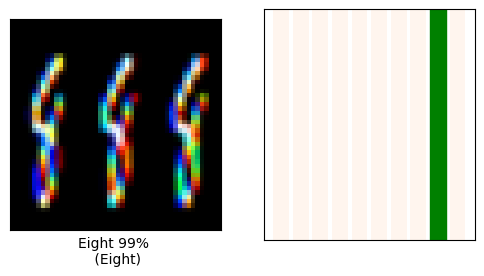

In [ ]:
i=random.randrange(1, 10000)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i,predictions, val_image_label, val_images_Original)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

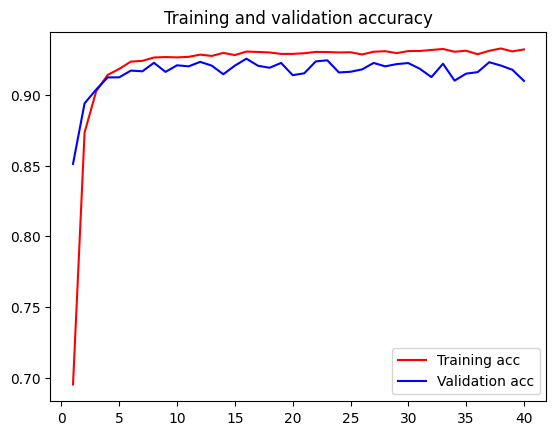

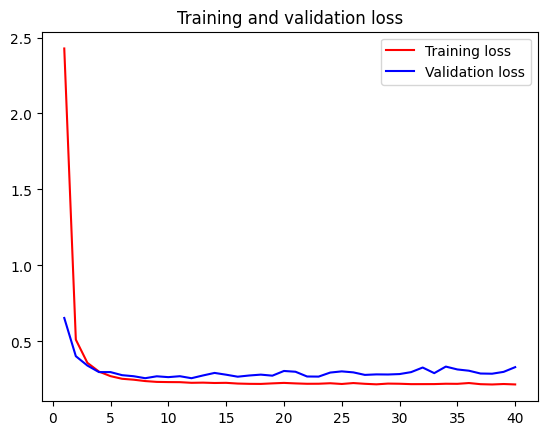

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()